<a href="https://colab.research.google.com/github/2303A51939/23CSBTB-27/blob/main/lab06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Libraries You Will Need in This Tutorial

In [3]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

Importing the Data Set Into Our Python Script

In [8]:
raw_data = pd.read_csv('classified_data.csv')
raw_data

Unnamed: 0       WTT       PTI       EQW       SBI       LQE       QWG  \
0             0  0.913917  1.162073  0.567946  0.755464  0.780862  0.352608   
1             1  0.635632  1.003722  0.535342  0.825645  0.924109  0.648450   
2             2  0.721360  1.201493  0.921990  0.855595  1.526629  0.720781   
3             3  1.234204  1.386726  0.653046  0.825624  1.142504  0.875128   
4             4  1.279491  0.949750  0.627280  0.668976  1.232537  0.703727   
..          ...       ...       ...       ...       ...       ...       ...   
995         995  1.010953  1.034006  0.853116  0.622460  1.036610  0.586240   
996         996  0.575529  0.955786  0.941835  0.792882  1.414277  1.269540   
997         997  1.135470  0.982462  0.781905  0.916738  0.901031  0.884738   
998         998  1.084894  0.861769  0.407158  0.665696  1.608612  0.943859   
999         999  0.837460  0.961184  0.417006  0.799784  0.934399  0.424762   

          FDJ       PJF       HQE       NXJ  TARGET CLASS  
0    0.759697  0.643798  0.879422  1.231409             1  
1    0.675334  1.013546  0.621552  1.492702             0  
2    1.626351  1.154483  0.957877  1.285597             0  
3    1.409708  1.380003  1.522692  1.153093             1  
4    1.115596  0.646691  1.463812  1.419167             1  
..        ...       ...       ...       ...           ...  
995  0.746811  0.319752  1.117340  1.348517             1  
996  1.055928  0.713193  0.958684  1.663489             0  
997  0.386802  0.389584  0.919191  1.385504             1  
998  0.855806  1.061338  1.277456  1.188063             1  
999  0.778234  0.907962  1.257190  1.364837             1  

[1000 rows x 12 columns]

In [10]:
raw_data = pd.read_csv('classified_data.csv', index_col = 0)
print(raw_data.columns)

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')


Standardizing the Data Set

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [15]:
scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

StandardScaler()

In [16]:
scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))

In [17]:
scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)

Splitting the Data Set Into Training Data and Test Data

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x = scaled_data

y = raw_data['TARGET CLASS']

In [20]:
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)

Training a K Nearest Neighbors Model

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
model = KNeighborsClassifier(n_neighbors = 1)

In [23]:
model.fit(x_training_data, y_training_data)

KNeighborsClassifier(n_neighbors=1)

Making Predictions With Our K Nearest Neighbors Algorithm

In [24]:
predictions = model.predict(x_test_data)

Measuring the Accuracy of Our Model

In [25]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

In [26]:
print(classification_report(y_test_data, predictions))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       155
           1       0.88      0.95      0.91       145

    accuracy                           0.91       300
   macro avg       0.92      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



In [27]:
print(confusion_matrix(y_test_data, predictions))

[[136  19]
 [  7 138]]


Choosing An Optimal K Value Using the Elbow Method

In [28]:
error_rates = []

In [31]:
for i in np.arange(1, 101):

      new_model = KNeighborsClassifier(n_neighbors = i)

      new_model.fit(x_training_data, y_training_data)

      new_predictions = new_model.predict(x_test_data)

      error_rates.append(np.mean(new_predictions != y_test_data))


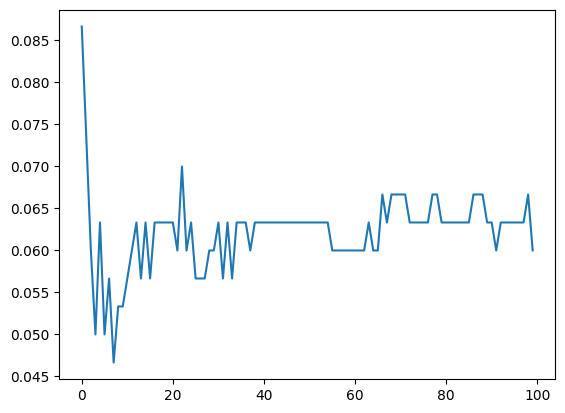

In [32]:
plt.plot(error_rates)

The Full Code For This Tutorial

              precision    recall  f1-score   support

           0       0.90      0.91      0.90       142
           1       0.92      0.91      0.91       158

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.91      0.91      0.91       300

[[129  13]
 [ 15 143]]


<ipython-input-34-761c246b13dd>:73: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(16,12))


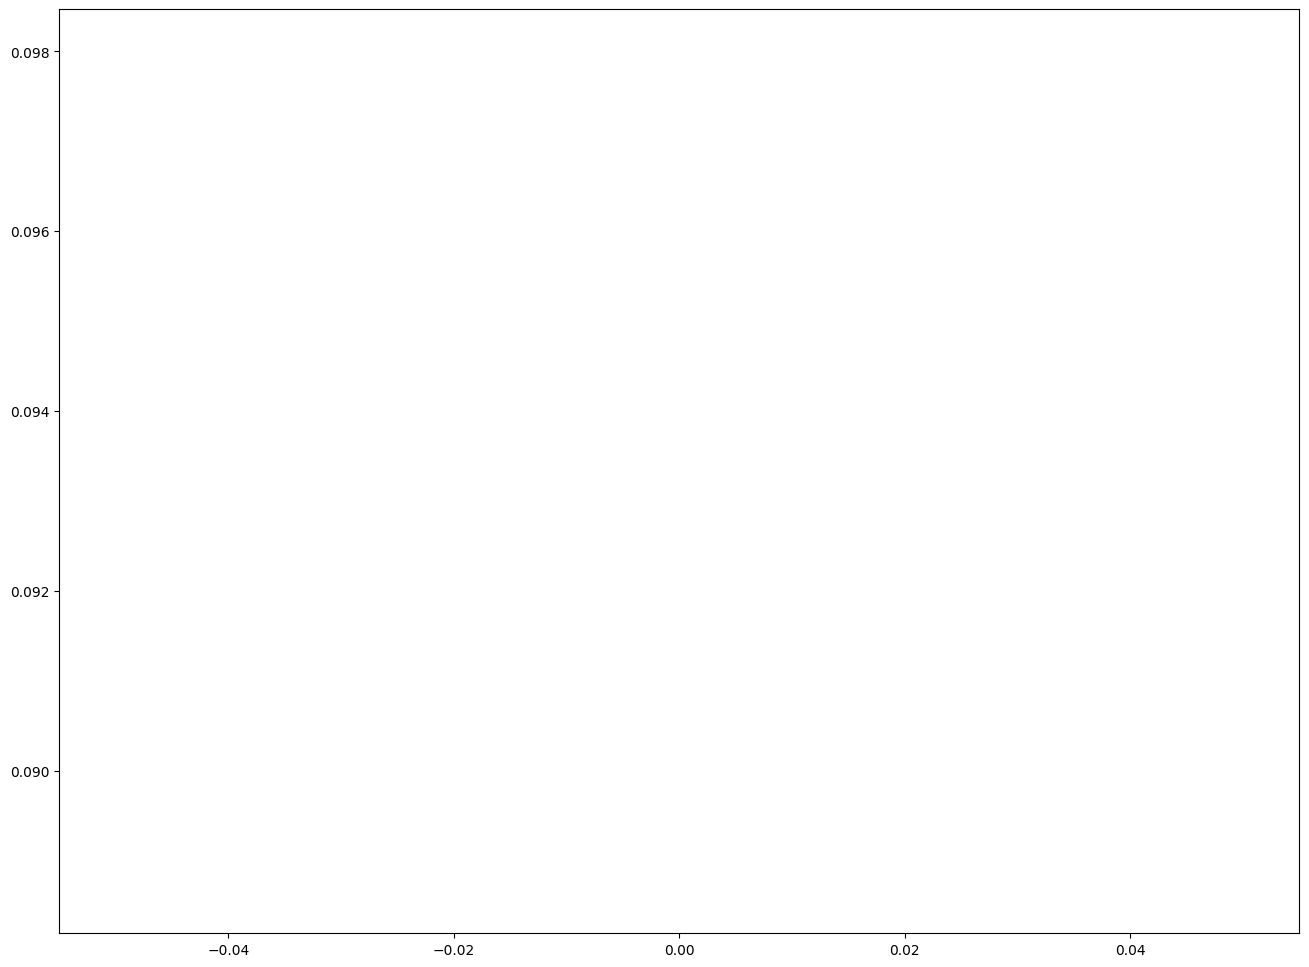

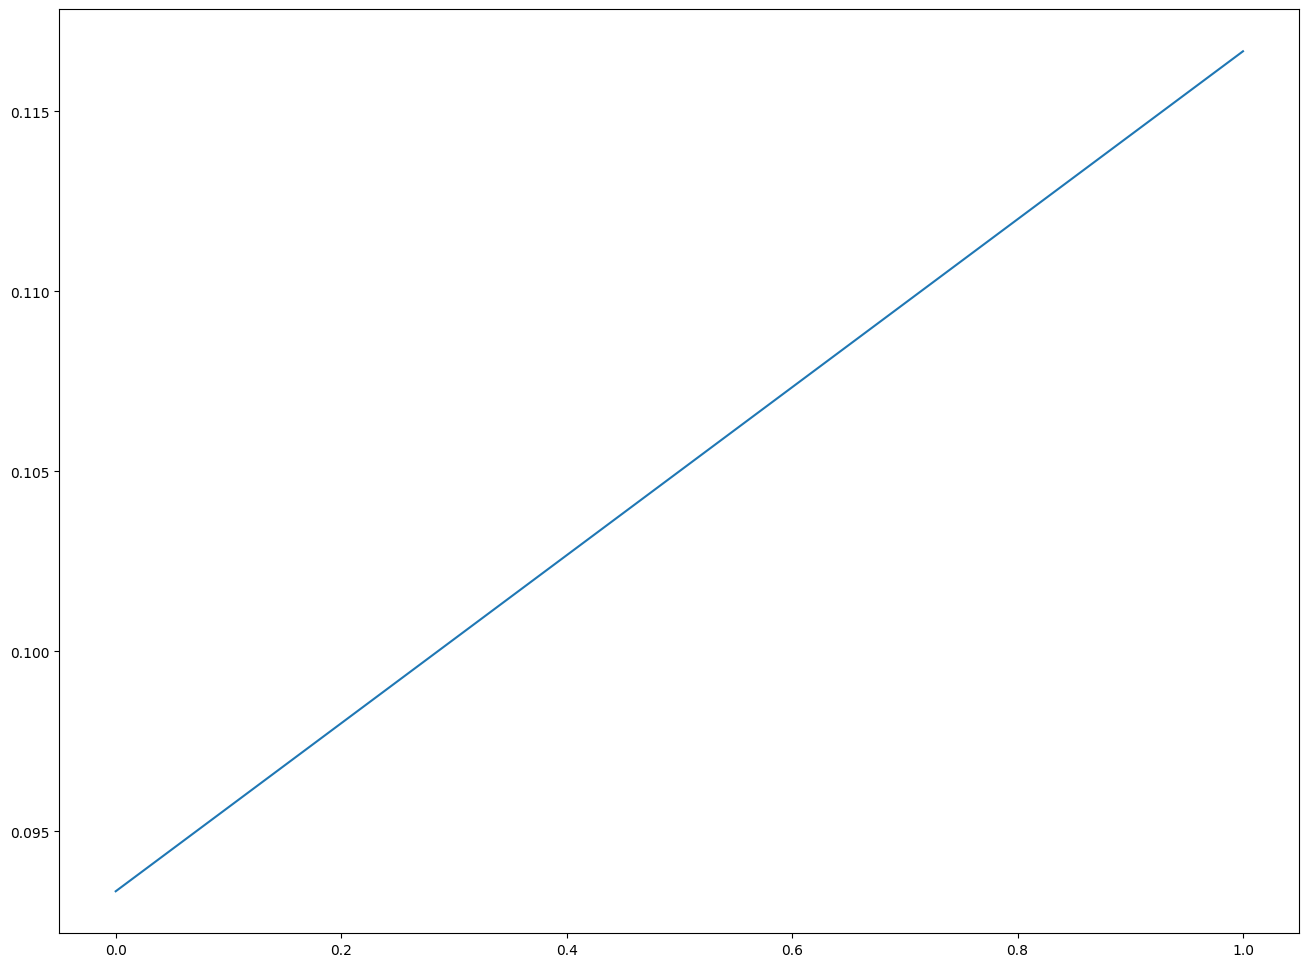

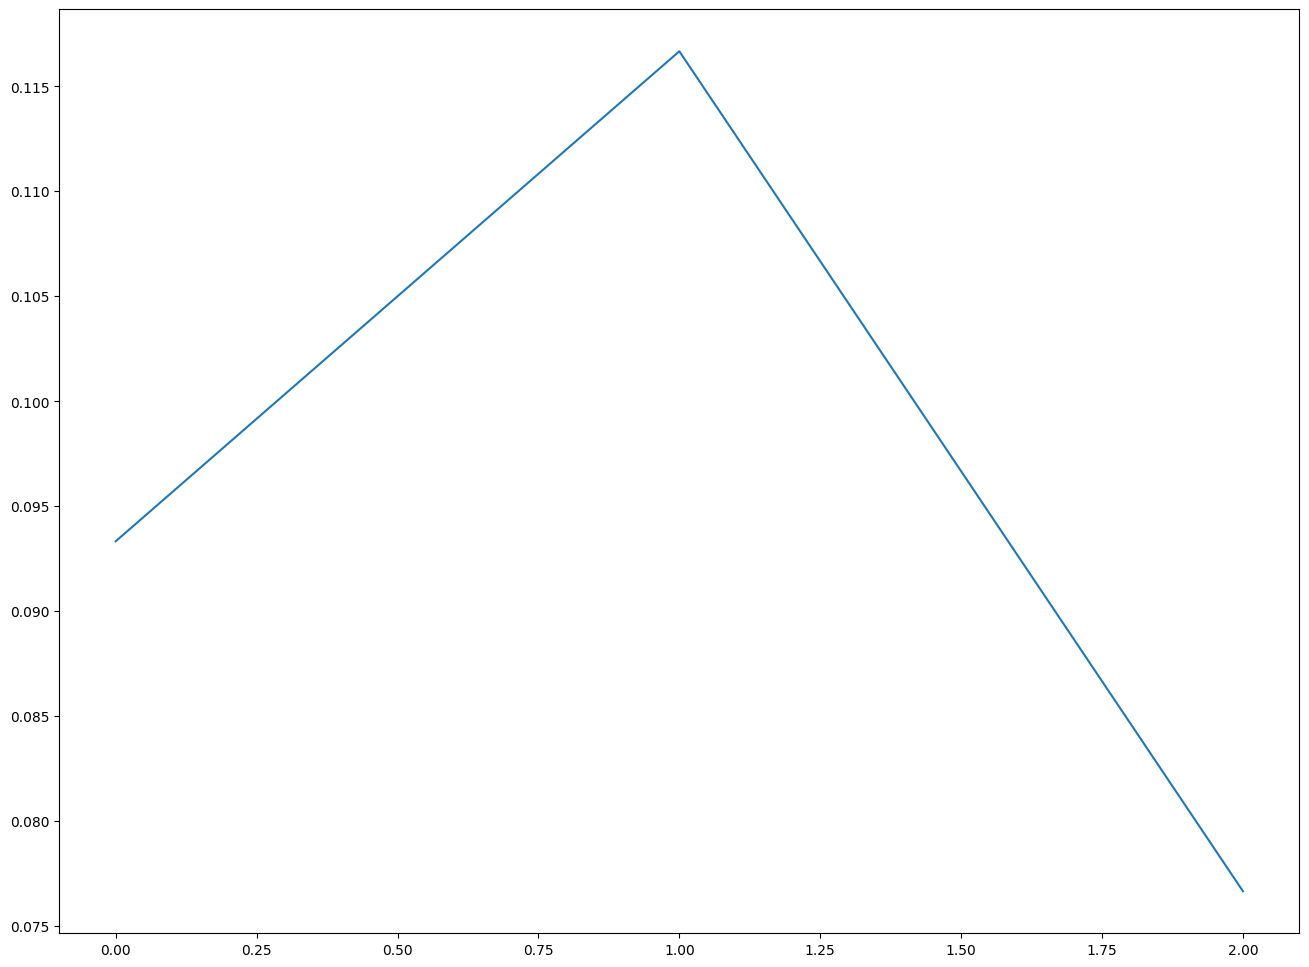

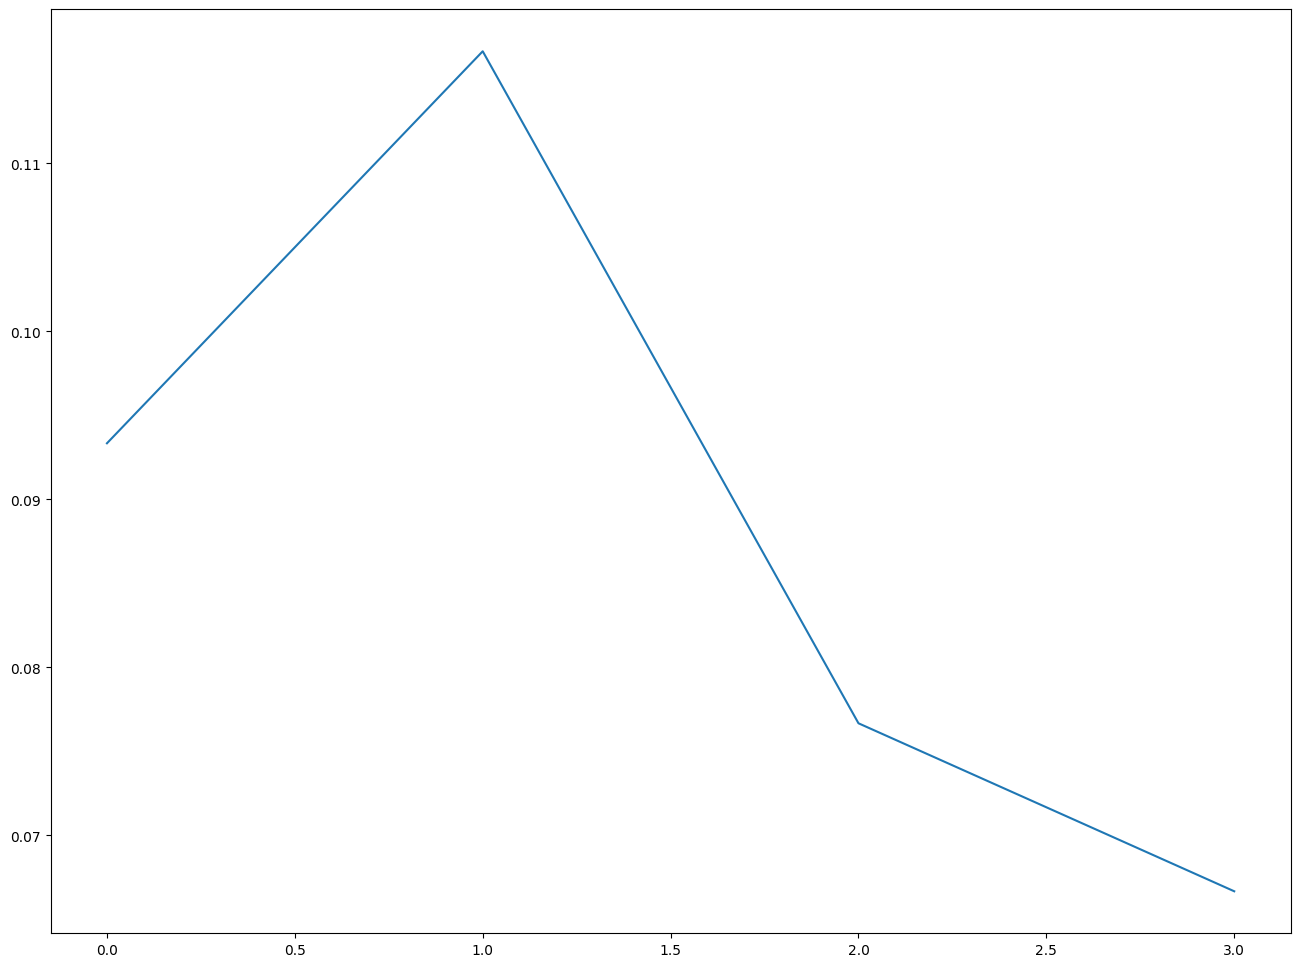

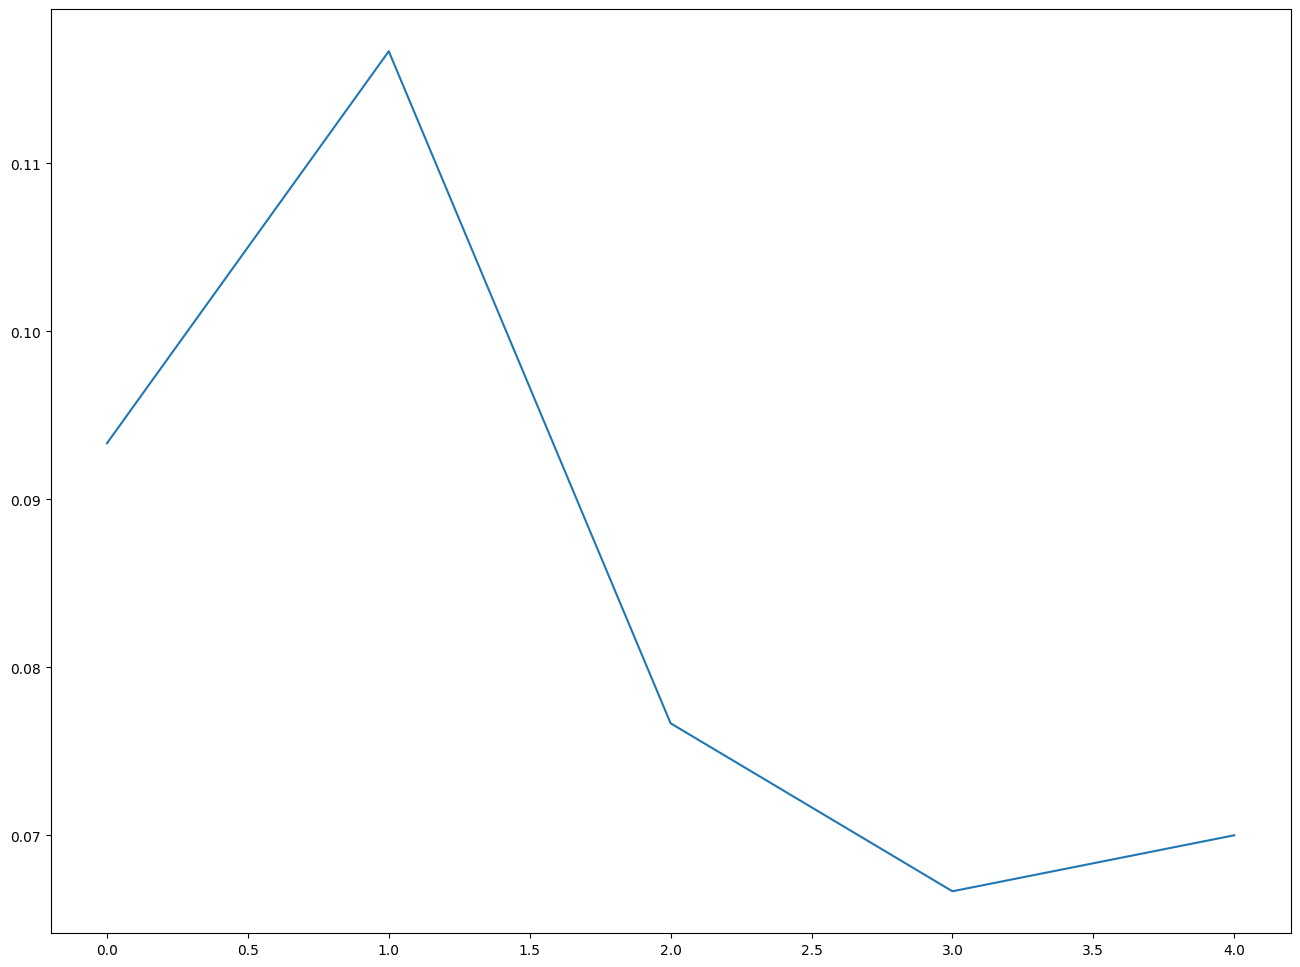

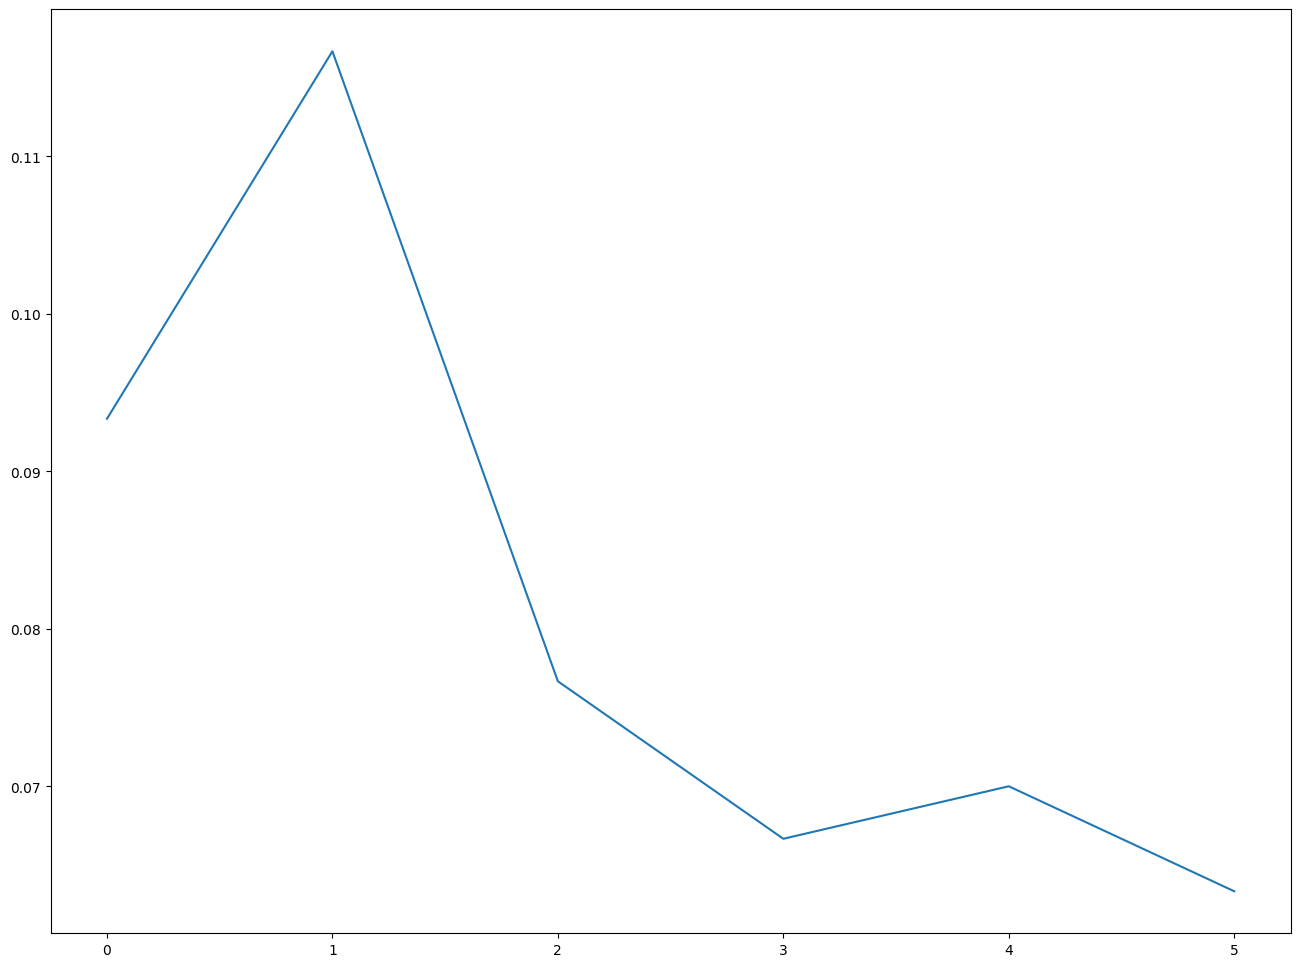

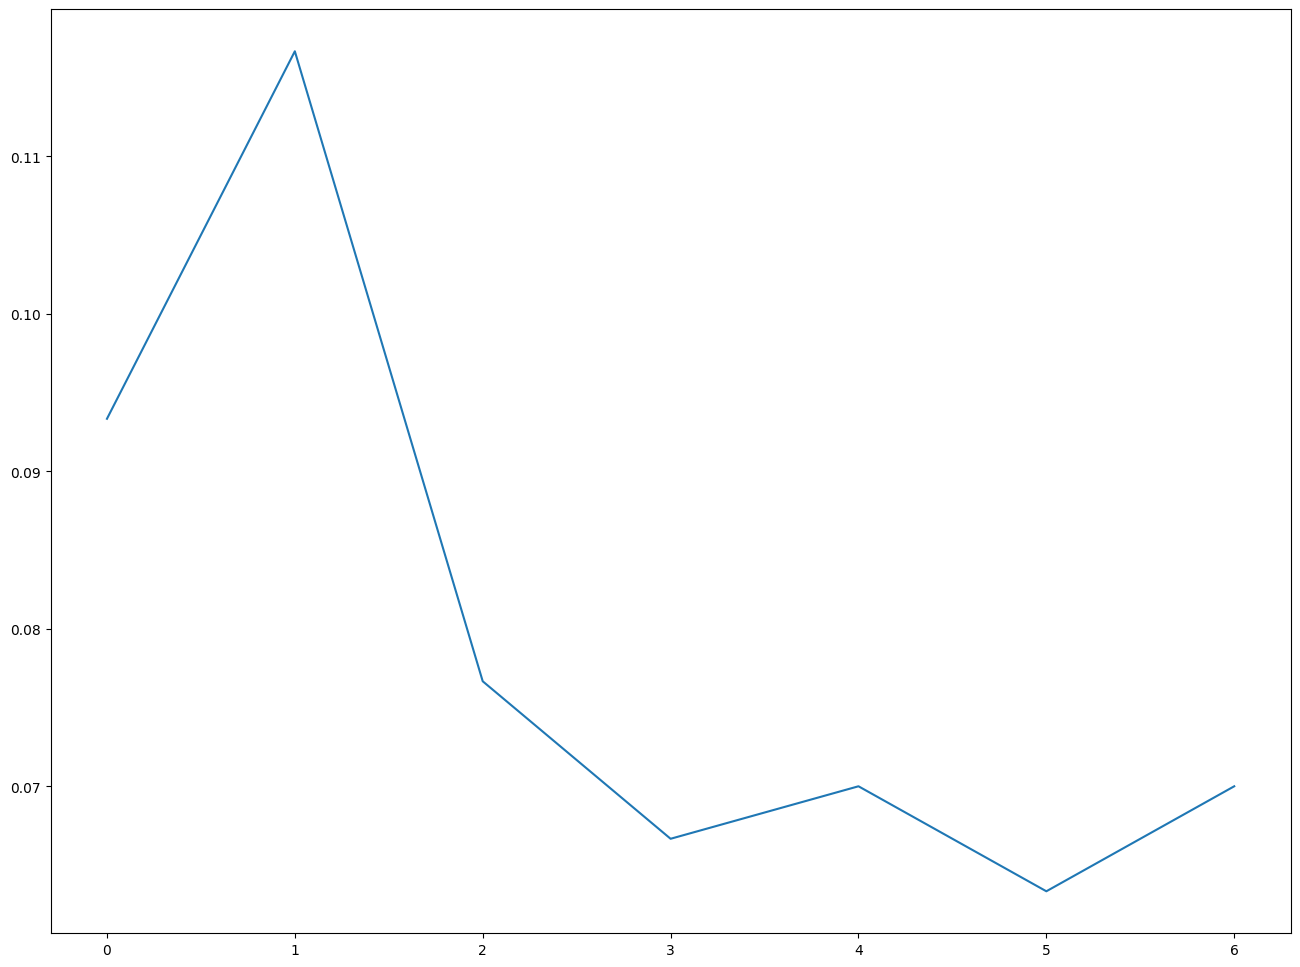

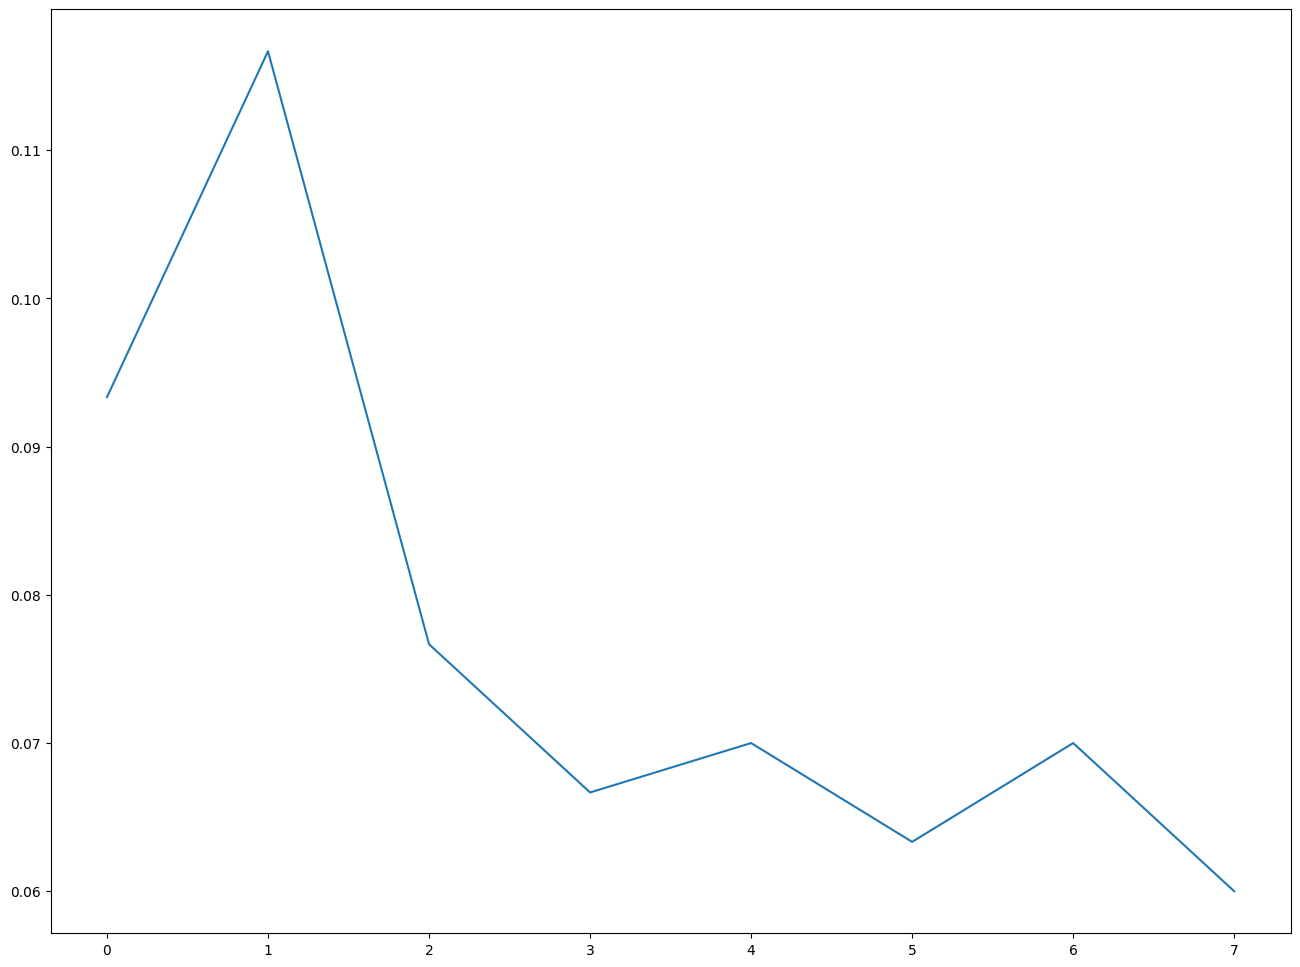

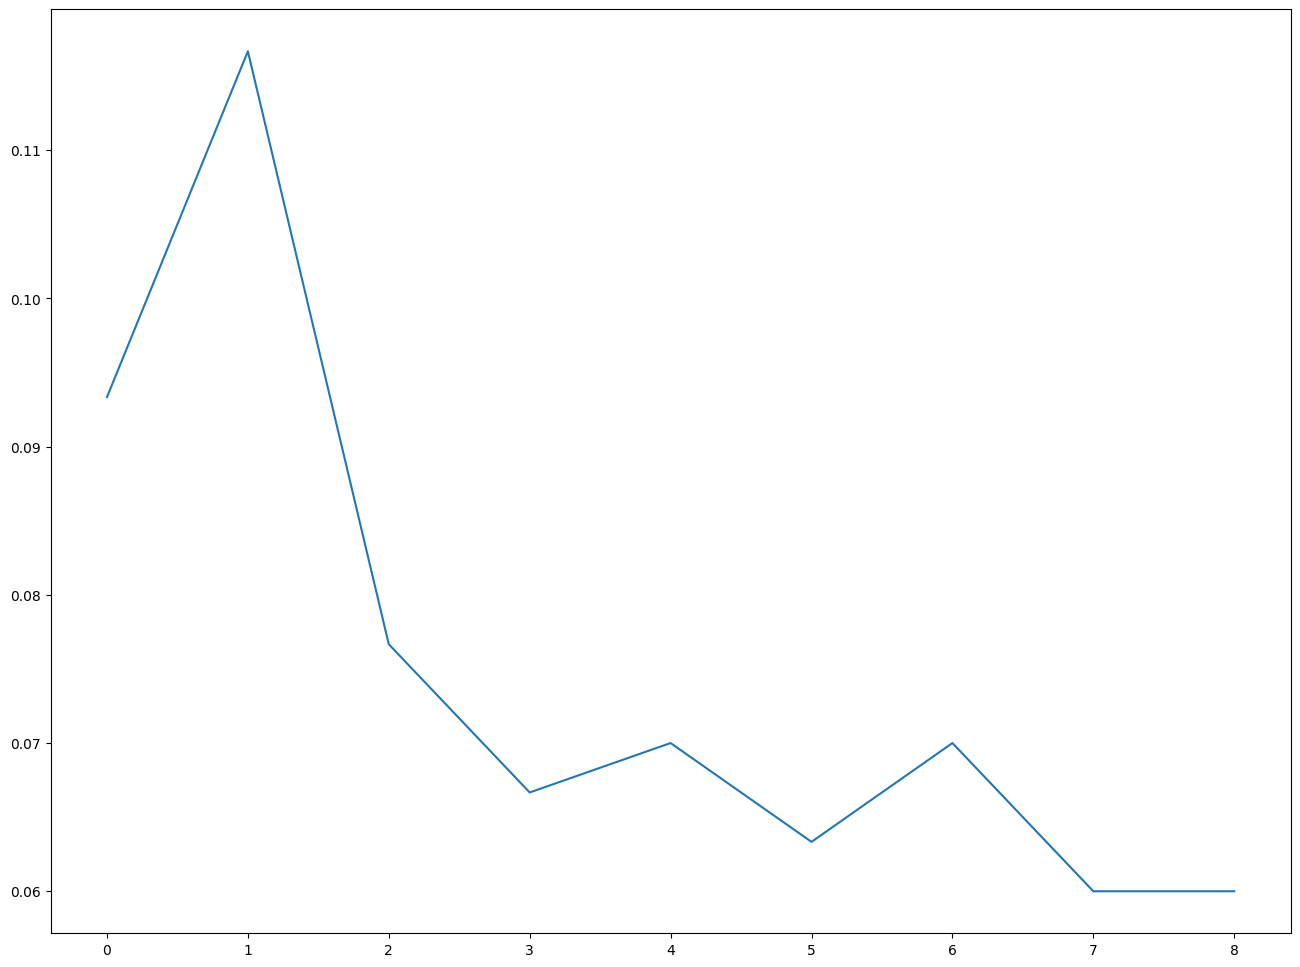

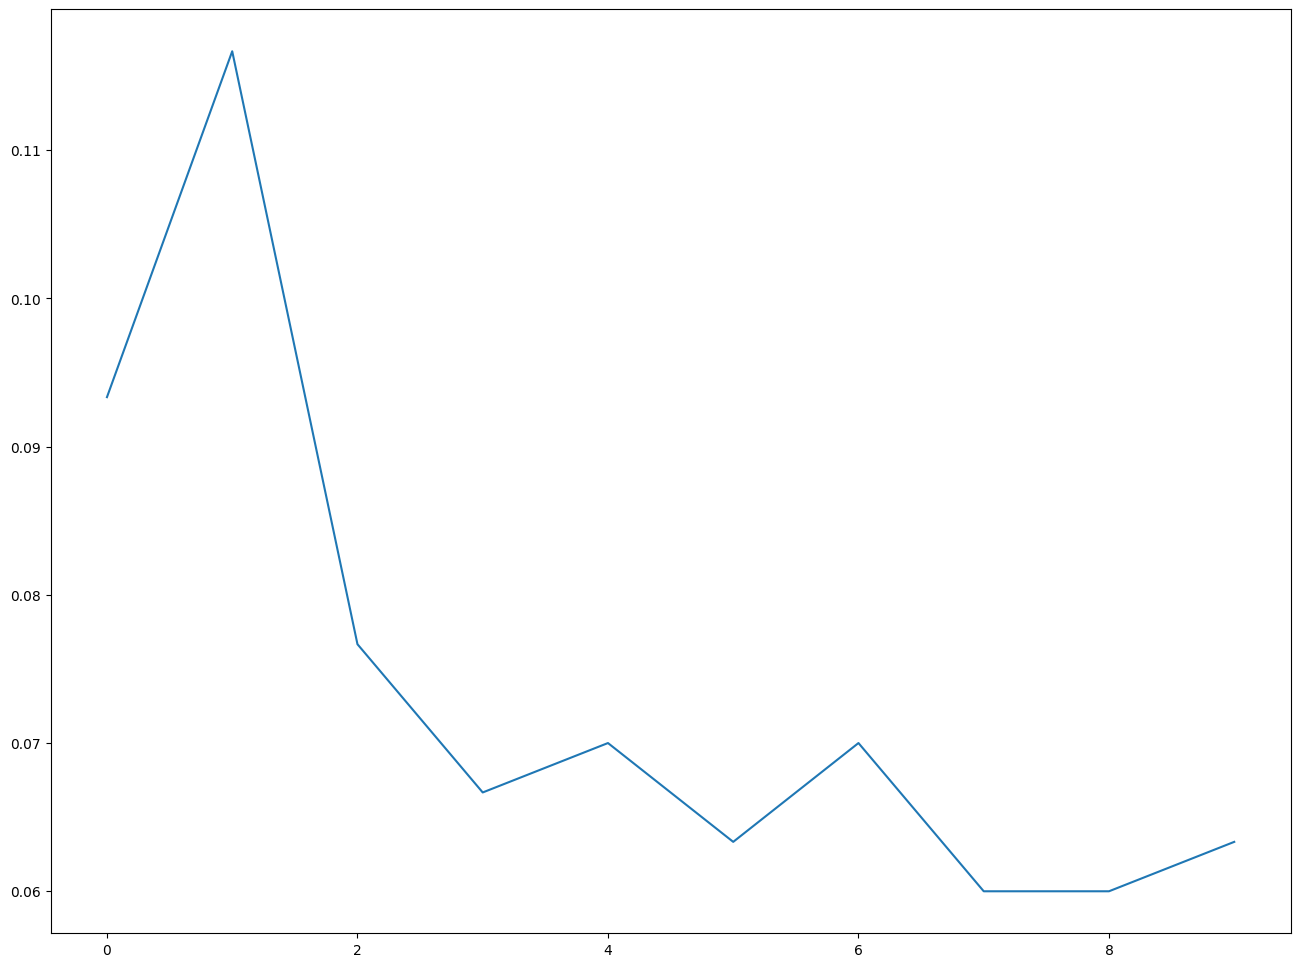

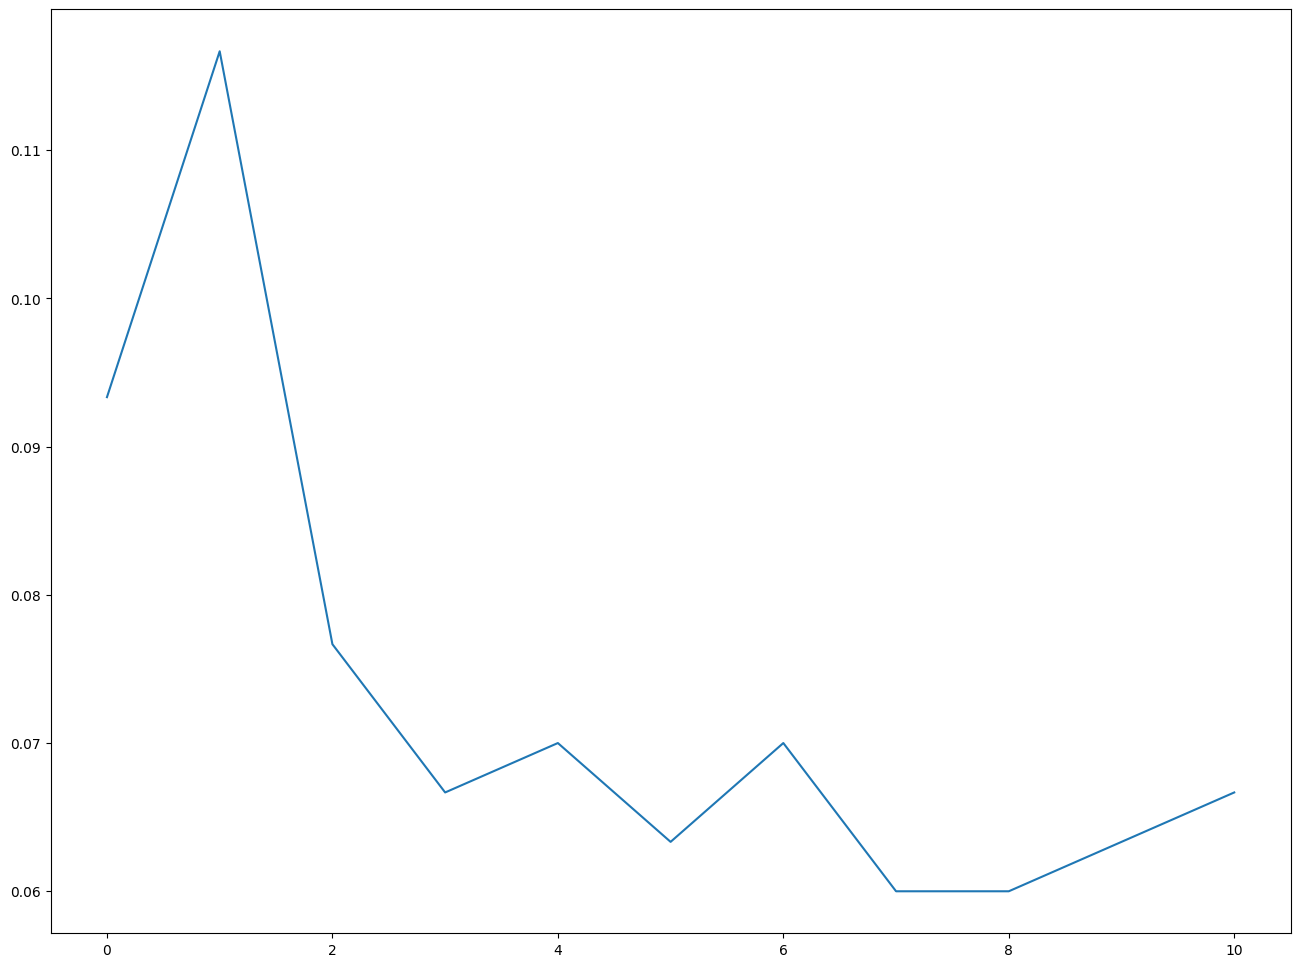

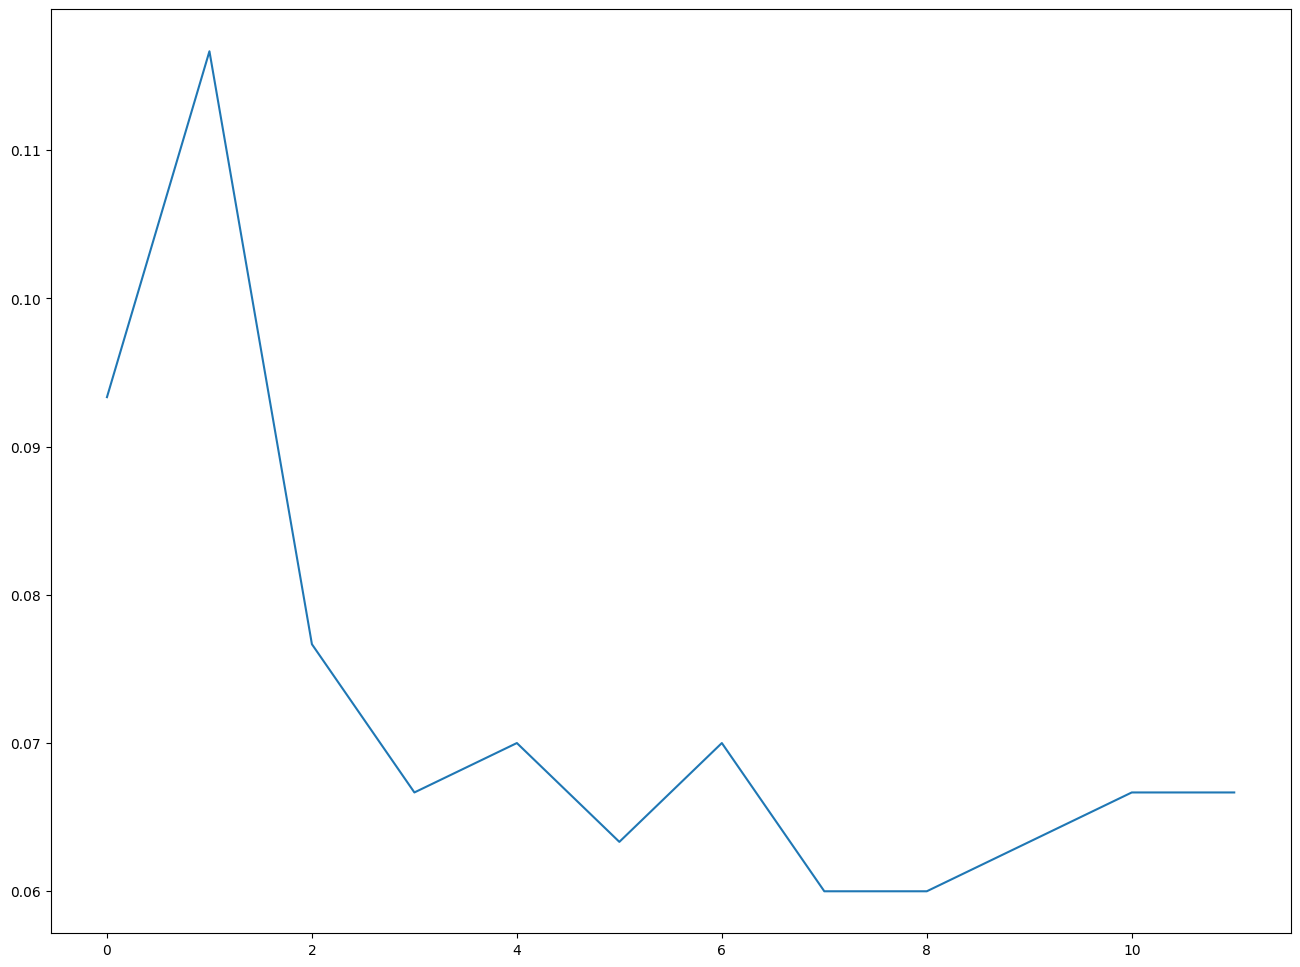

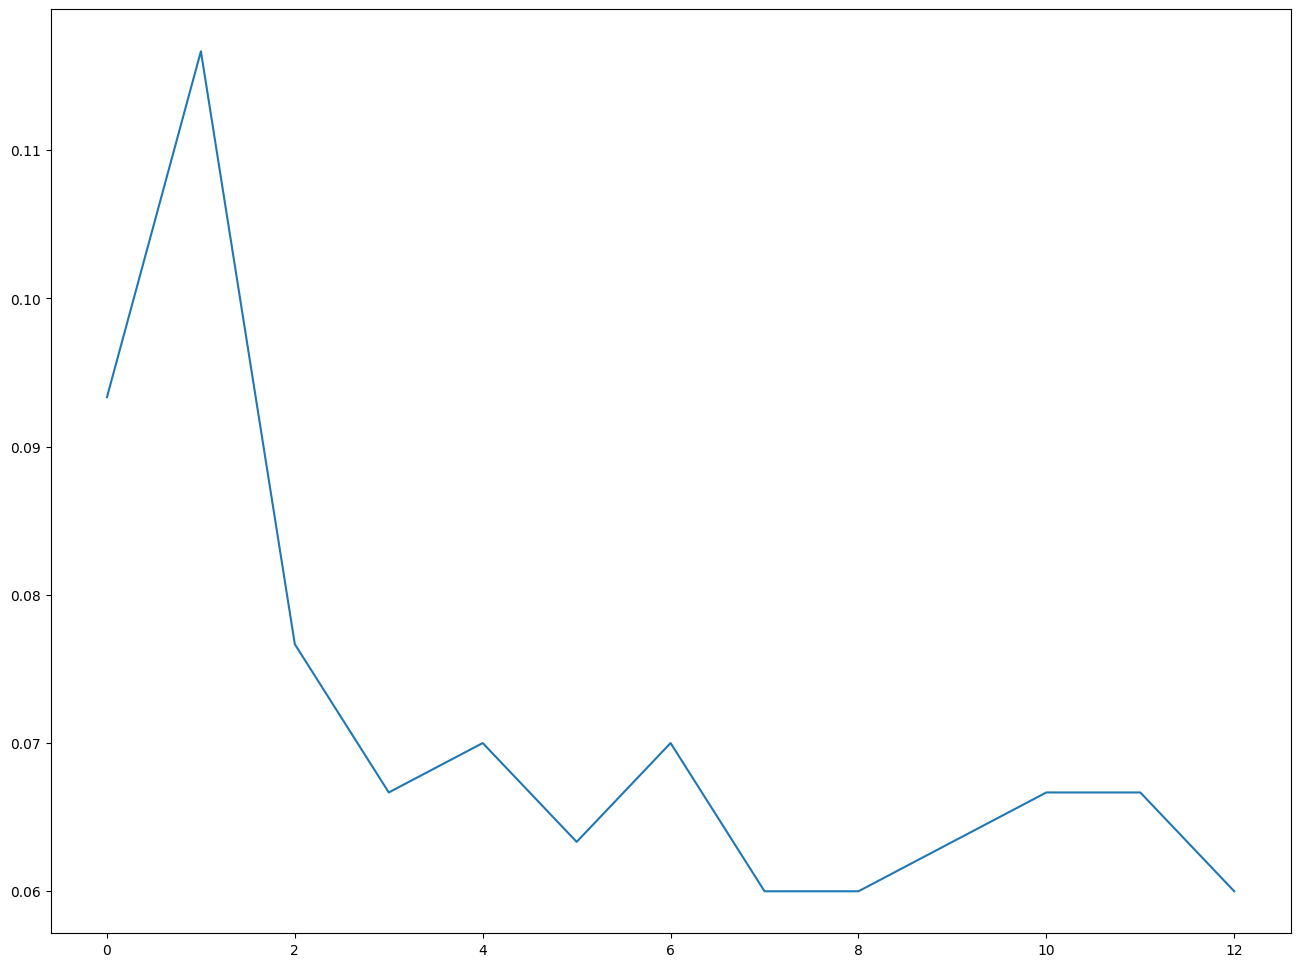

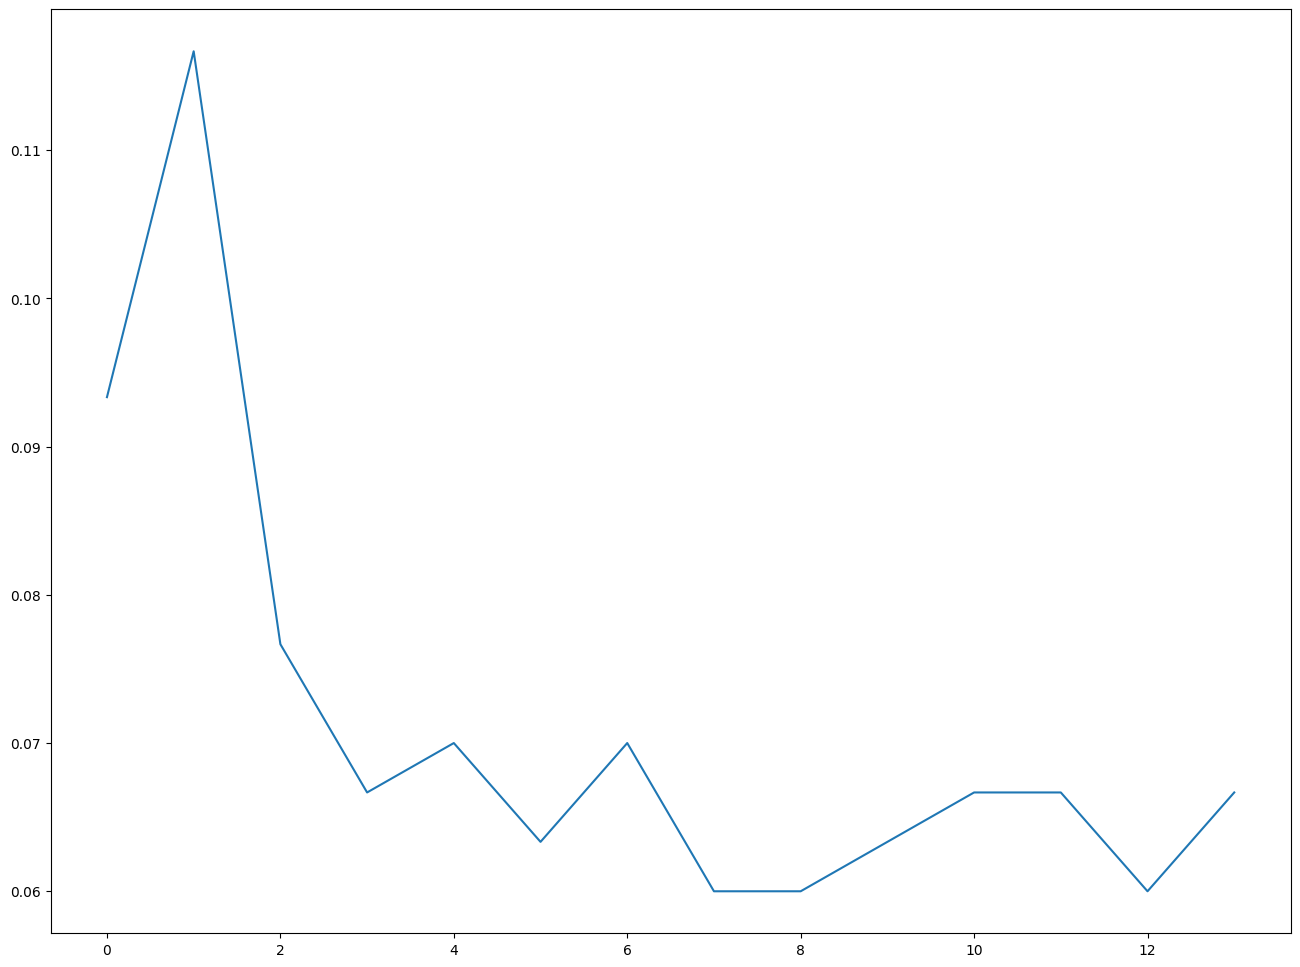

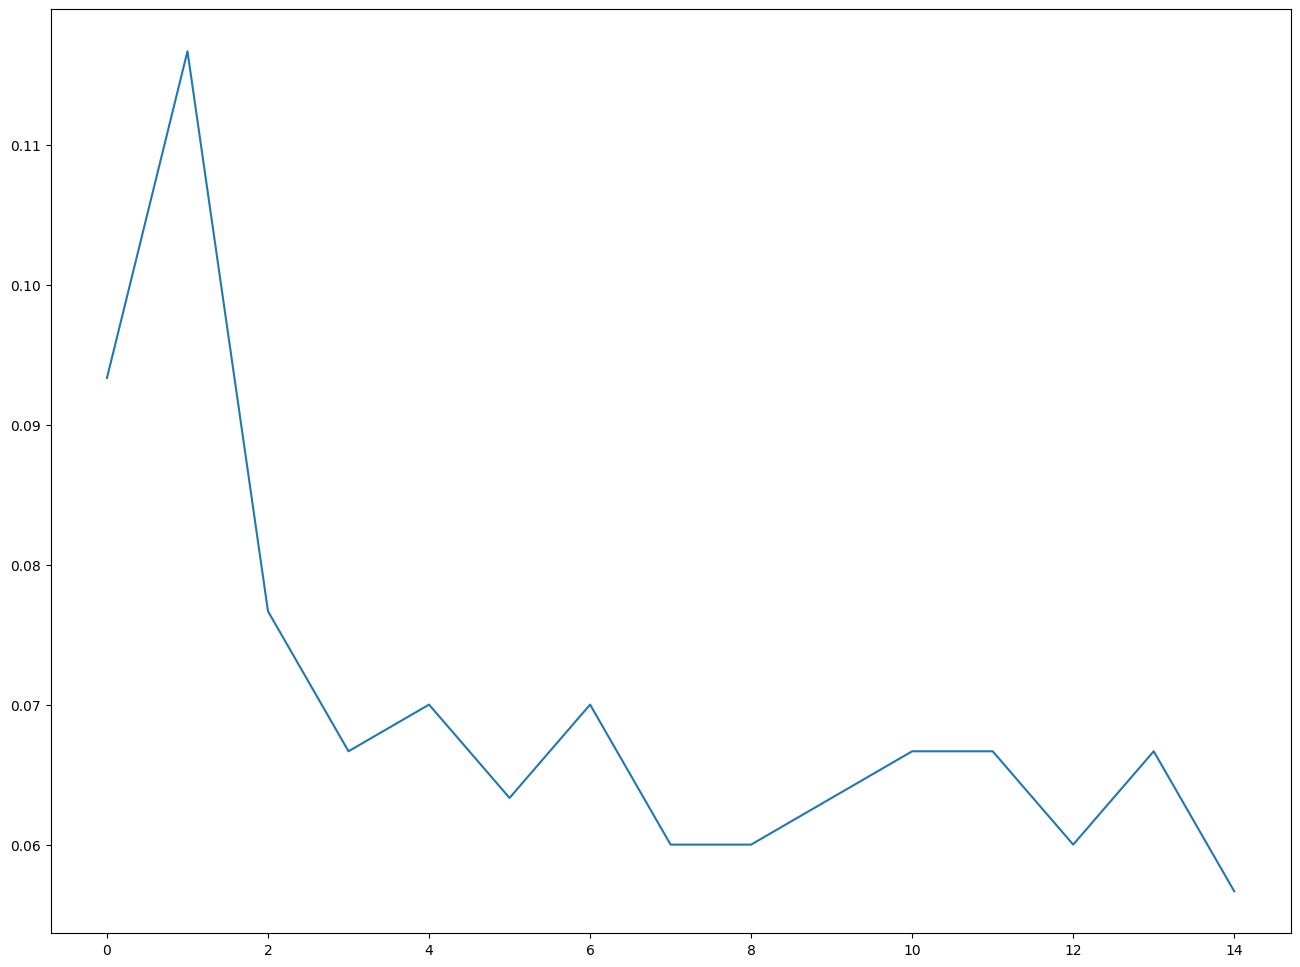

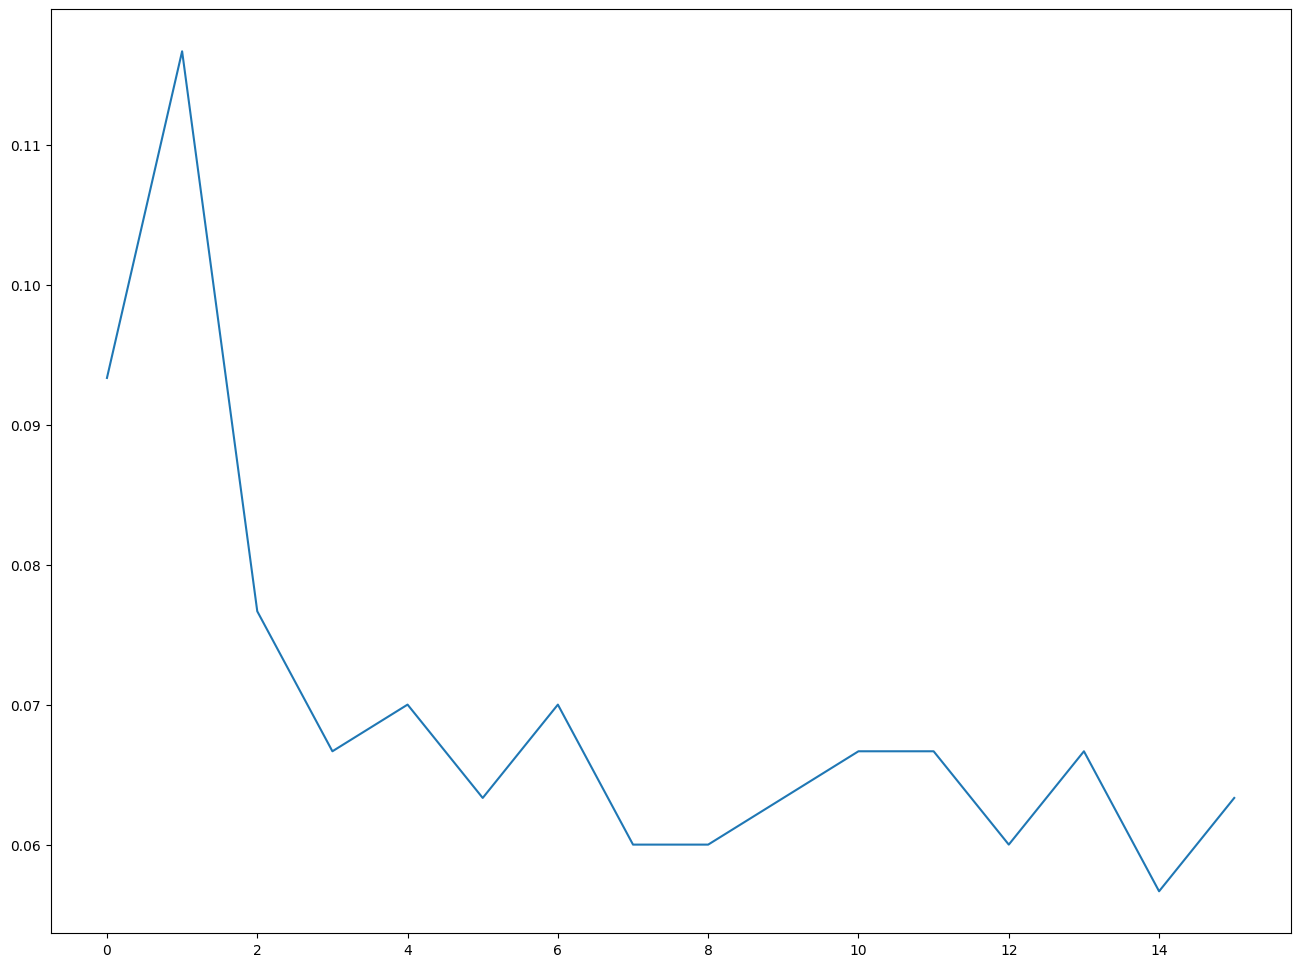

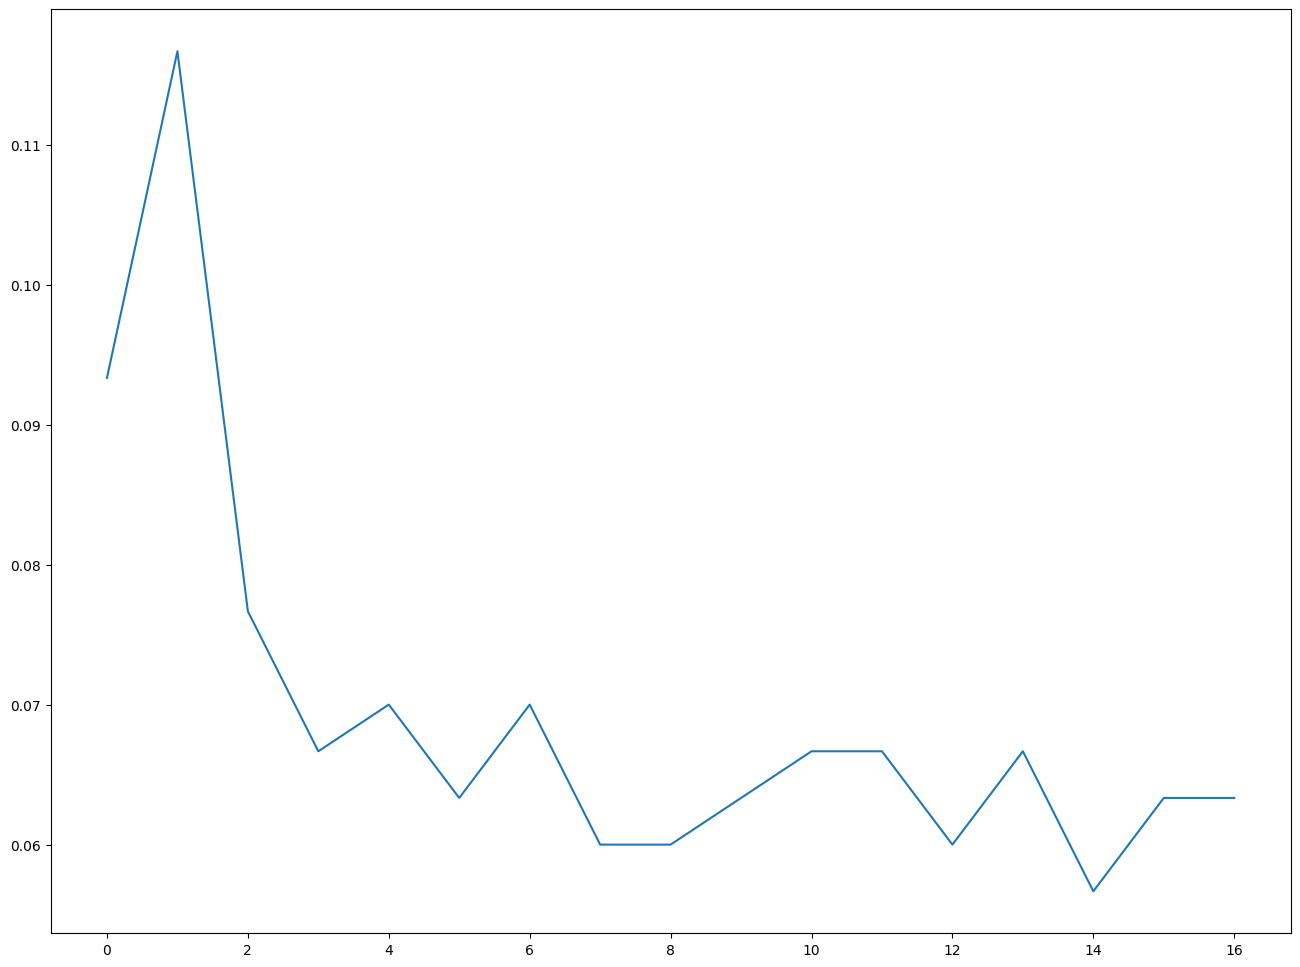

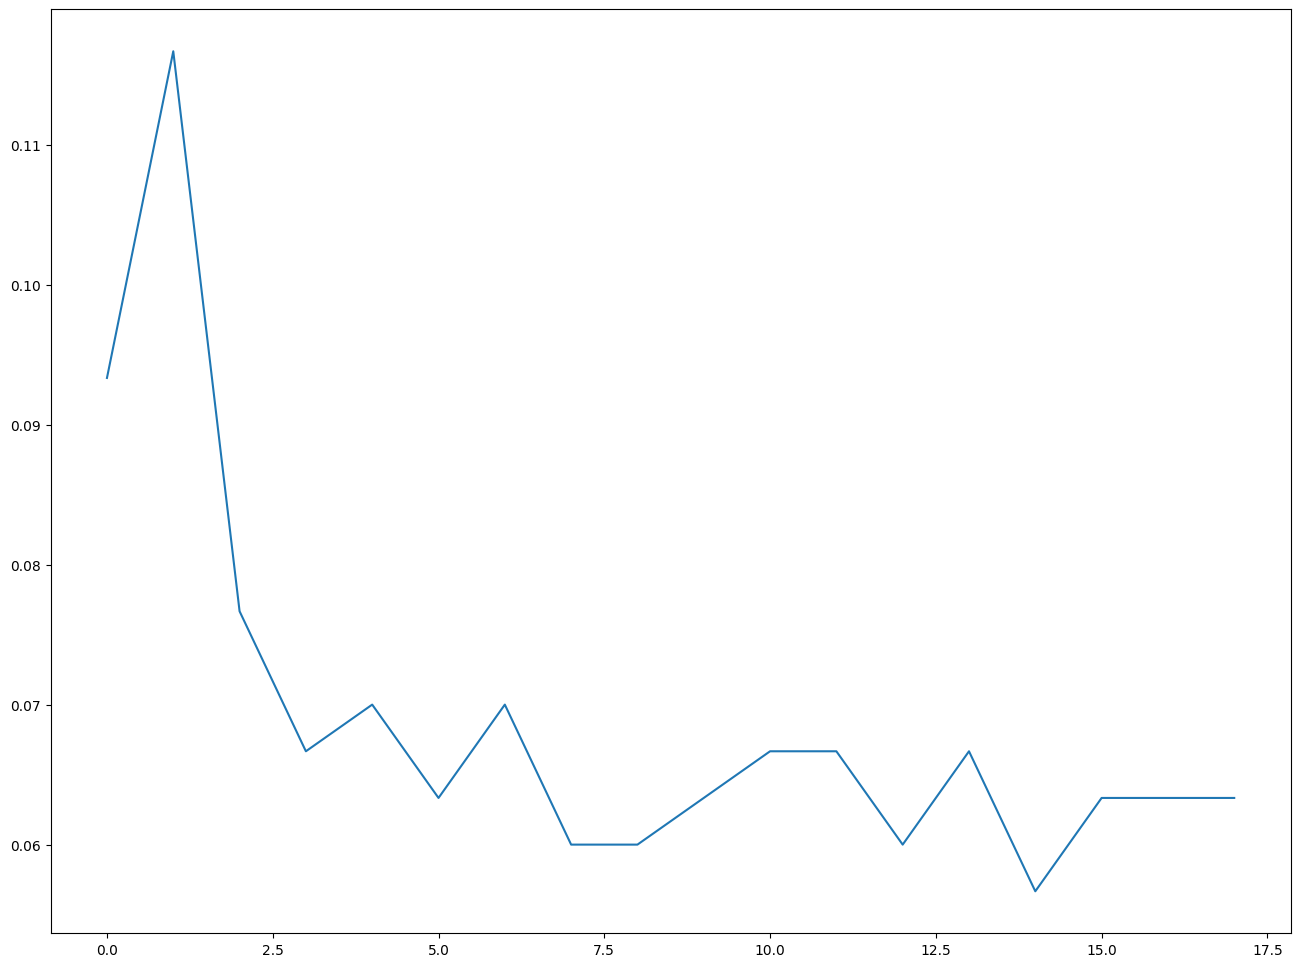

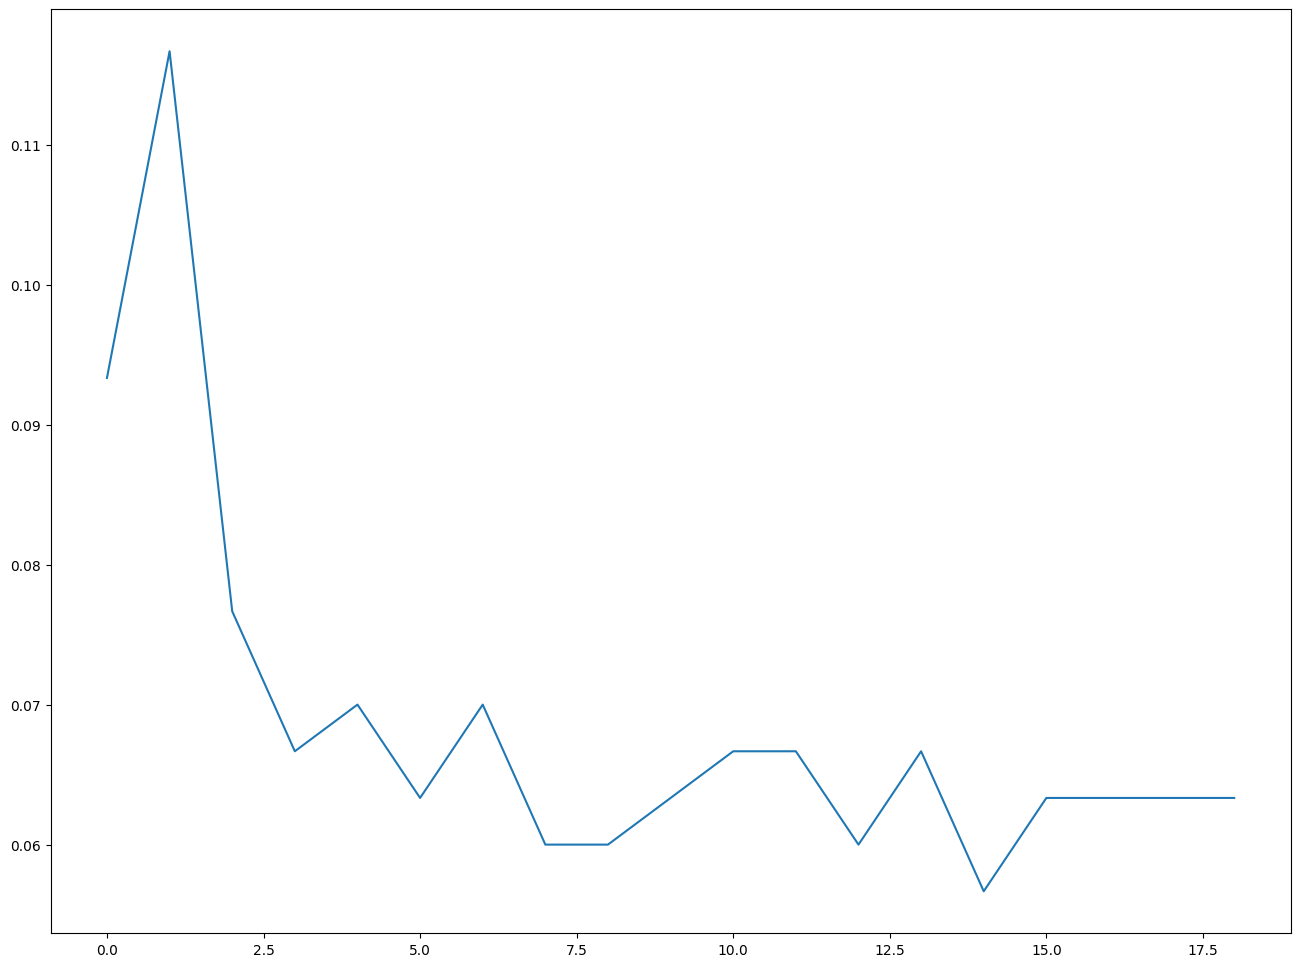

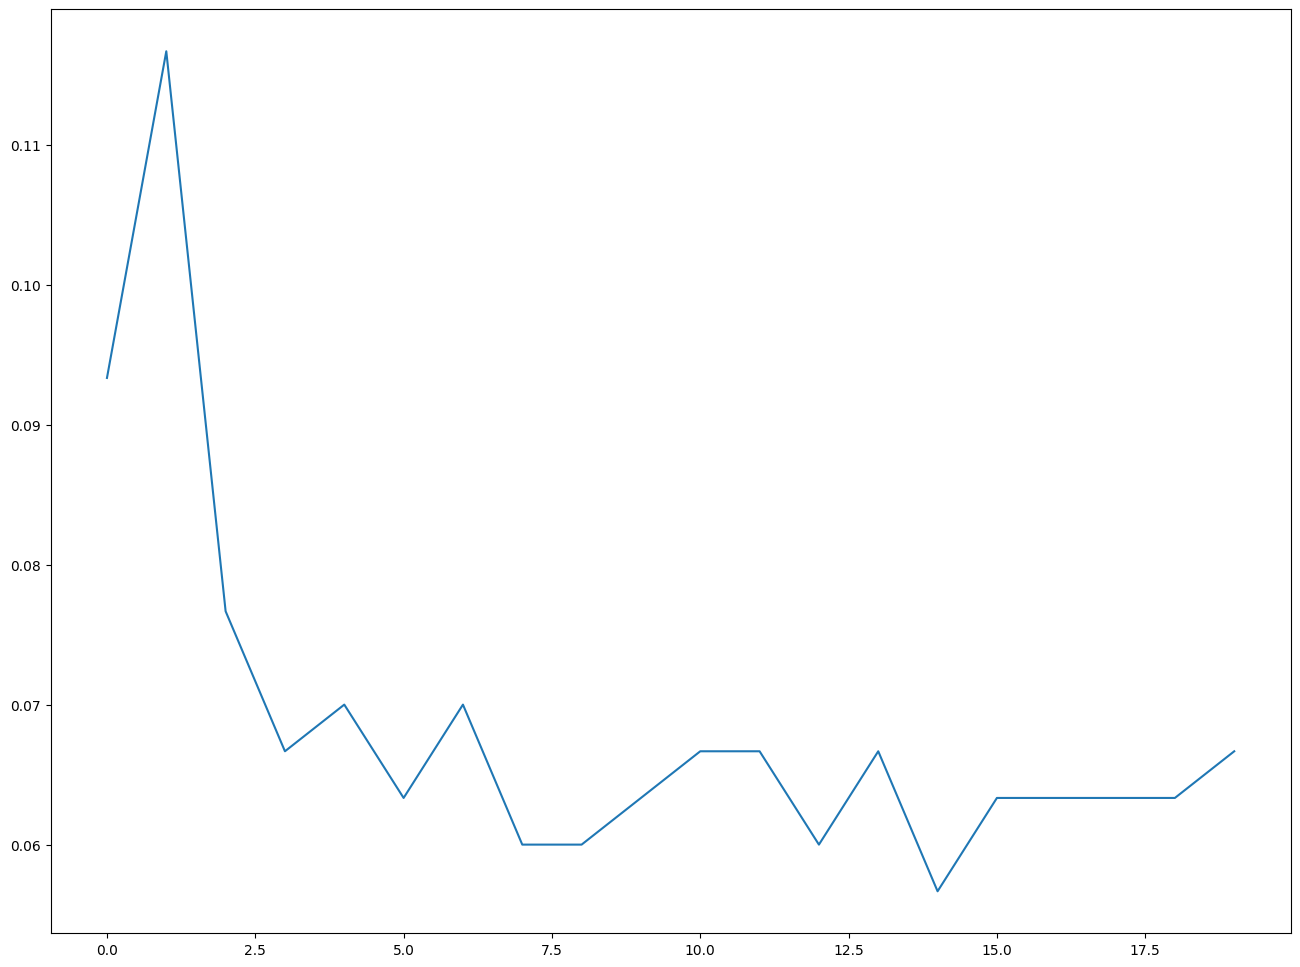

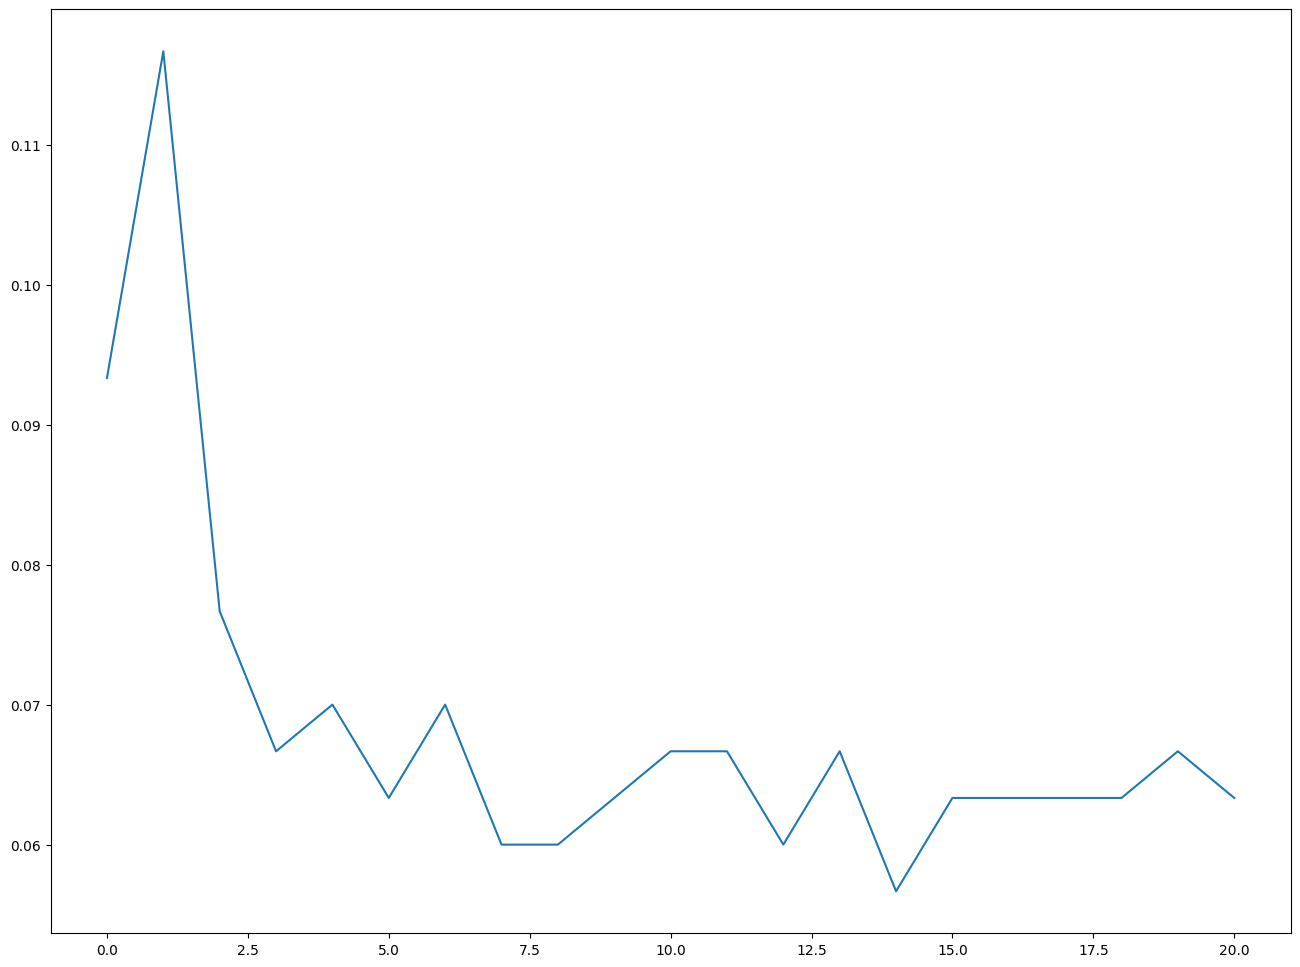

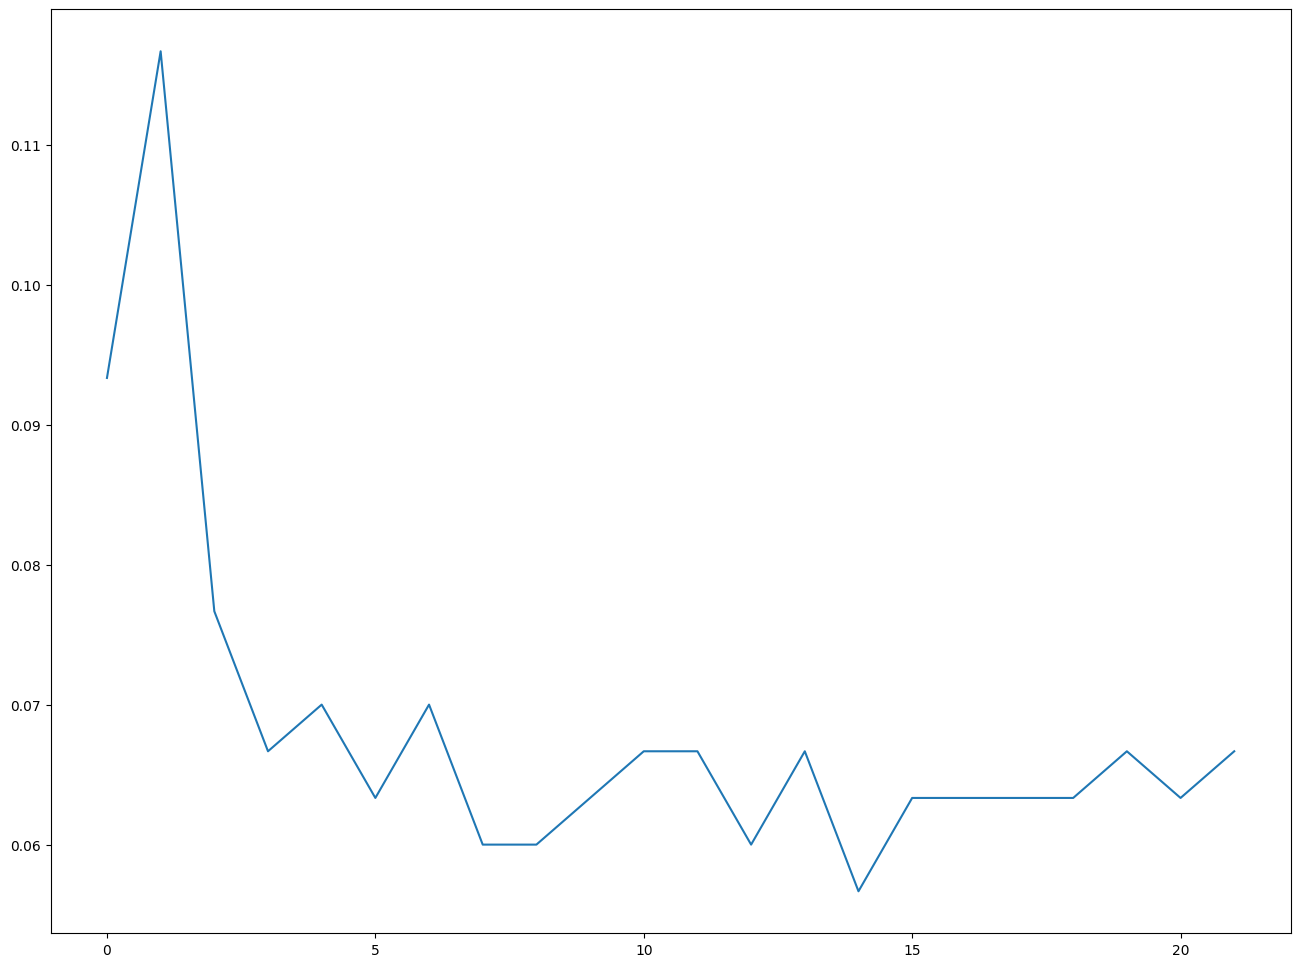

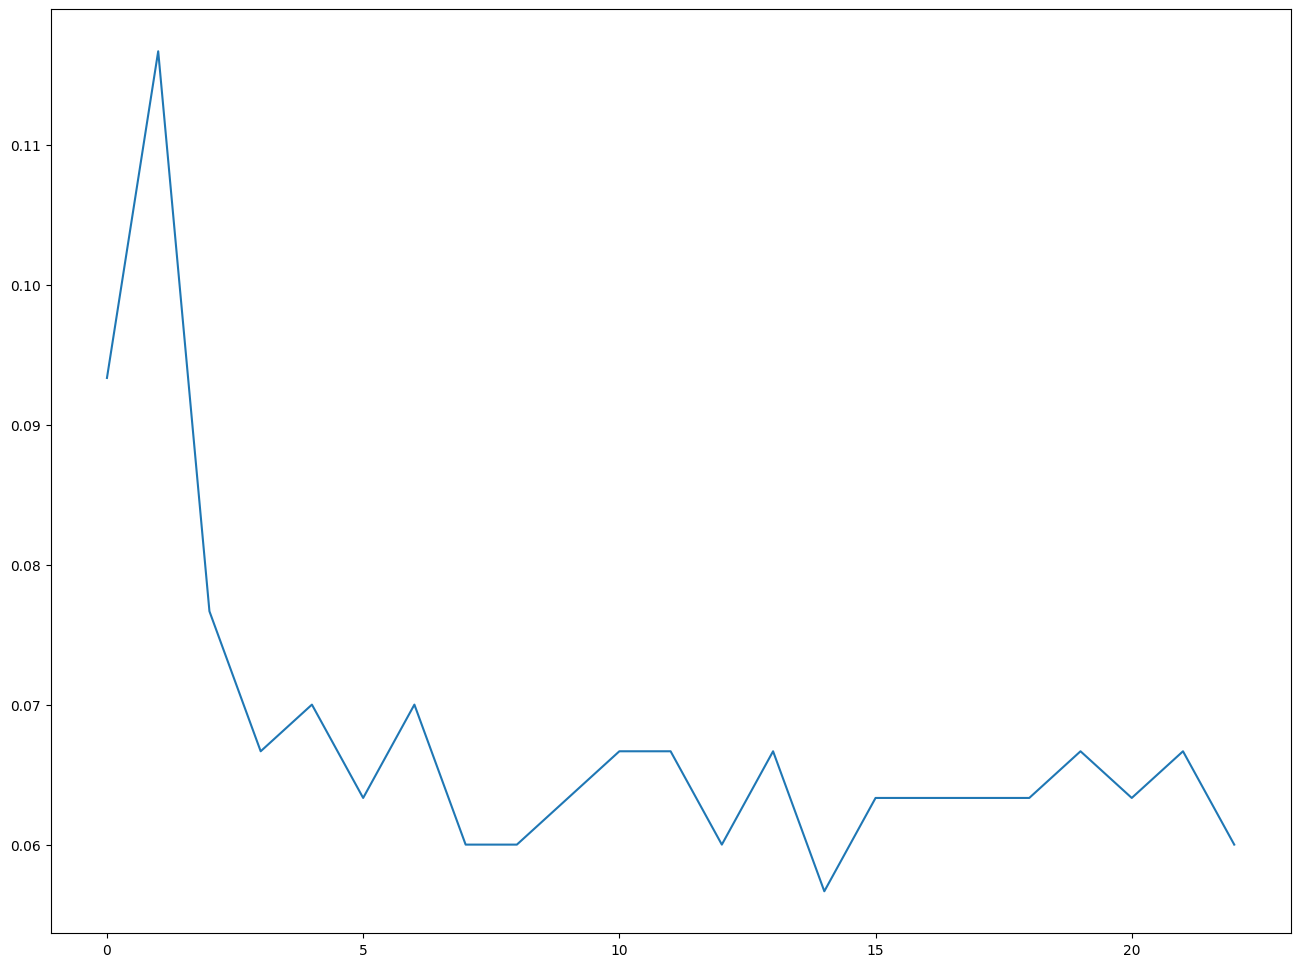

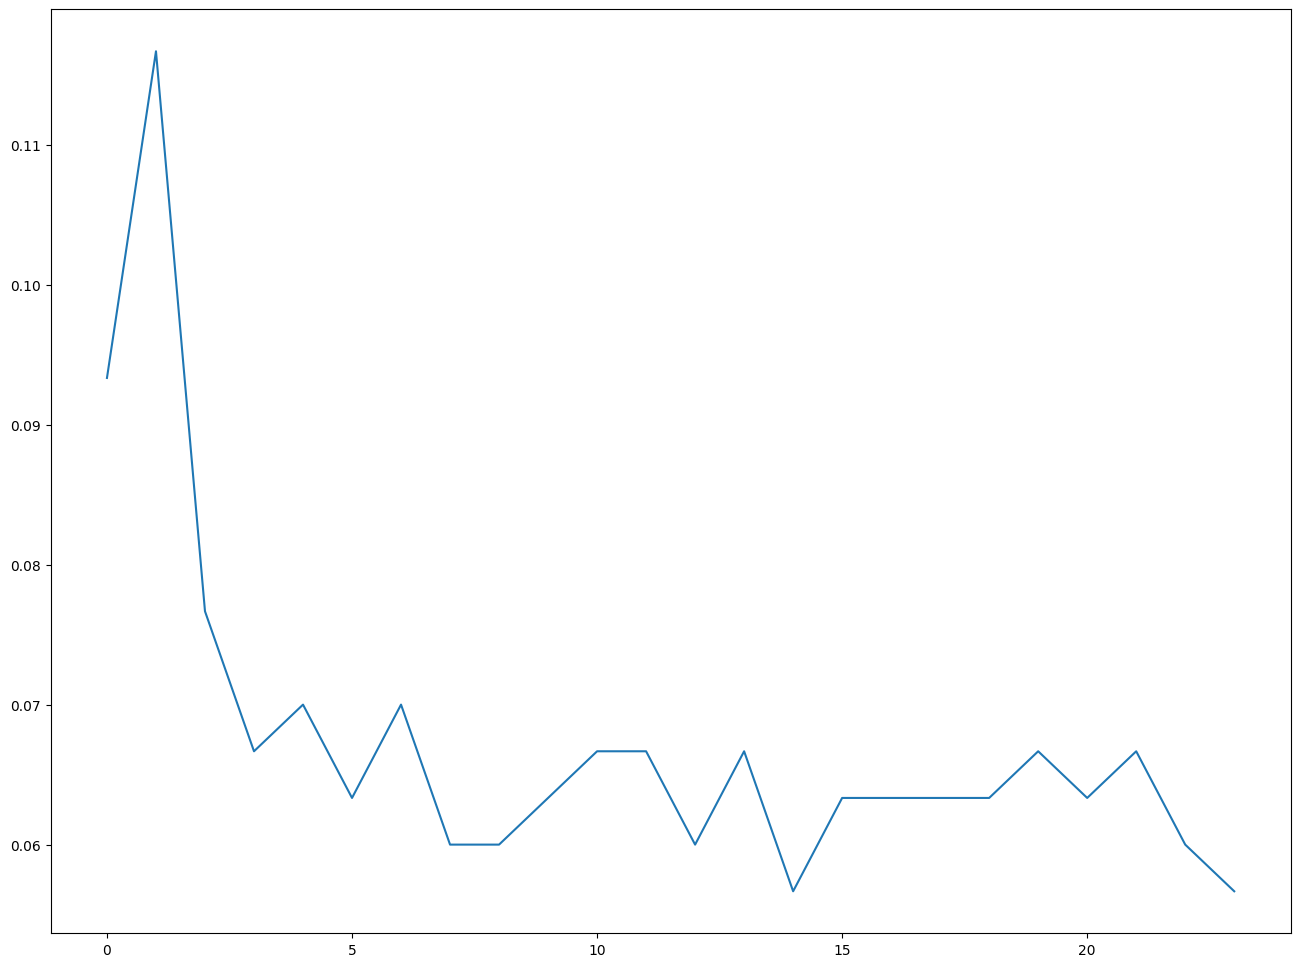

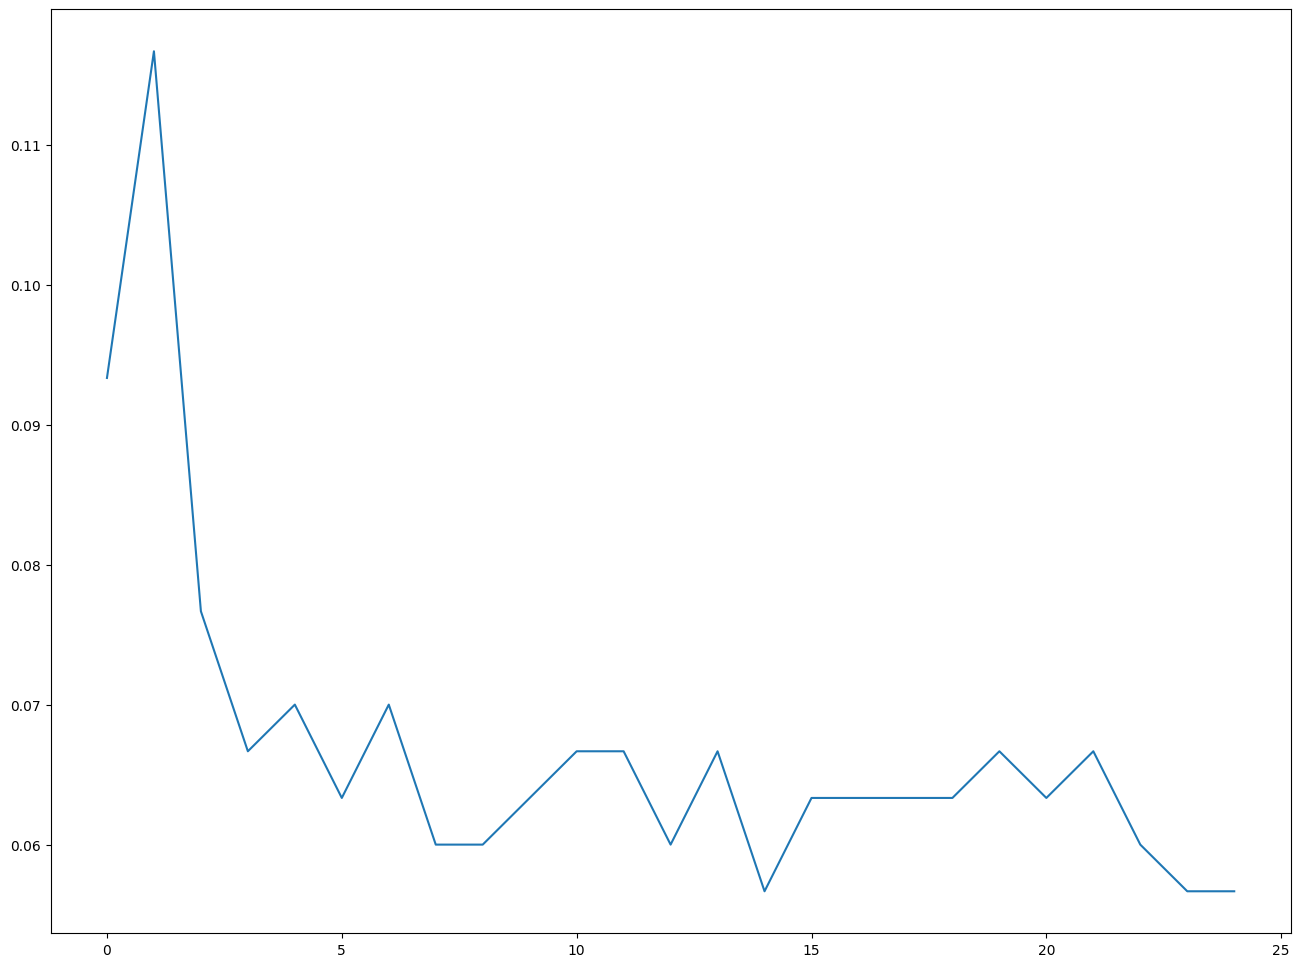

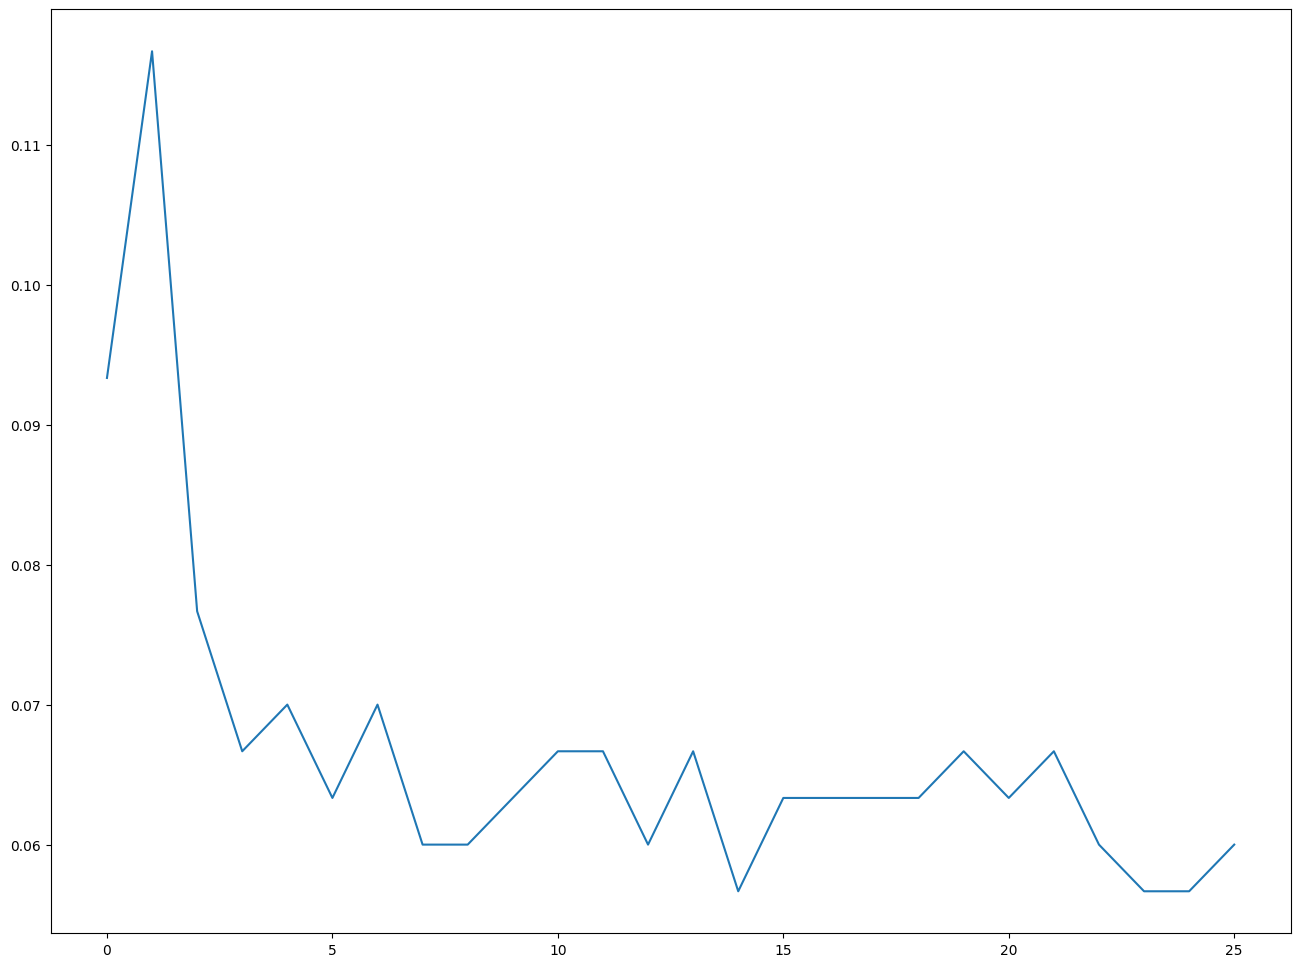

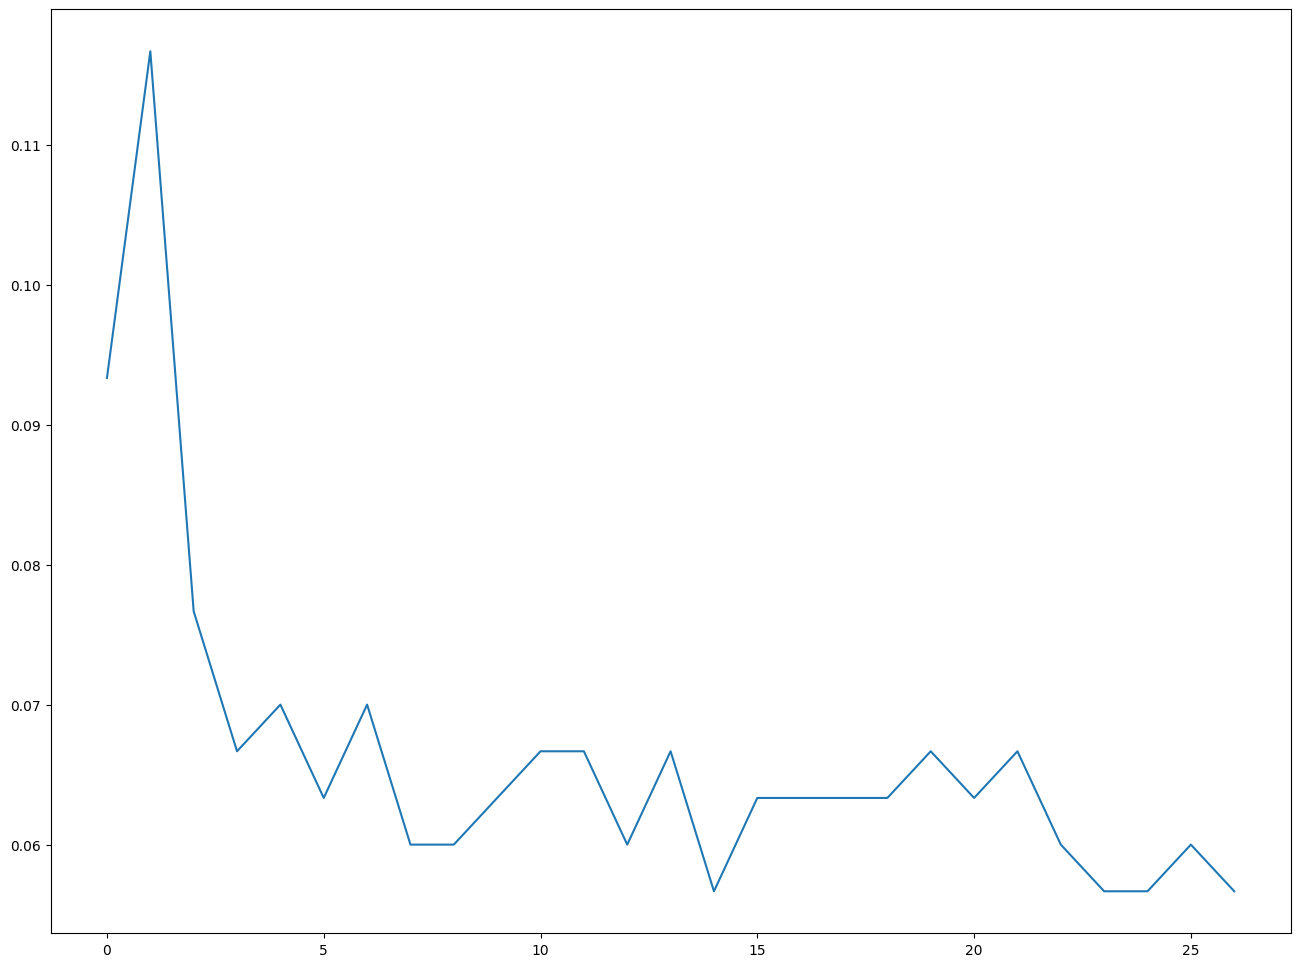

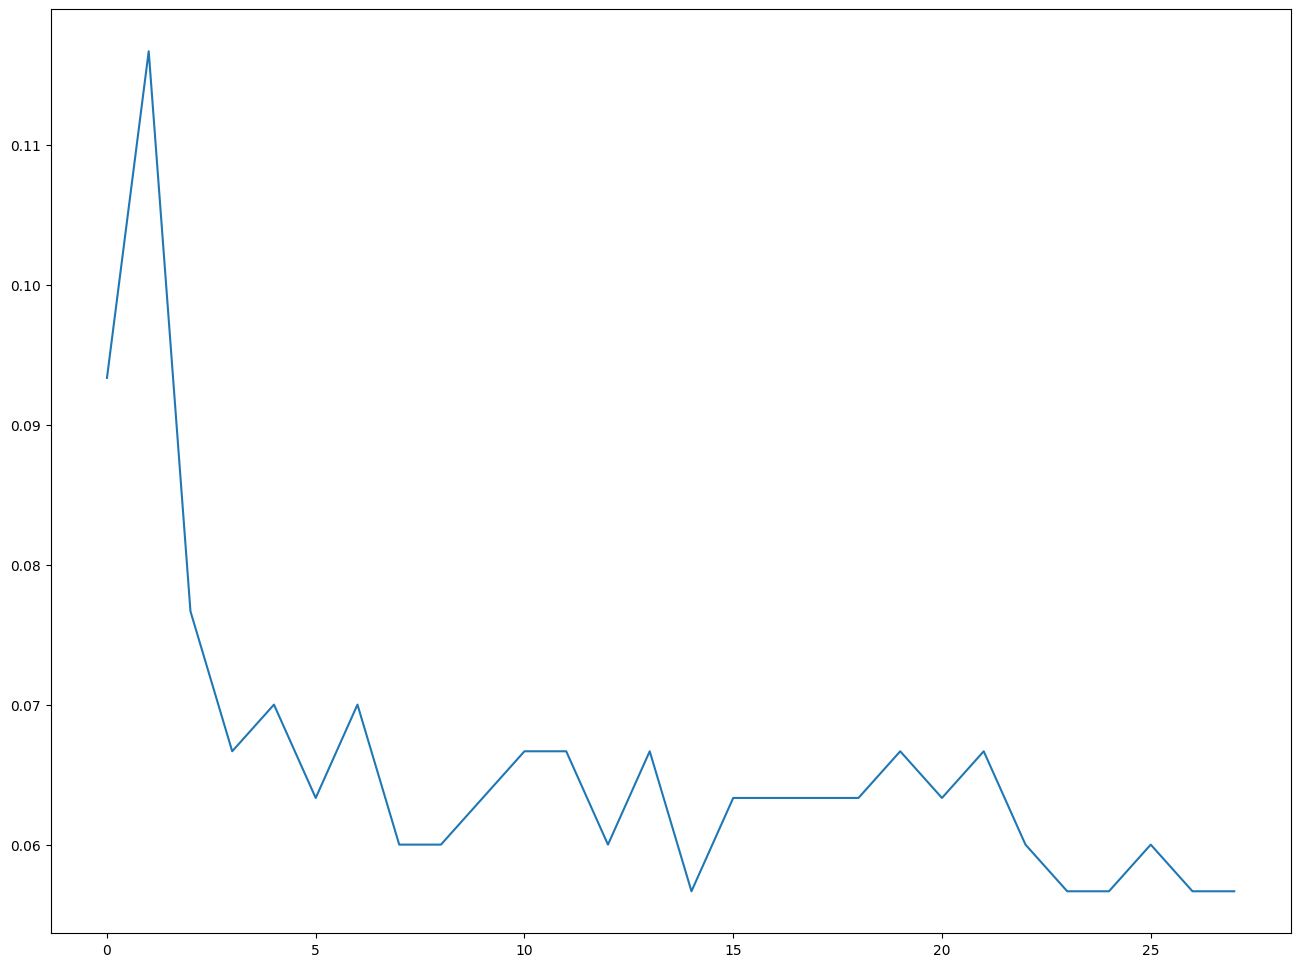

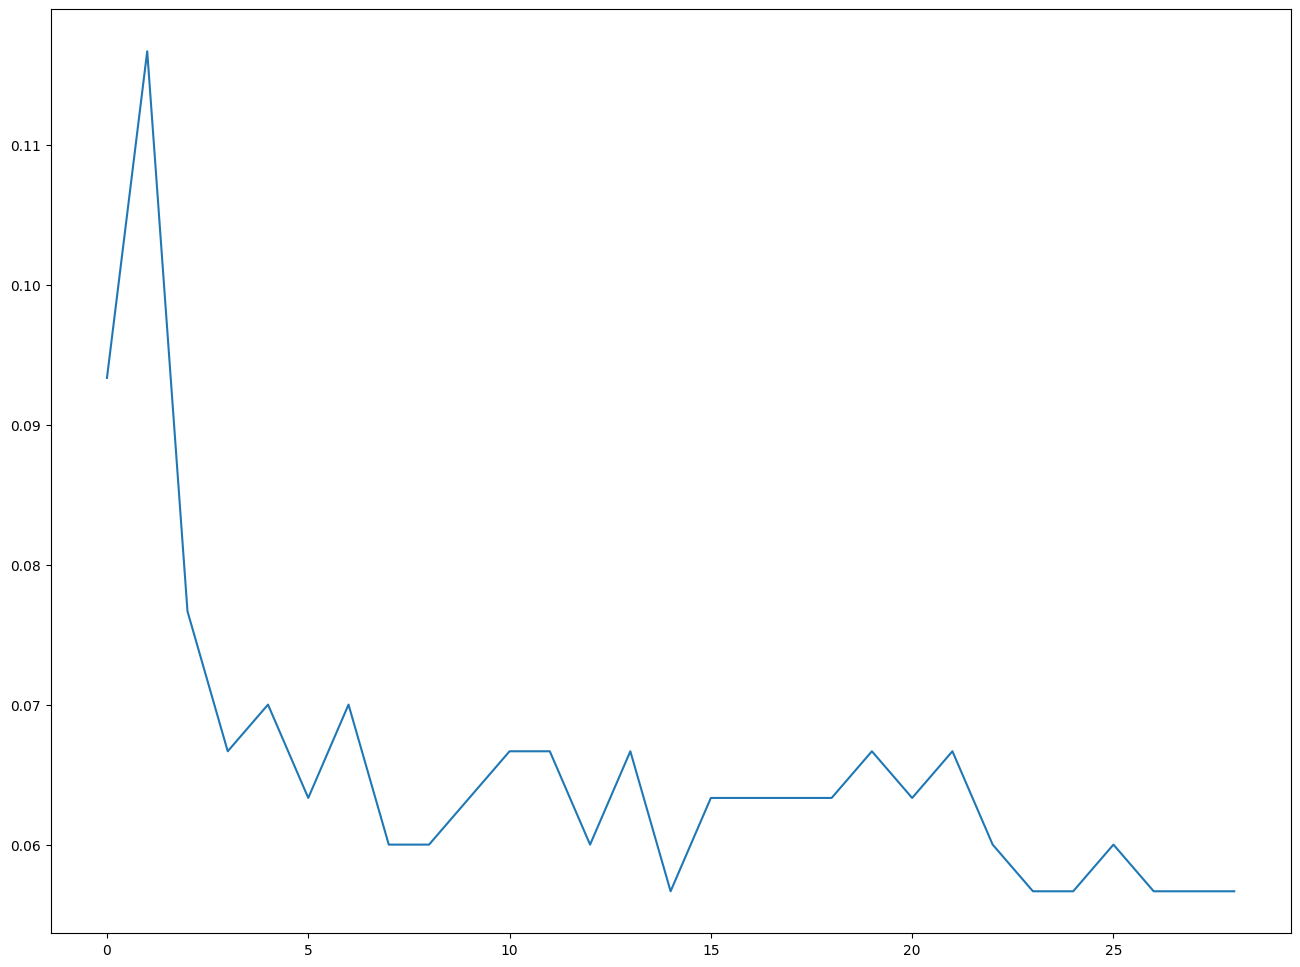

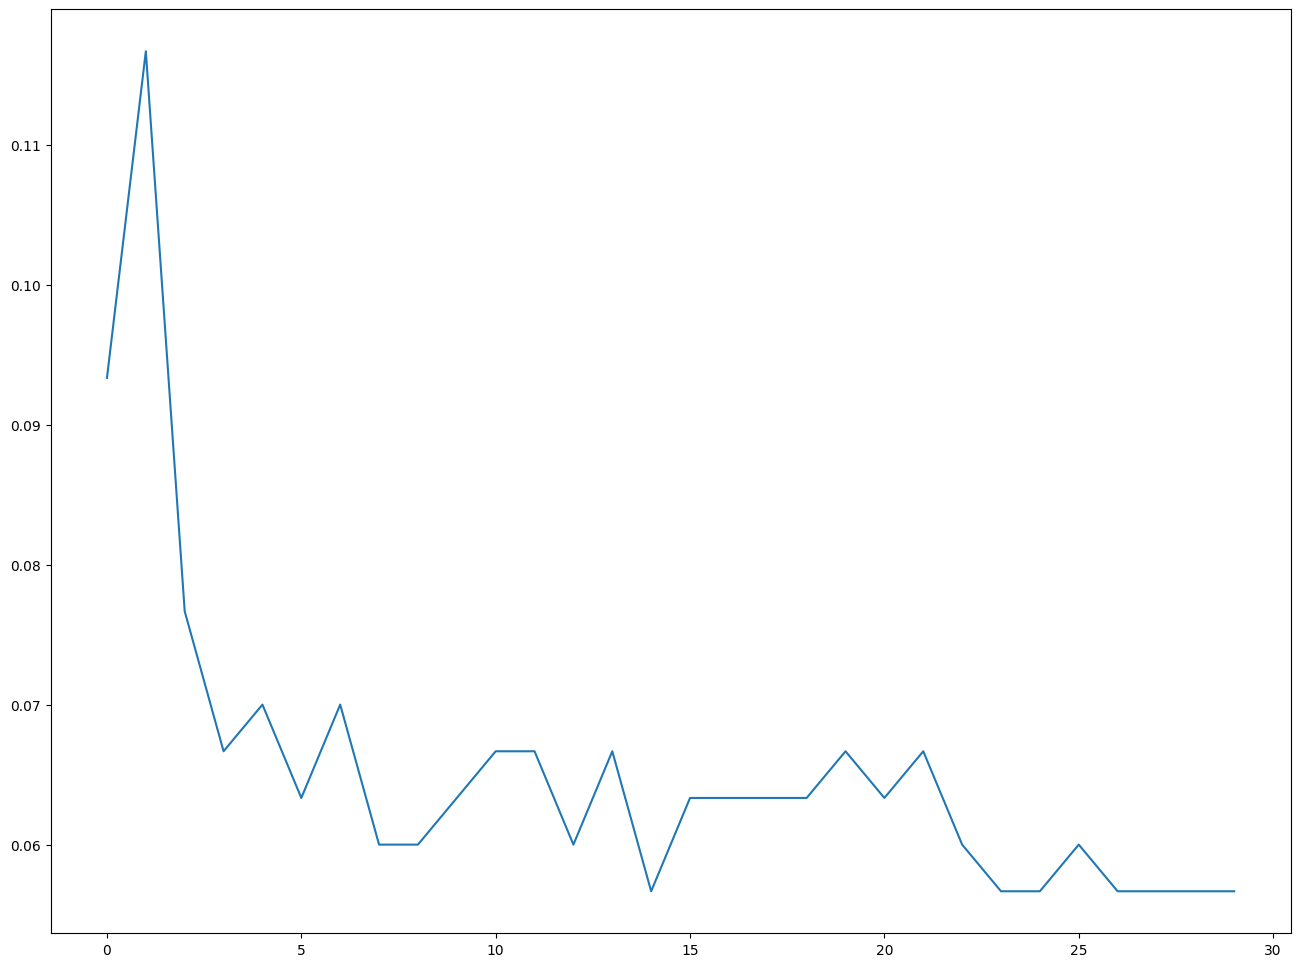

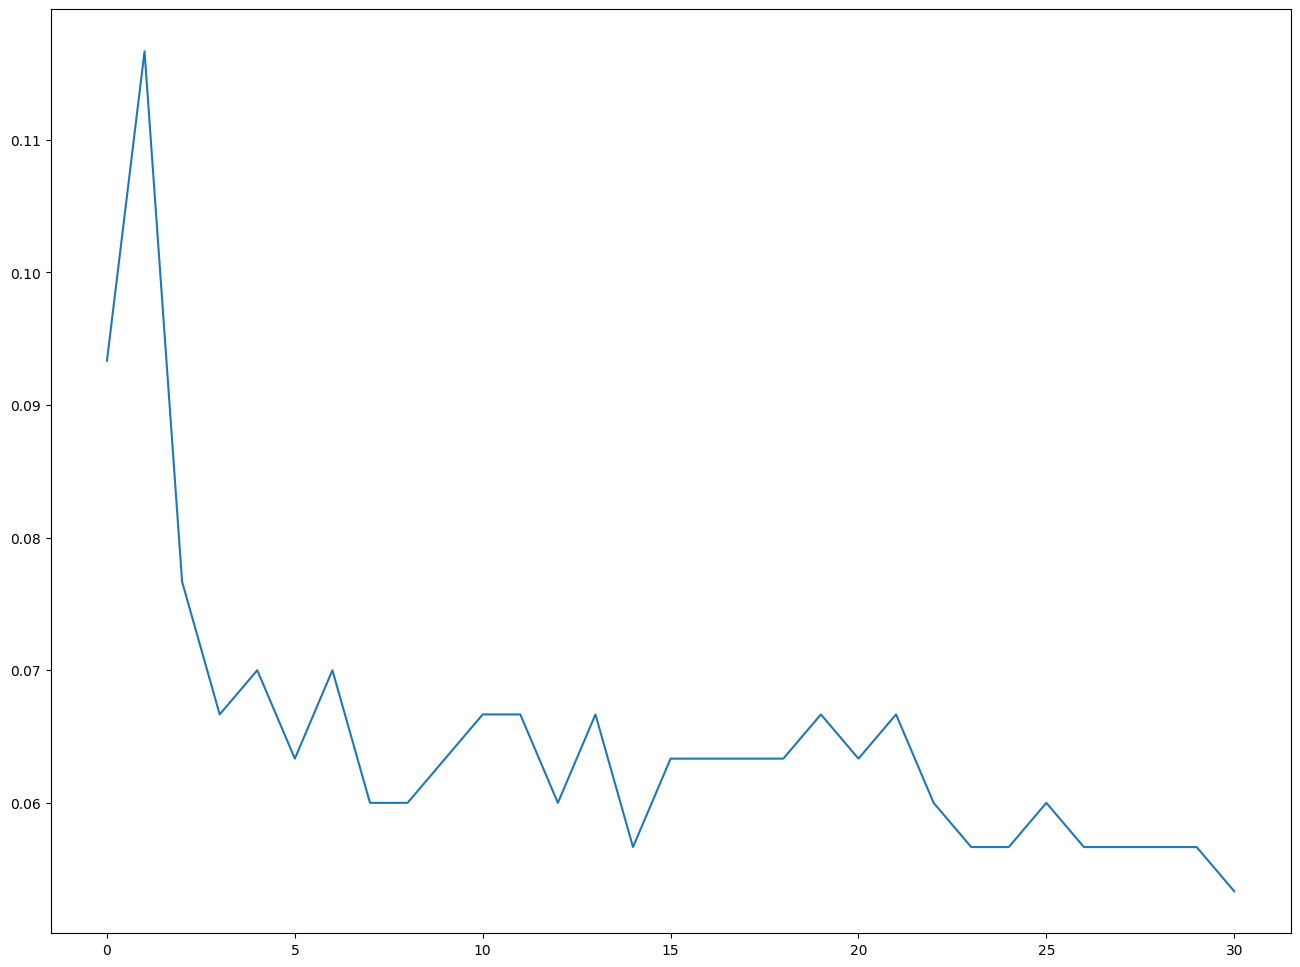

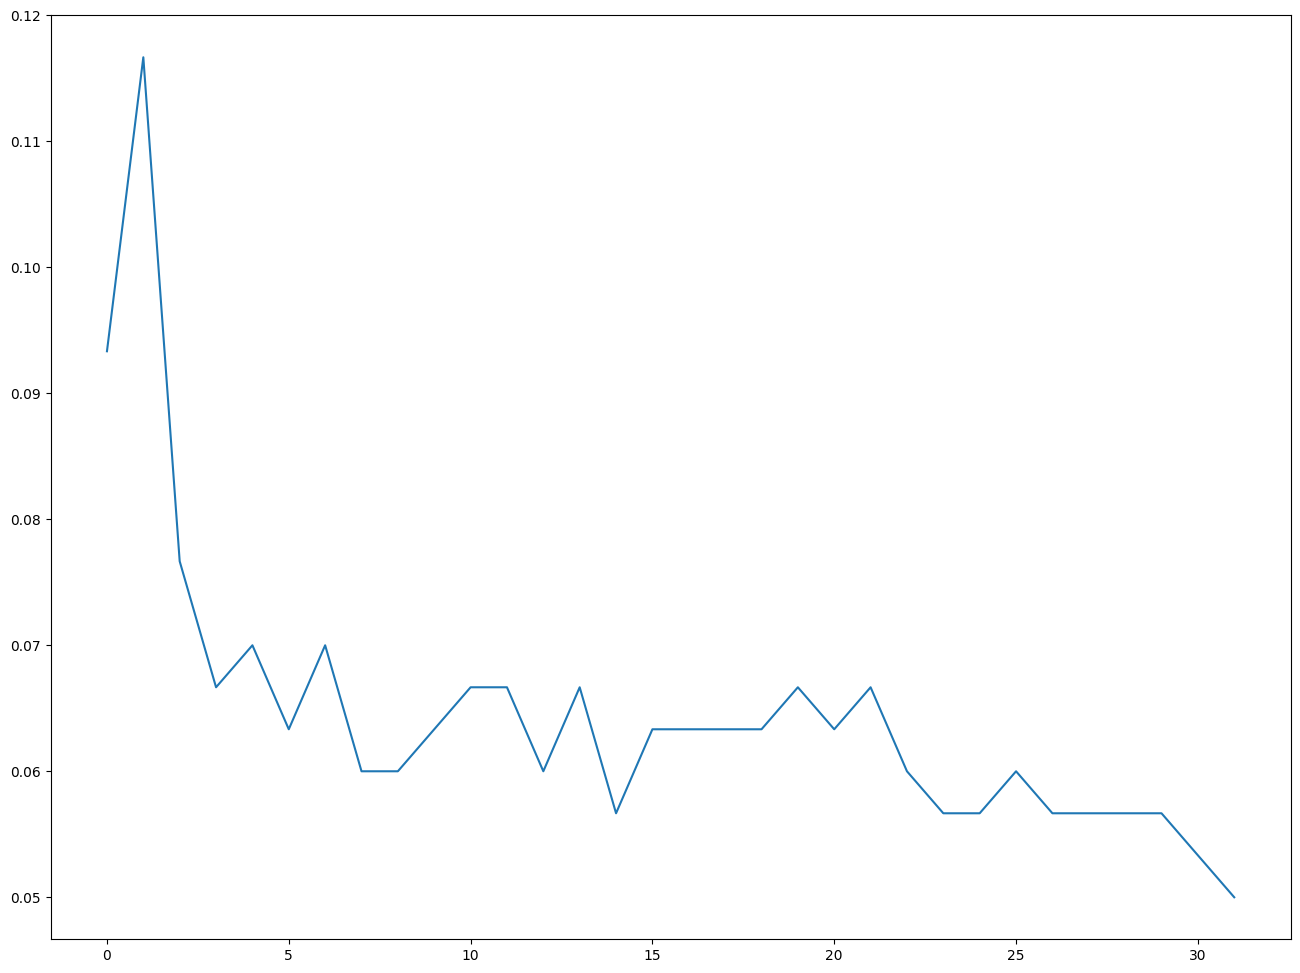

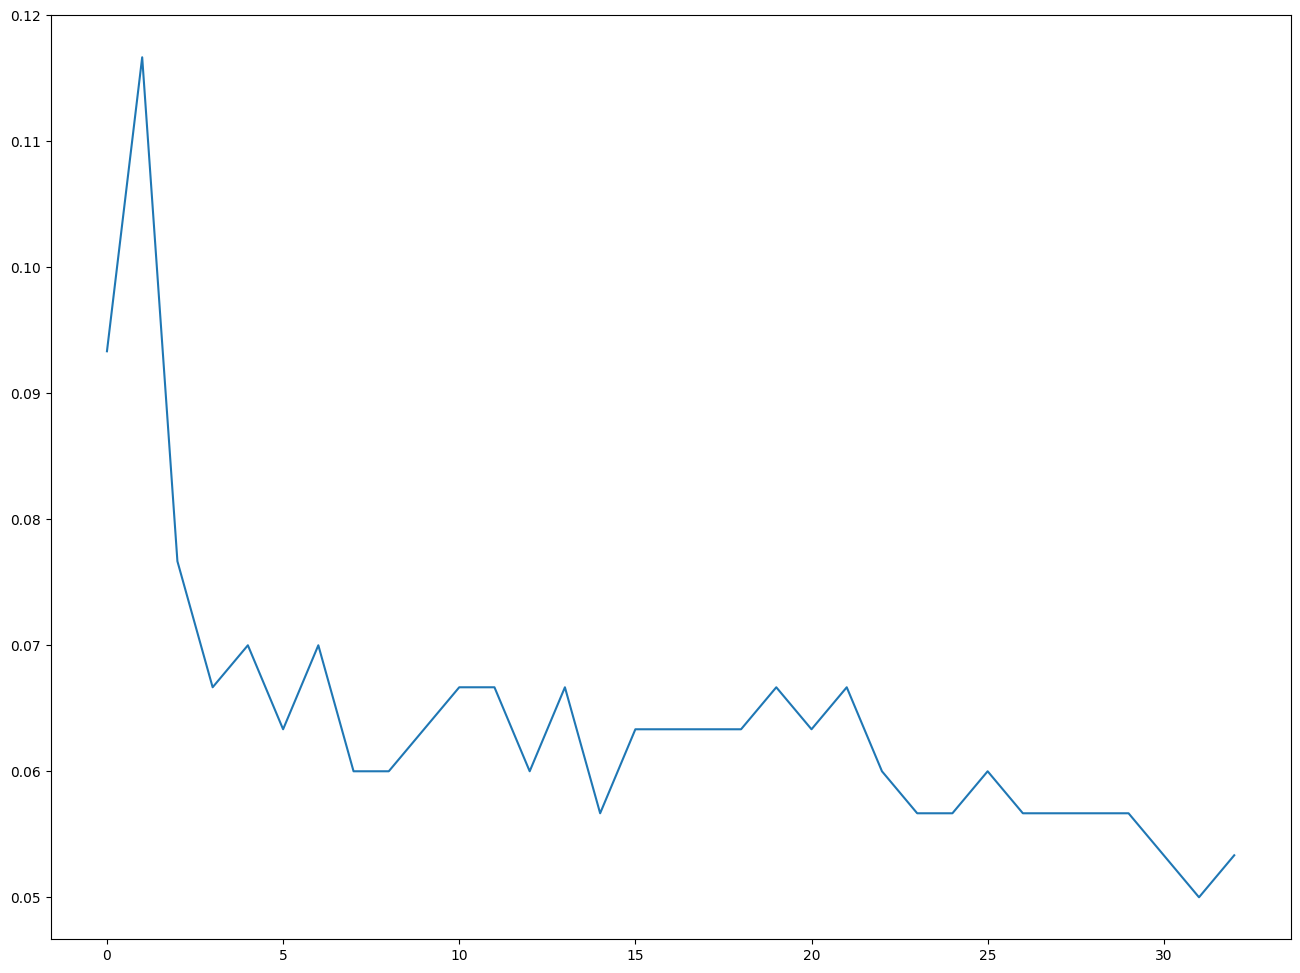

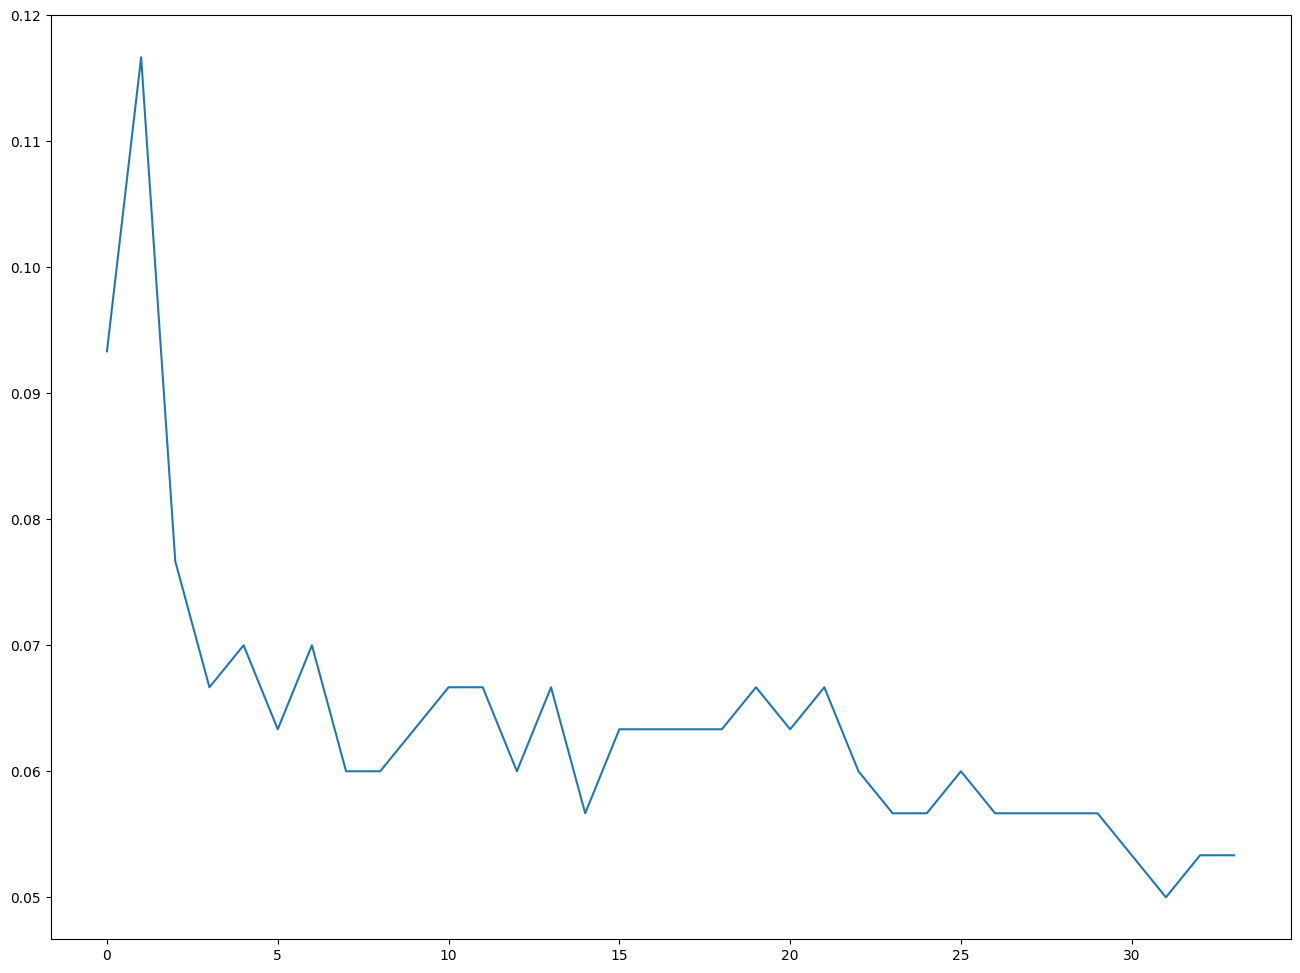

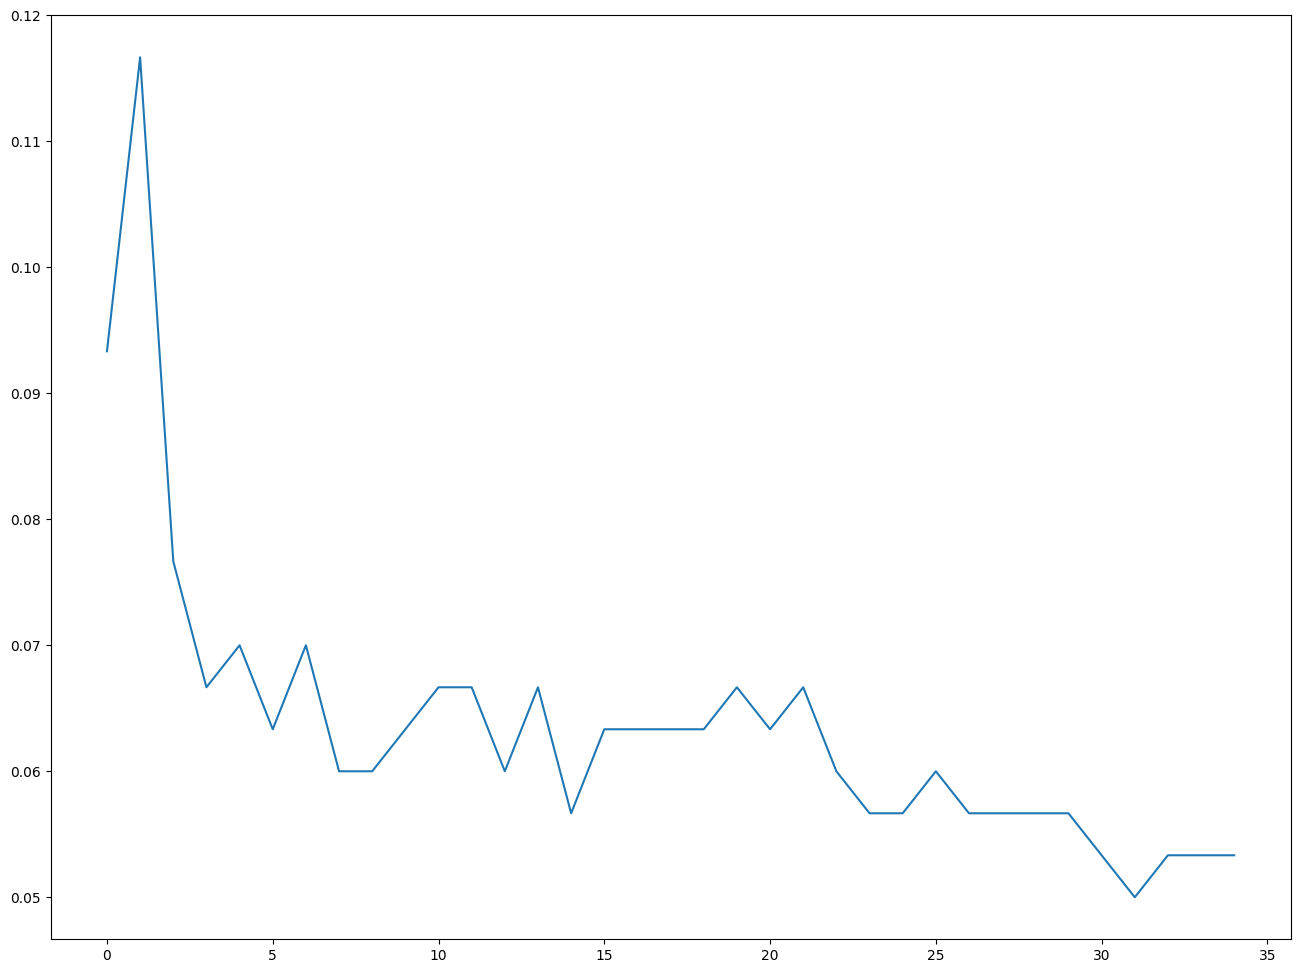

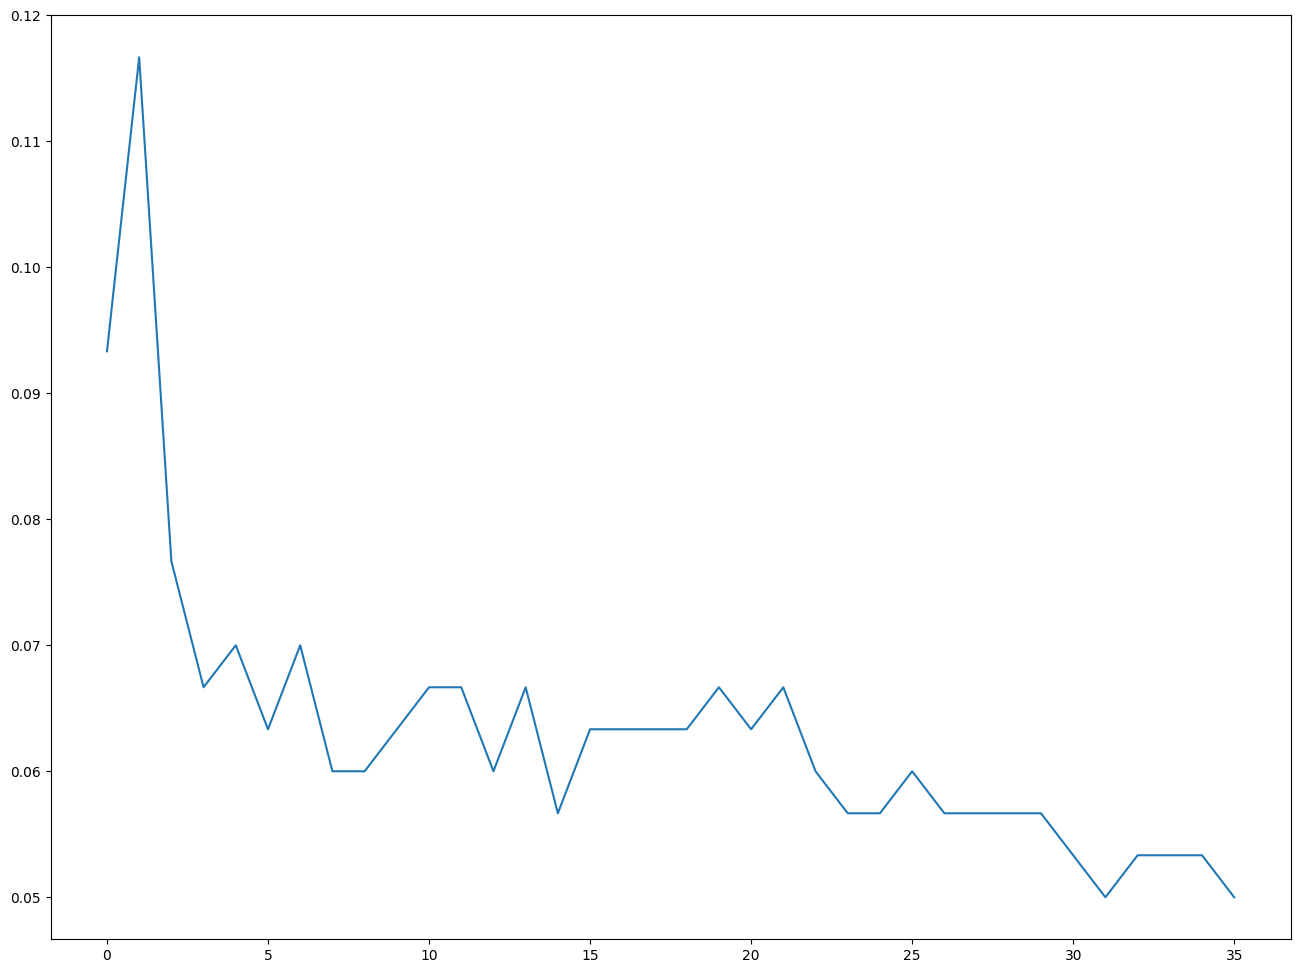

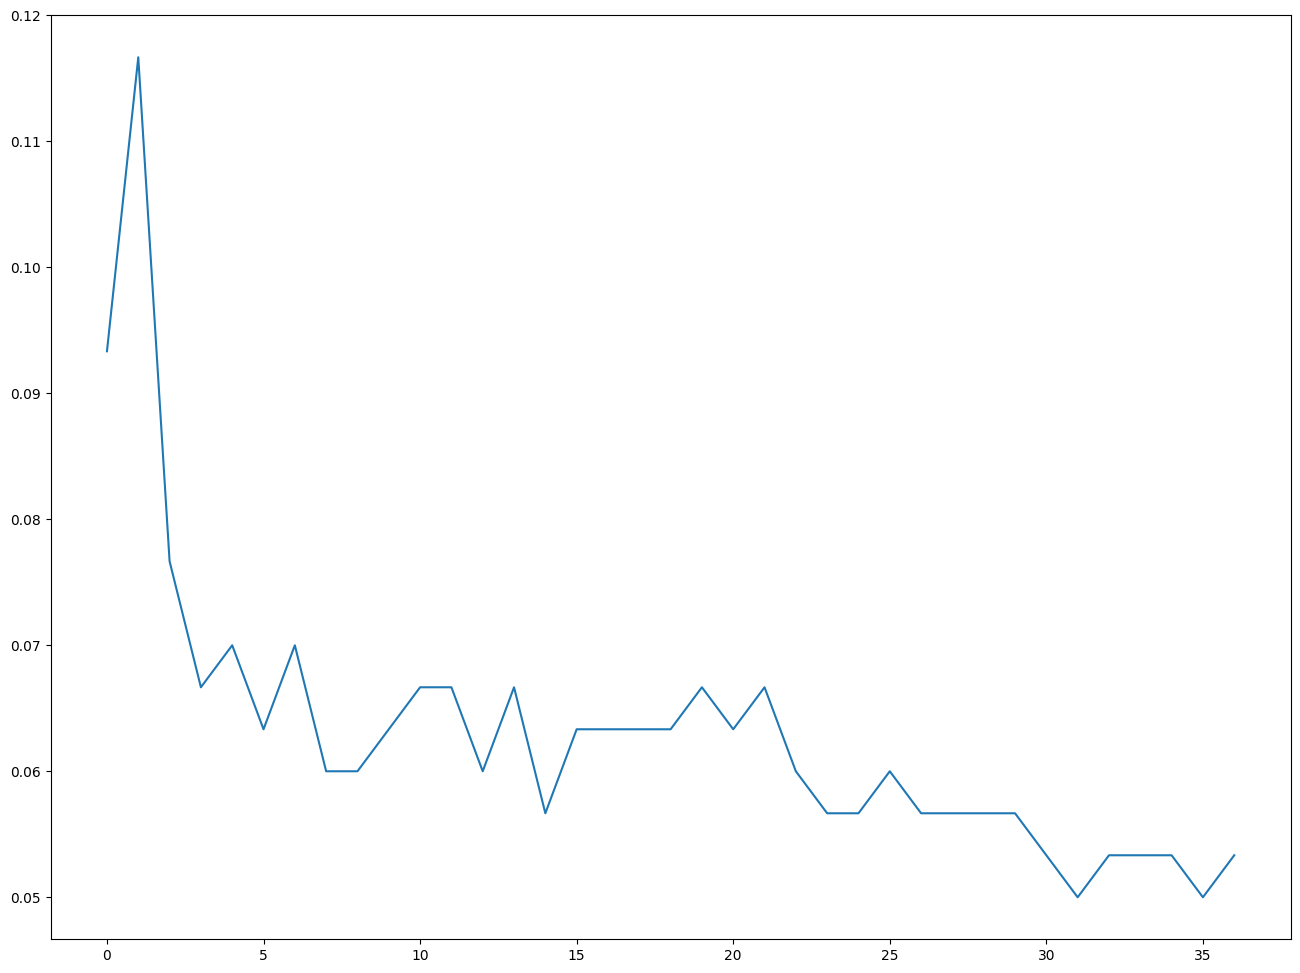

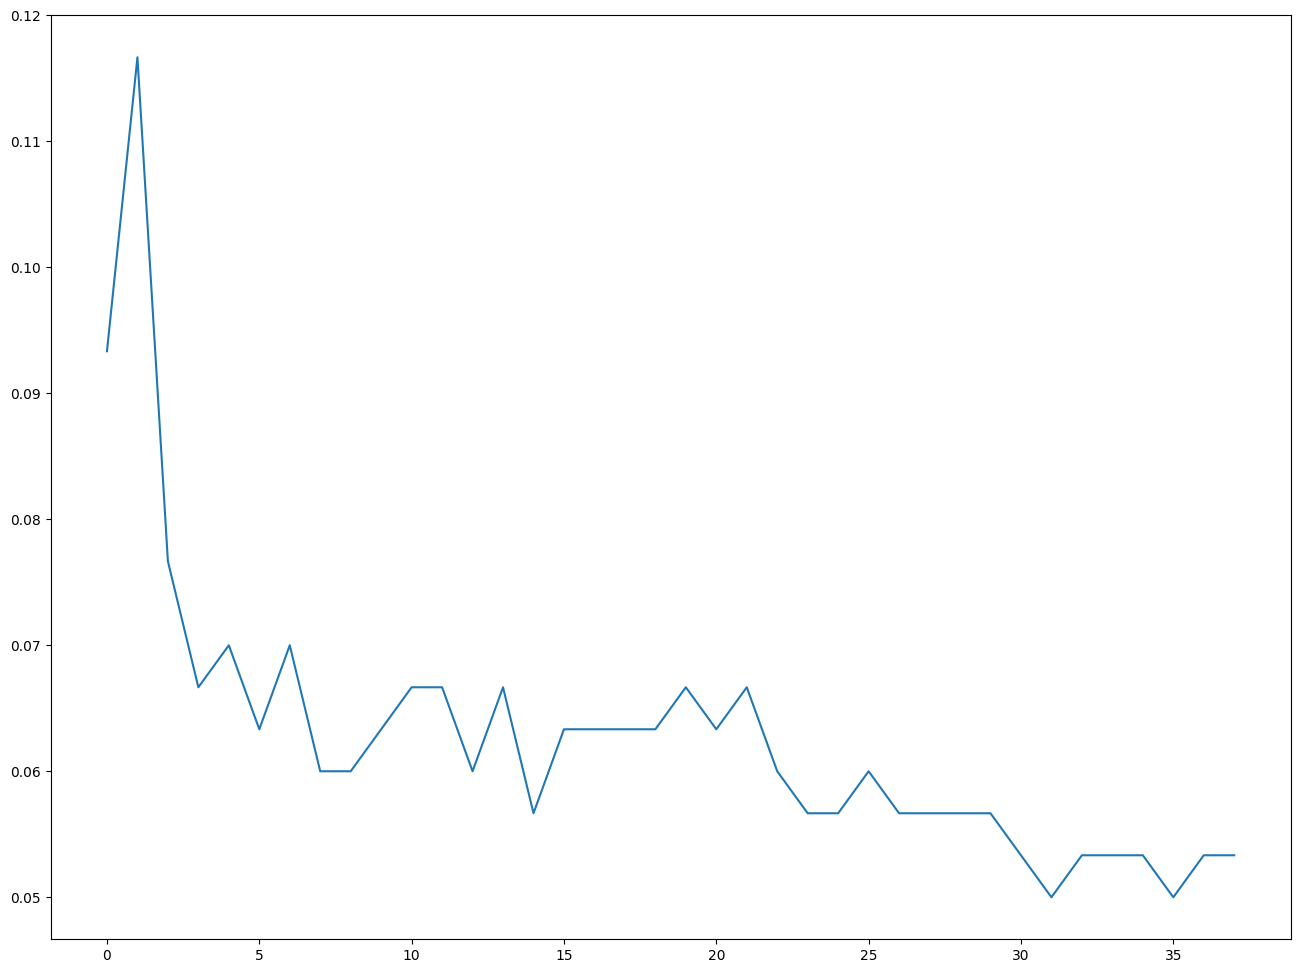

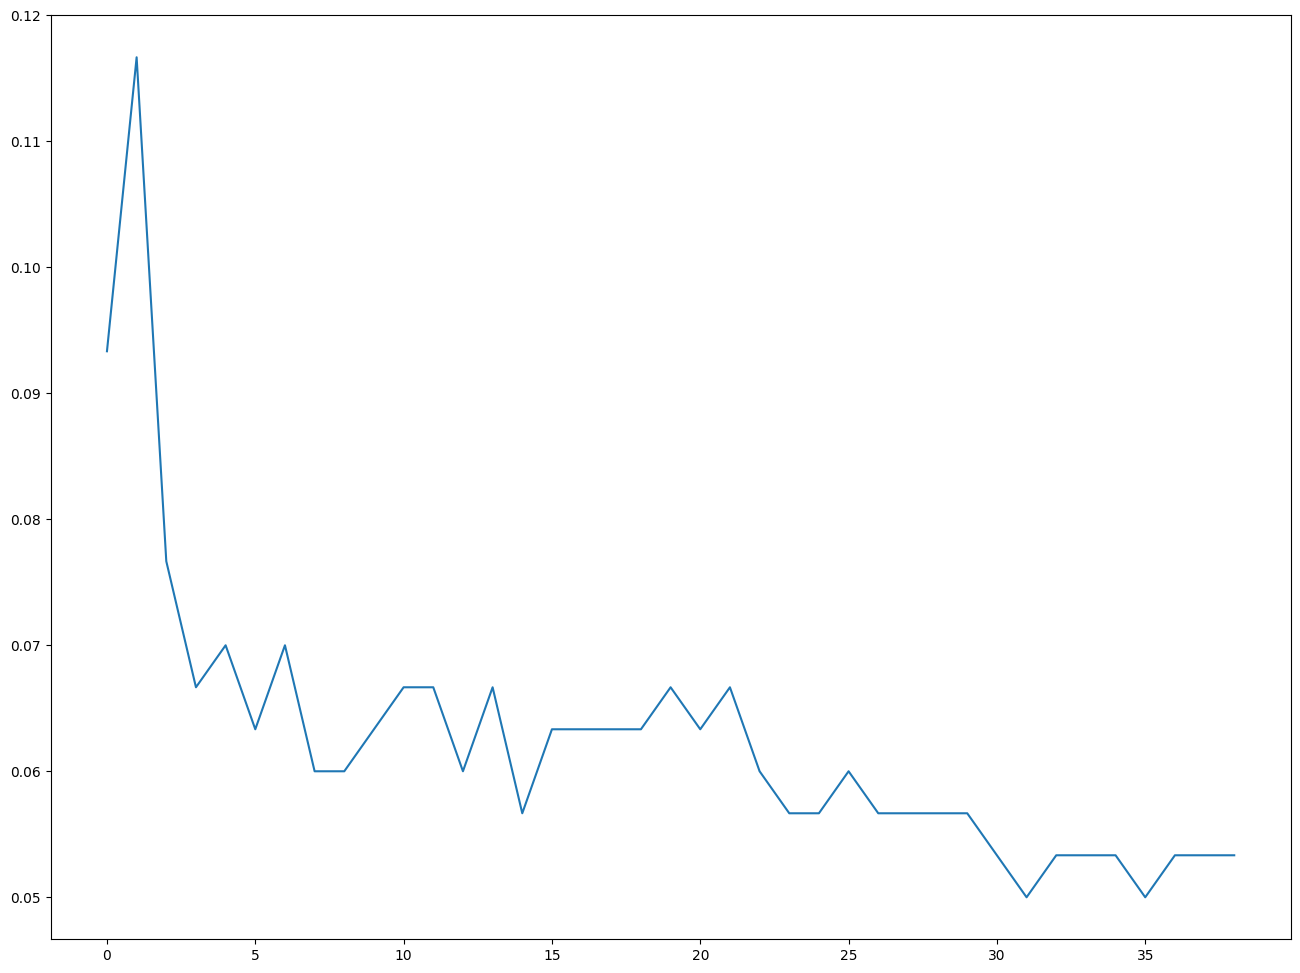

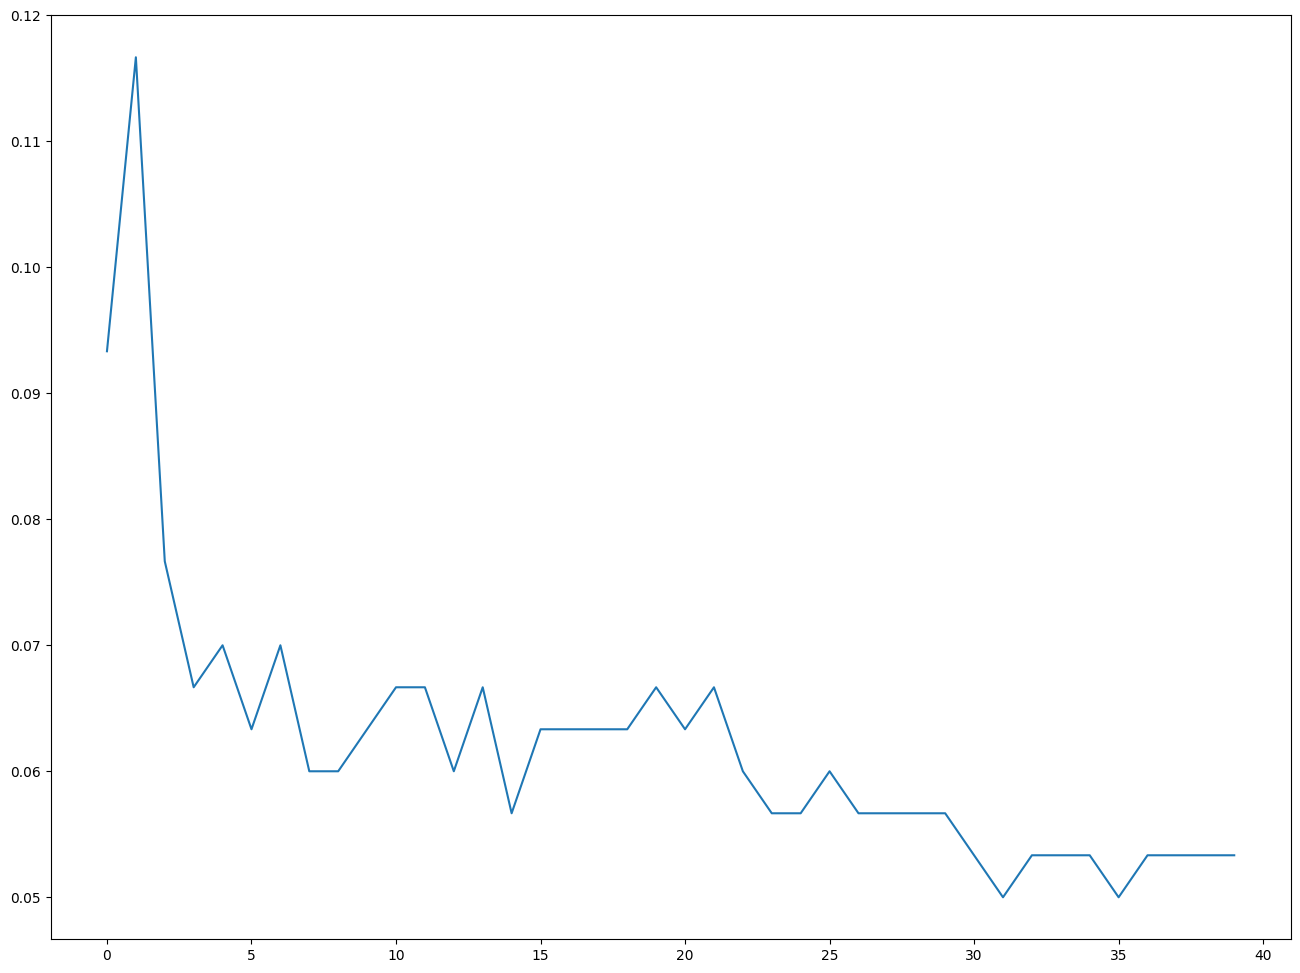

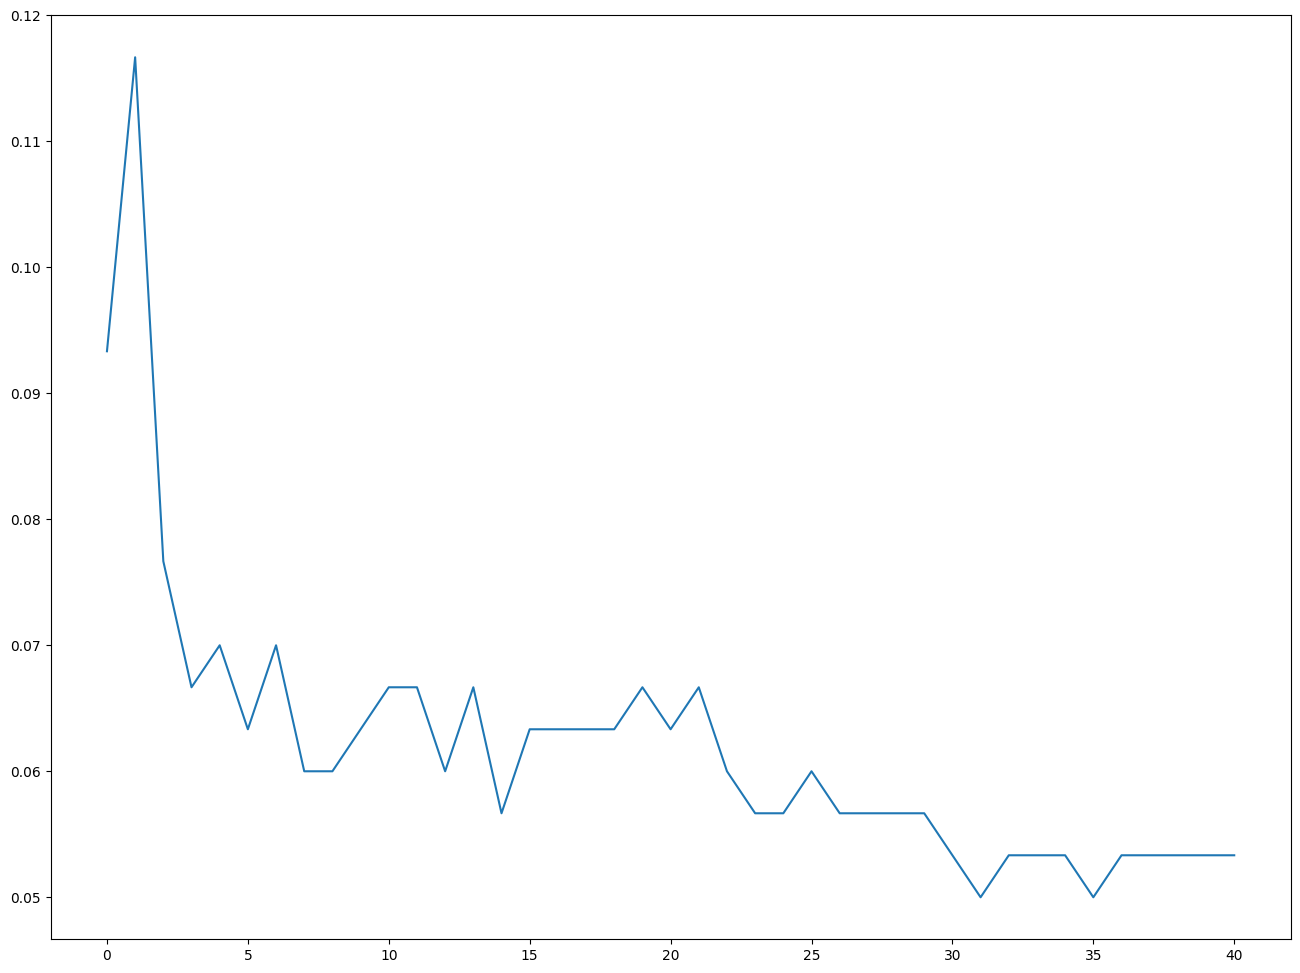

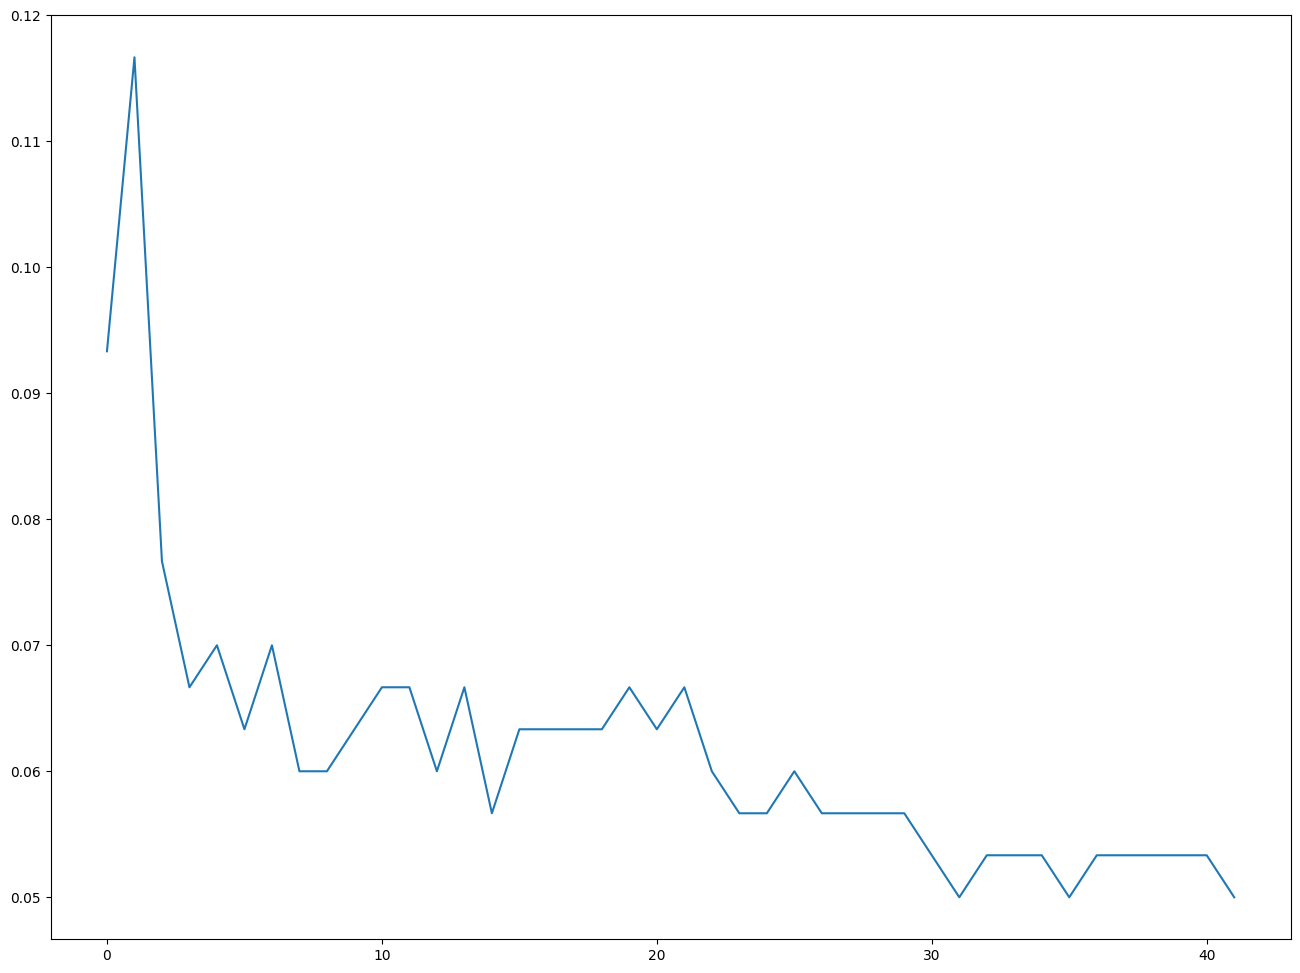

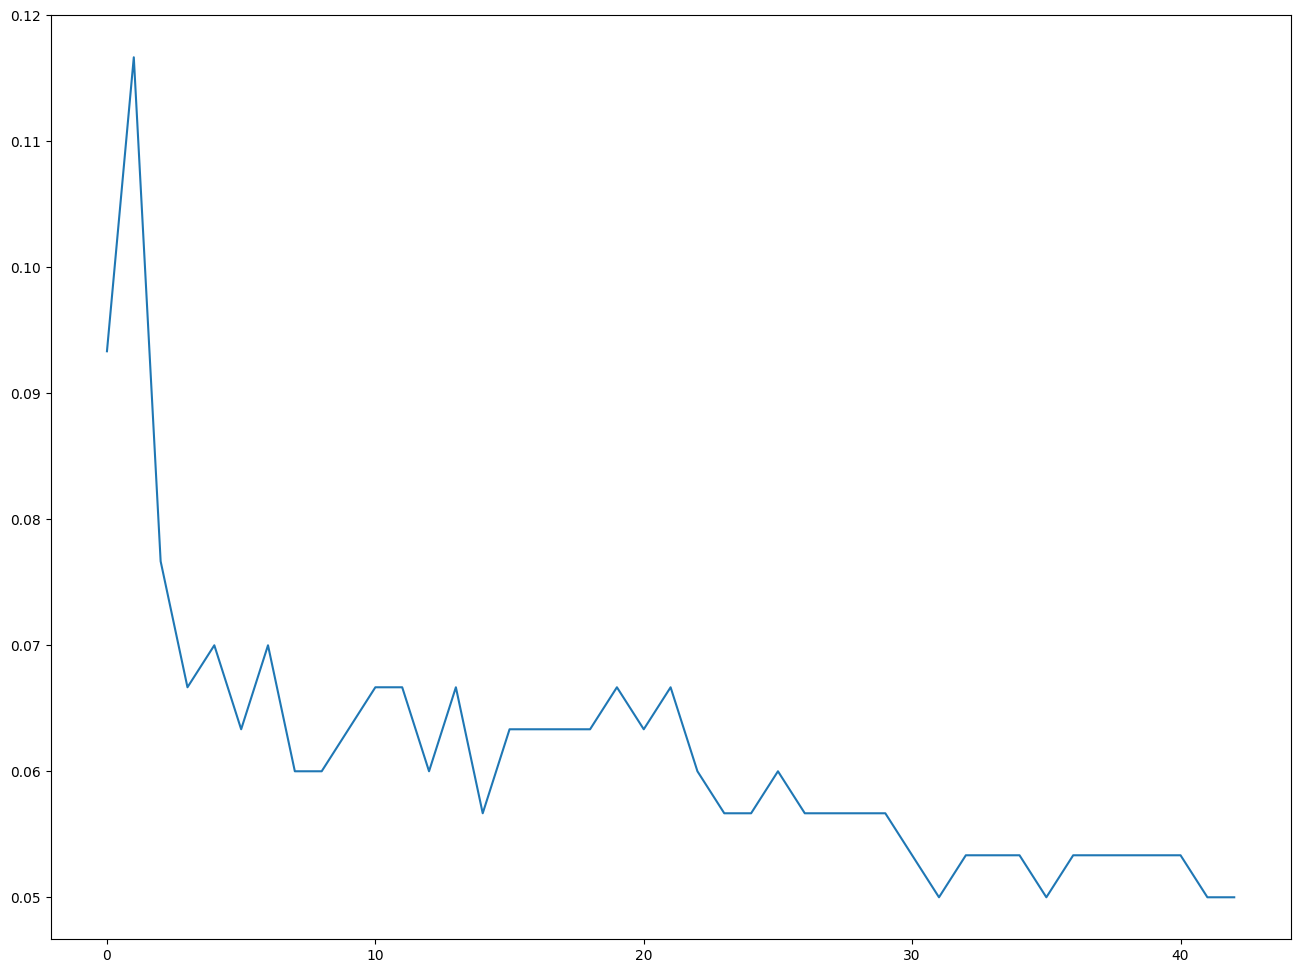

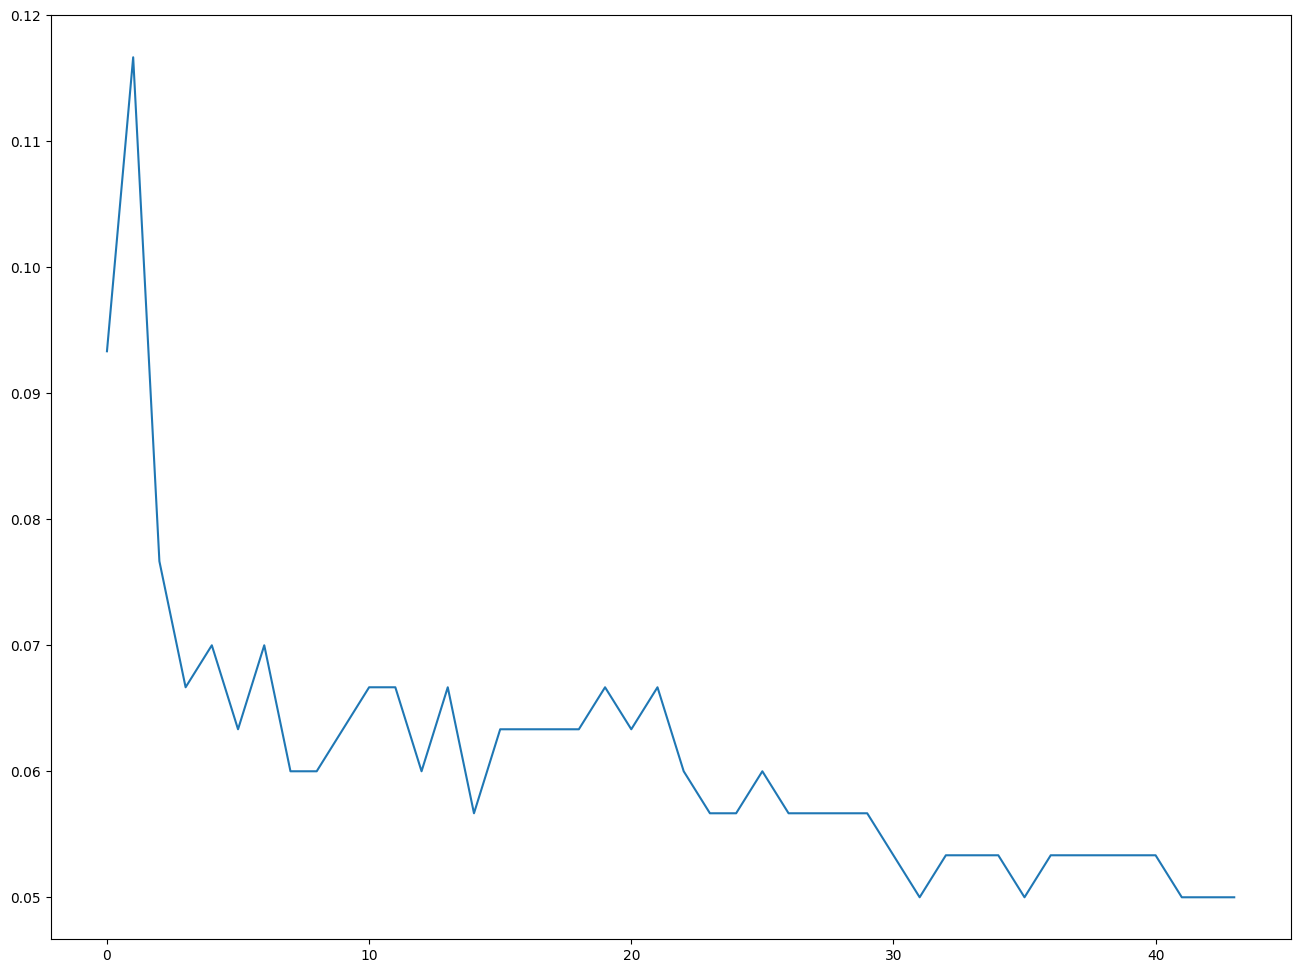

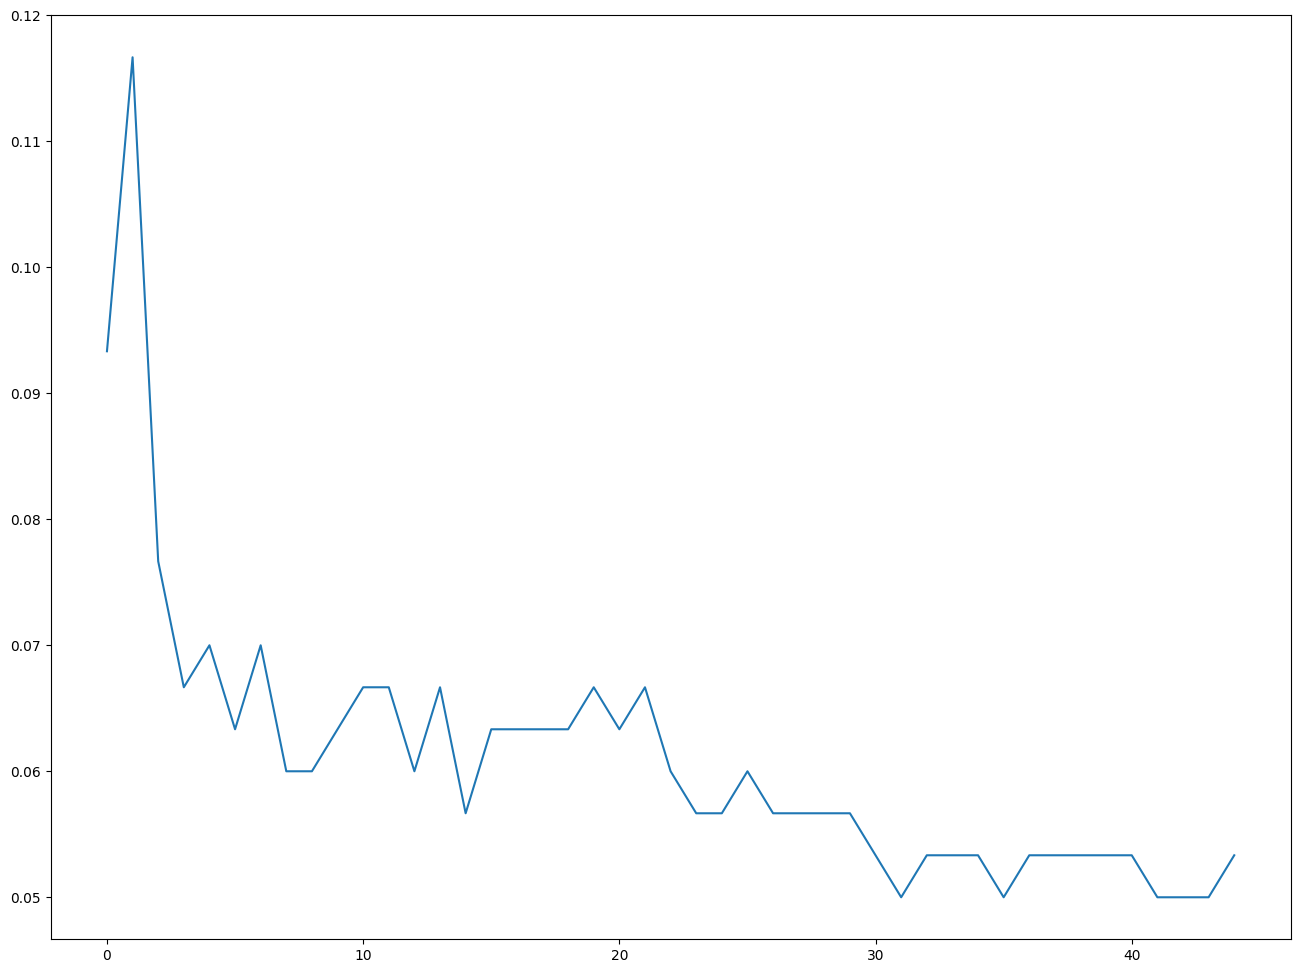

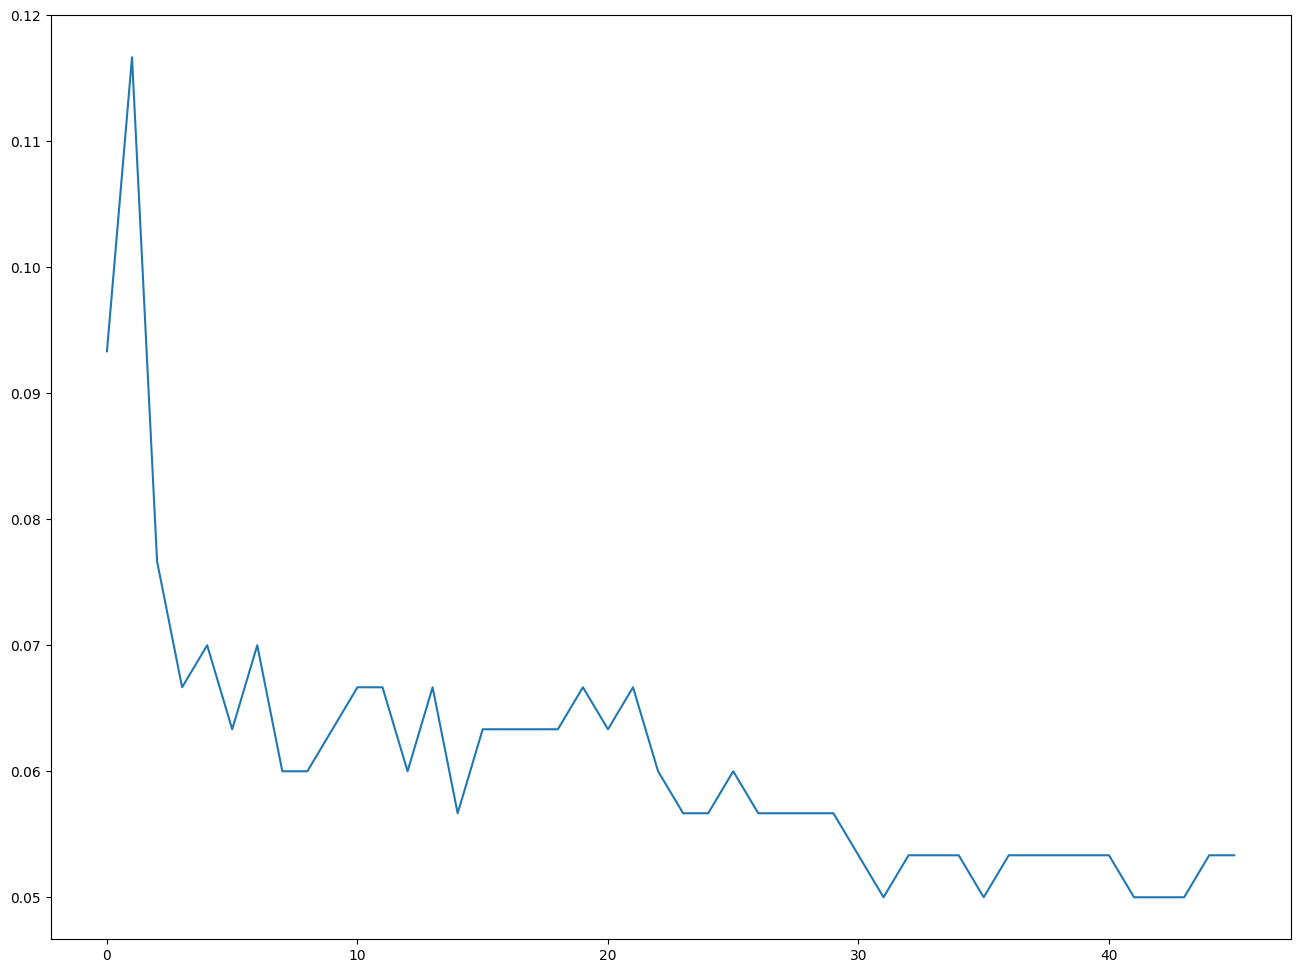

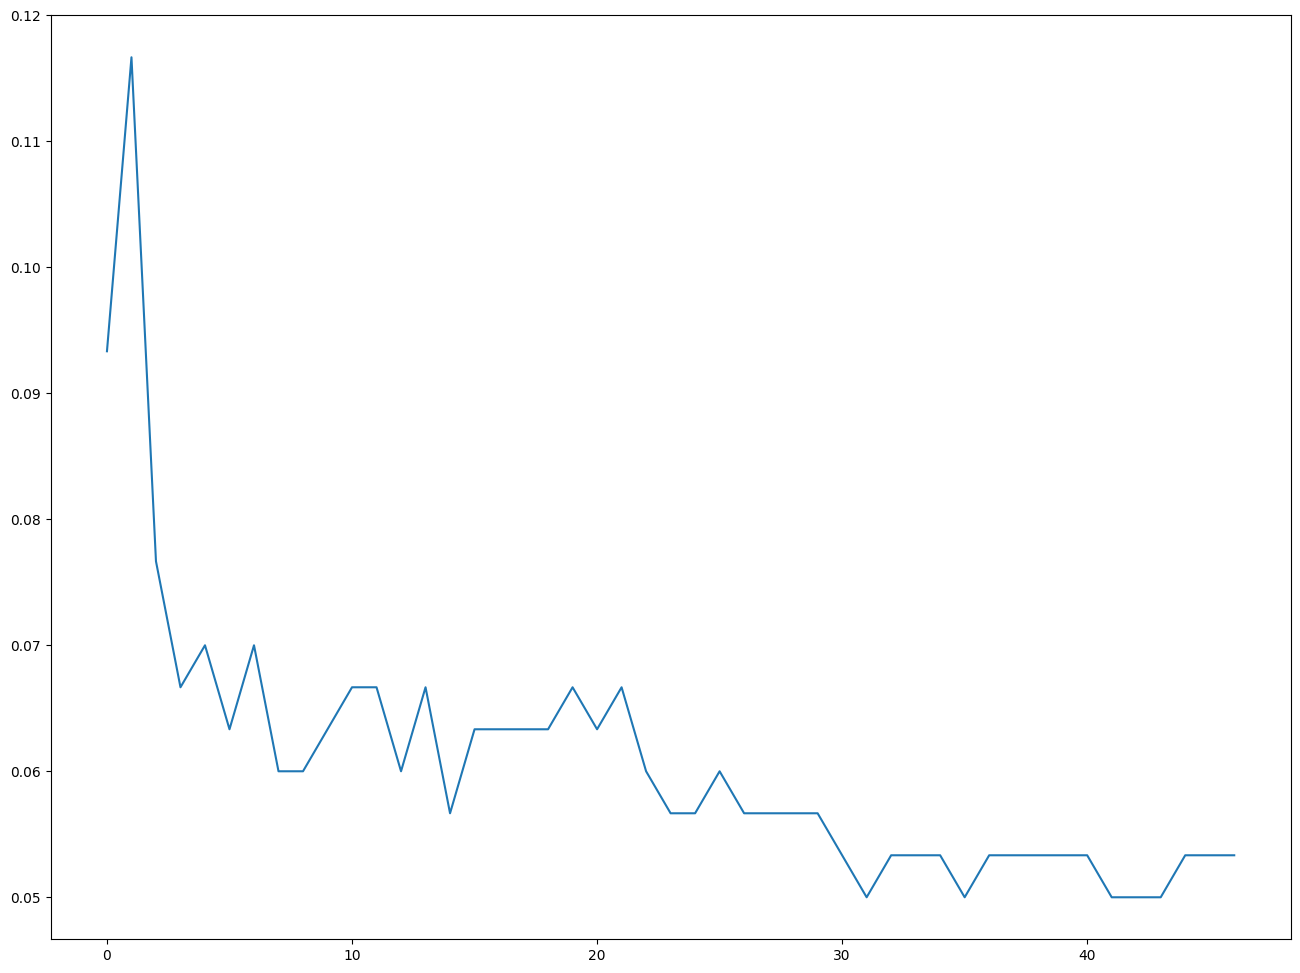

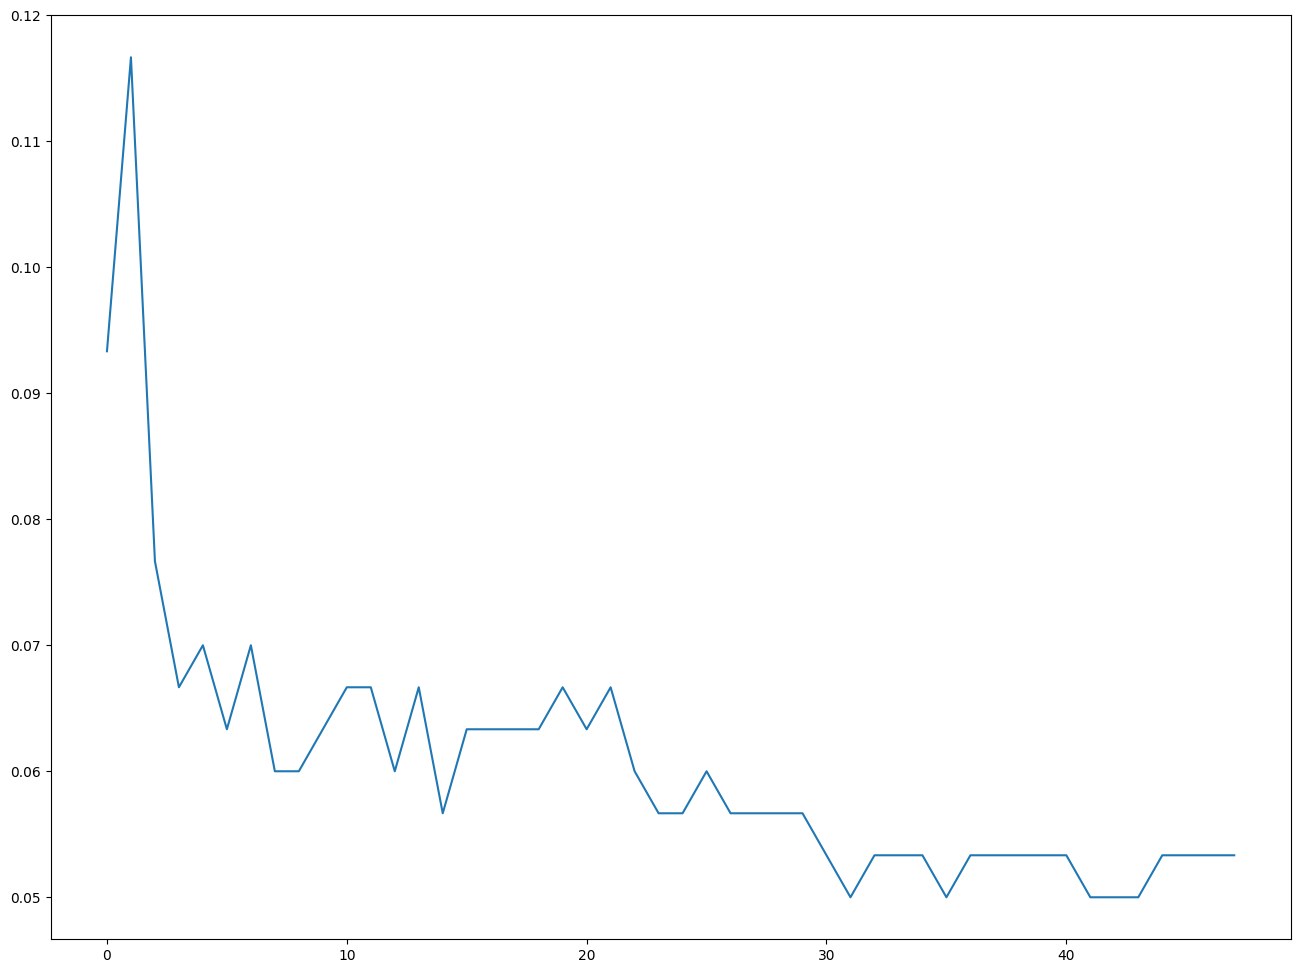

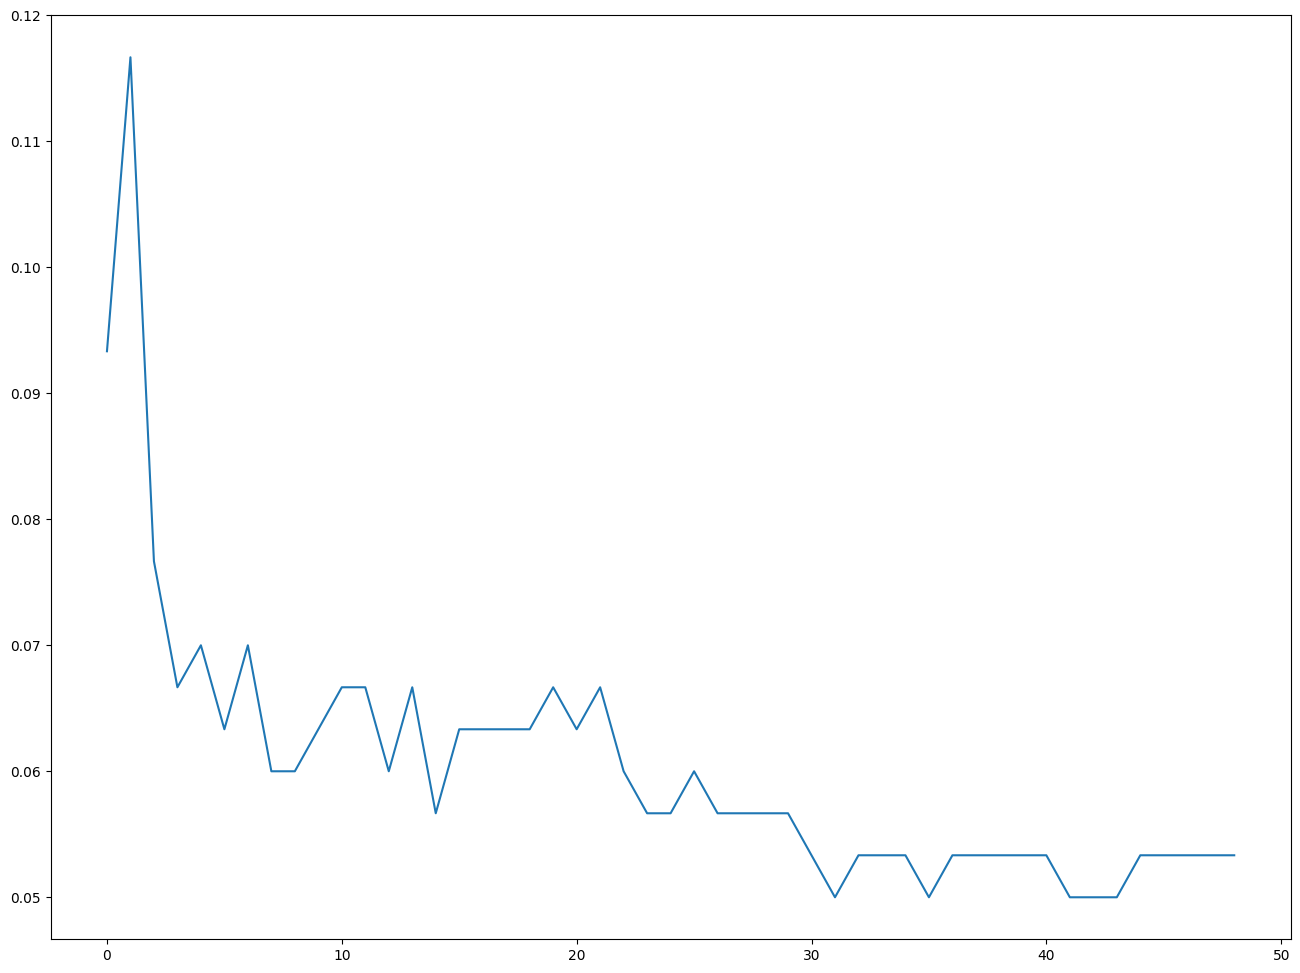

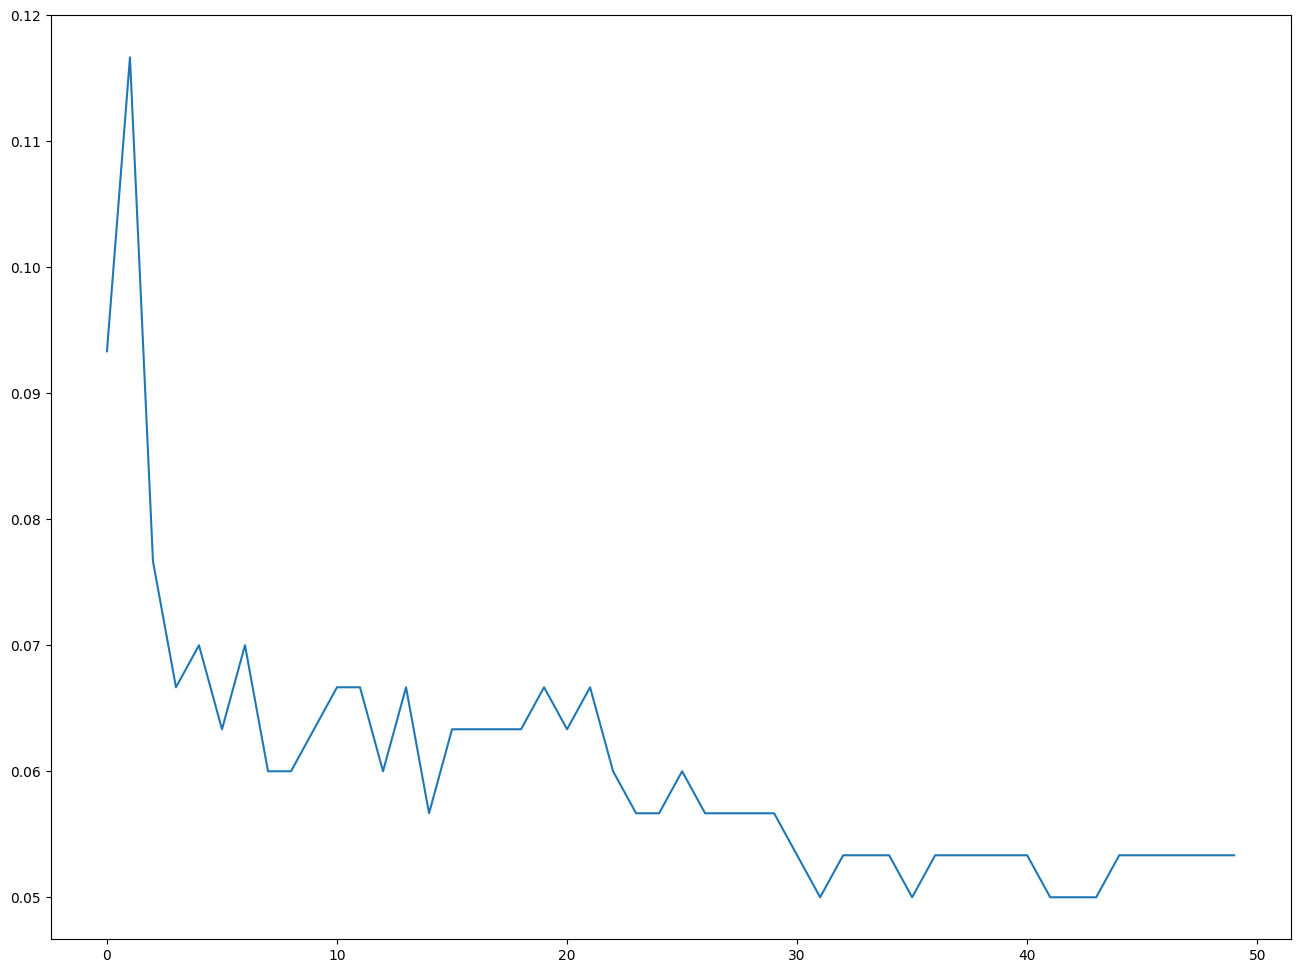

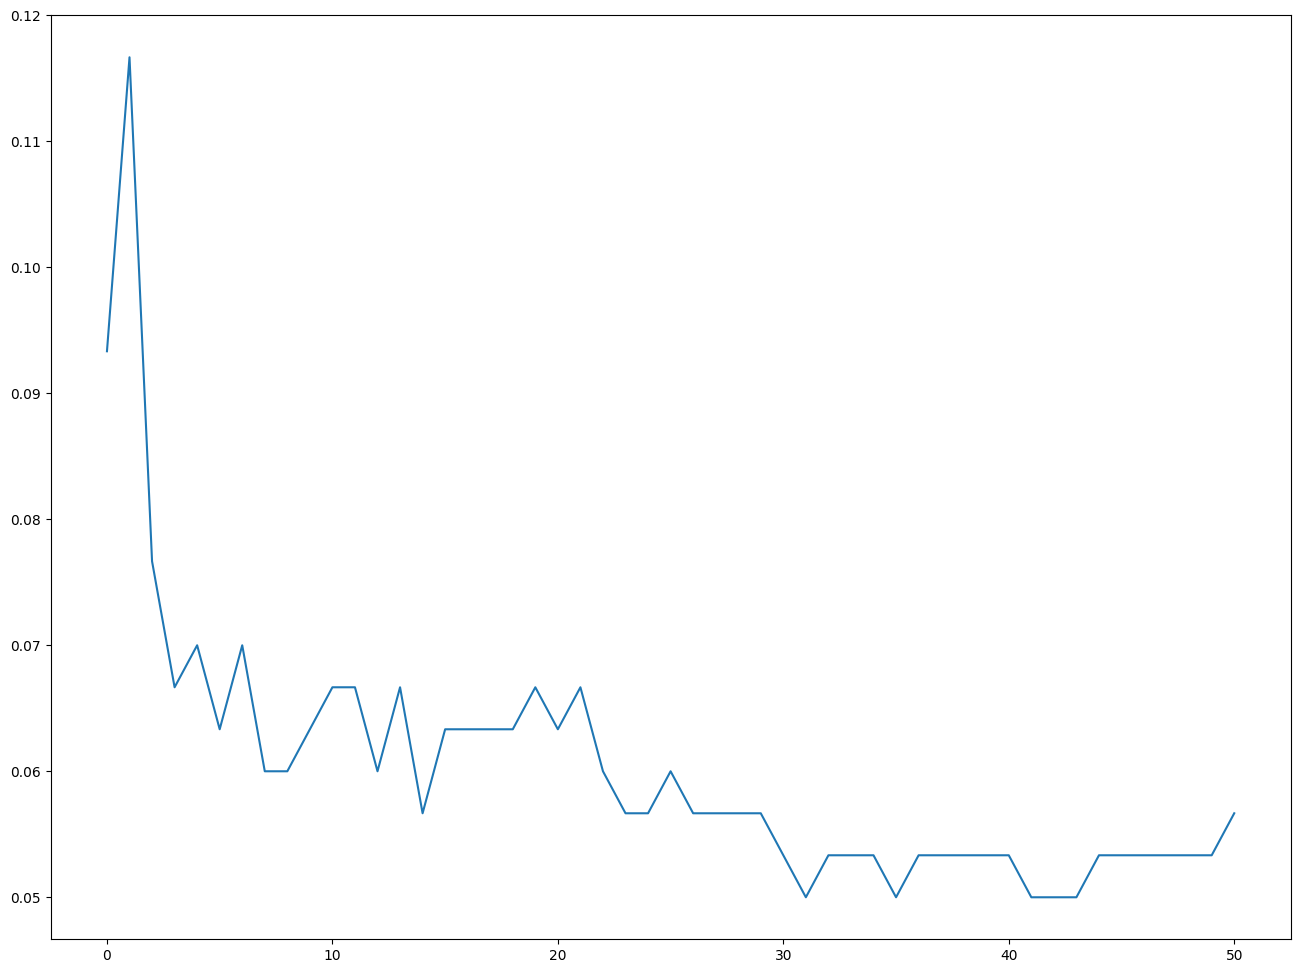

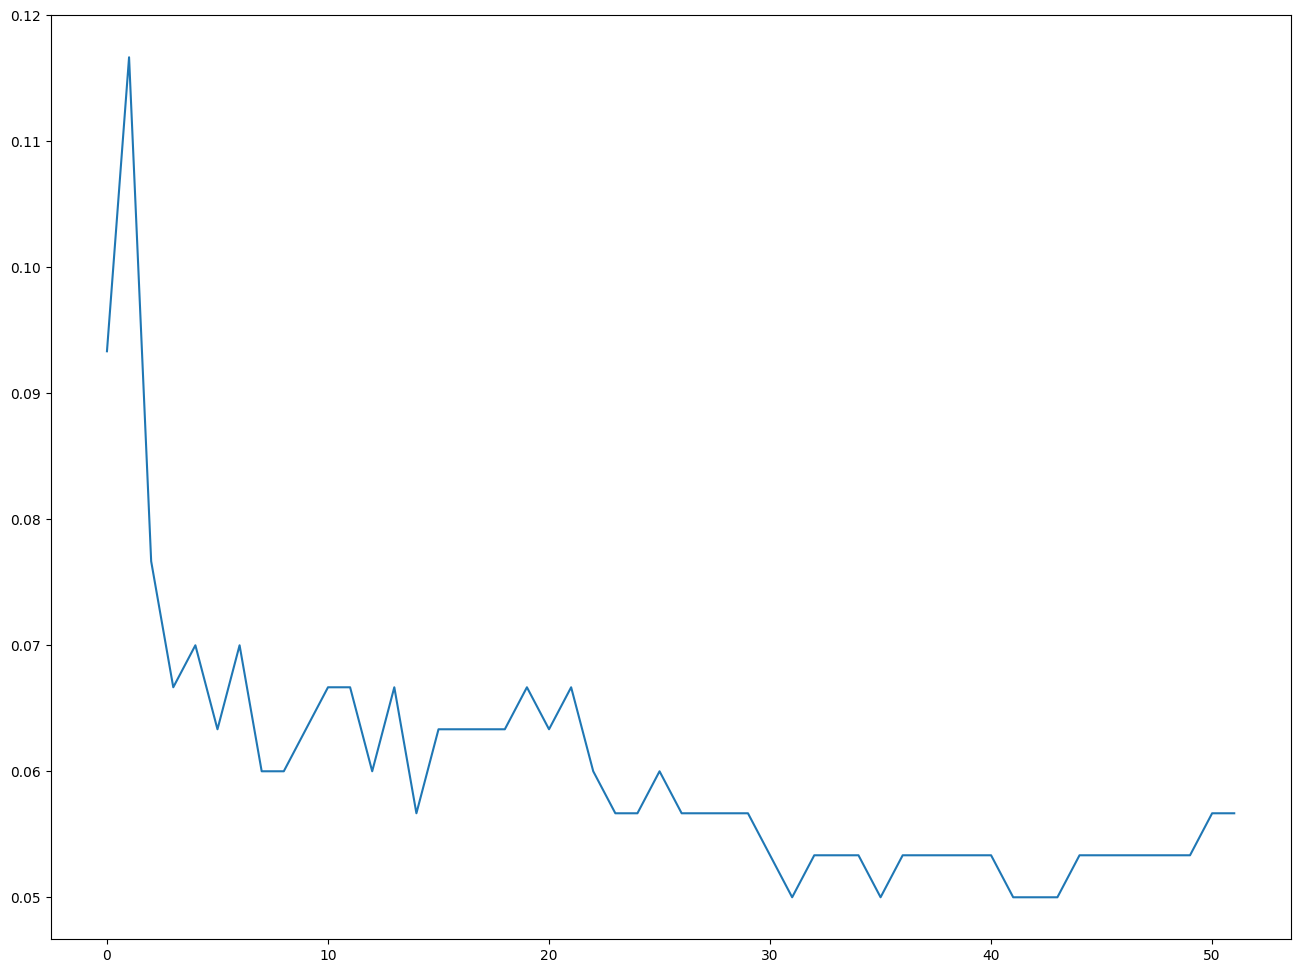

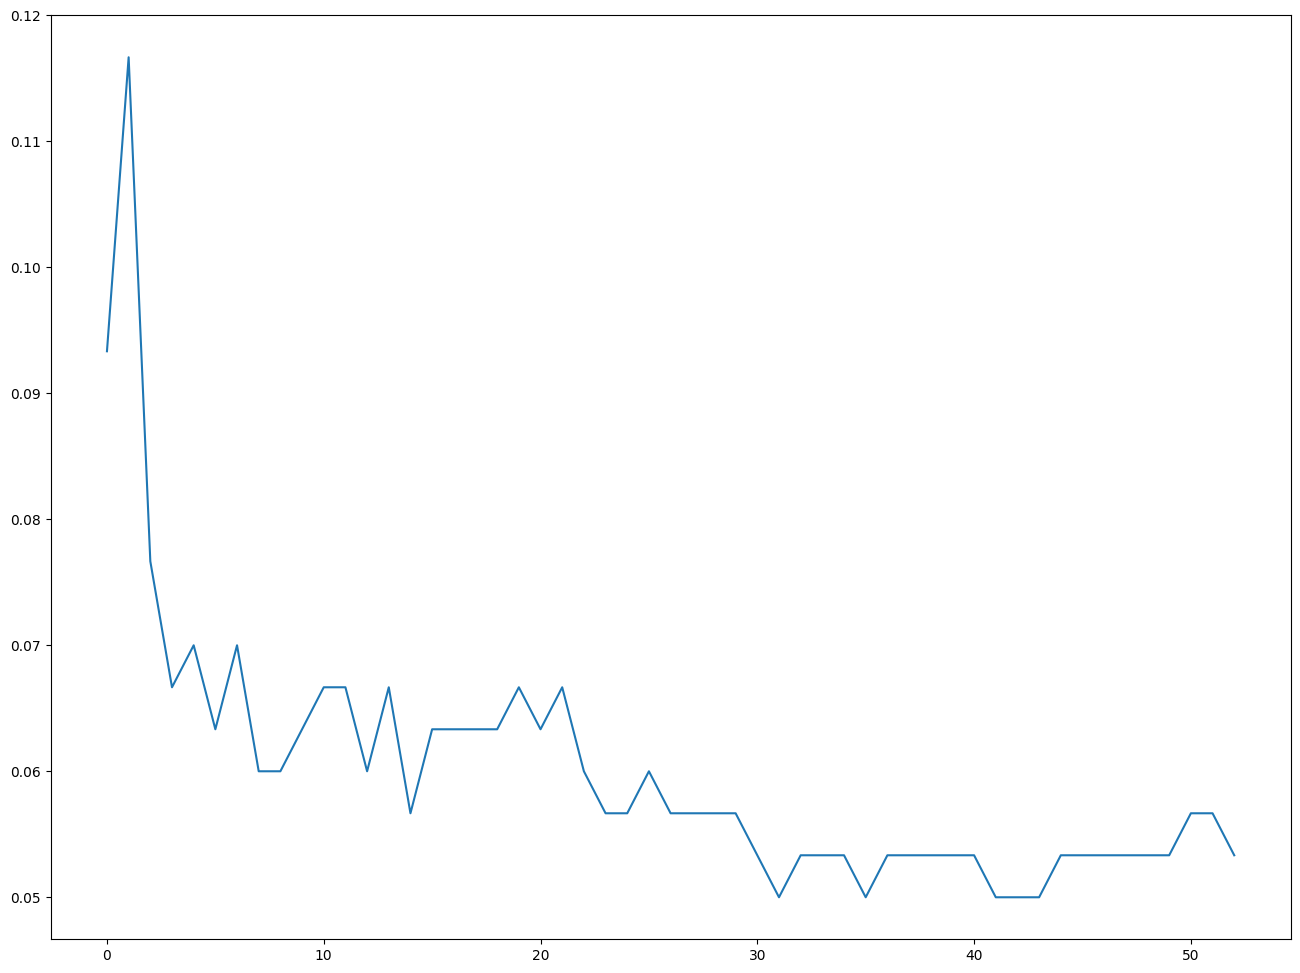

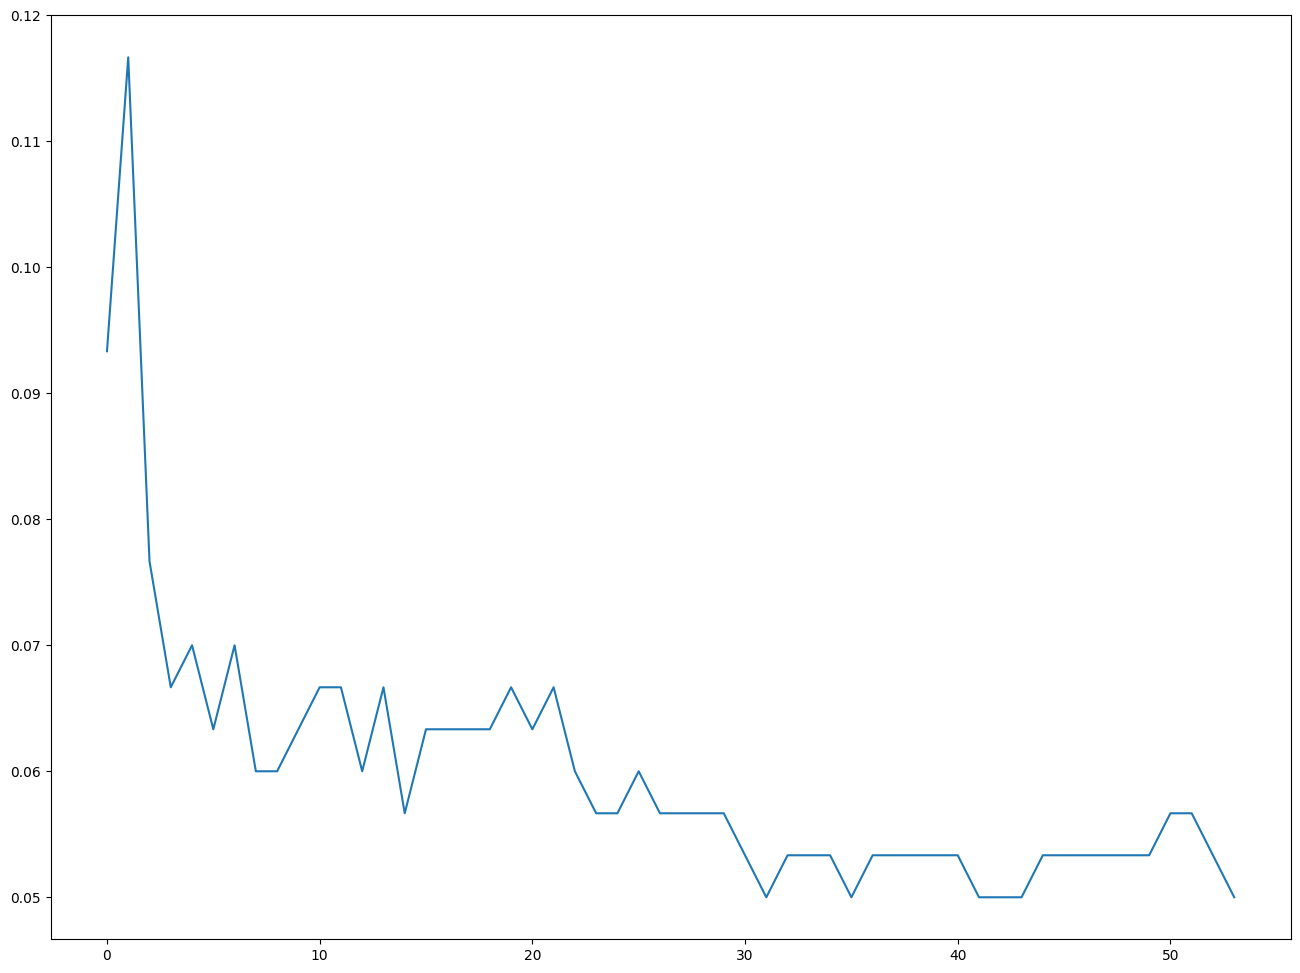

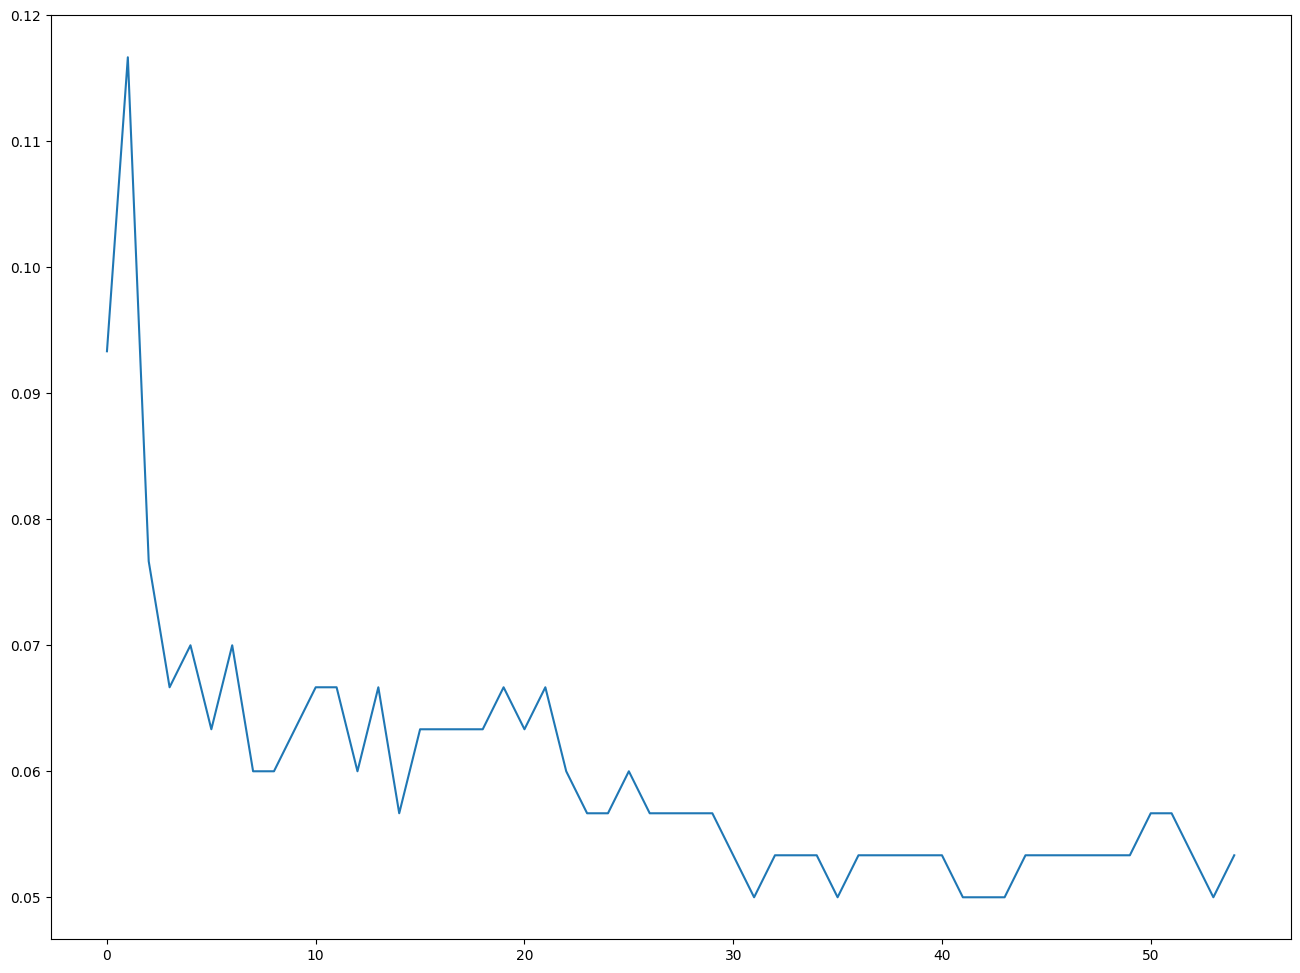

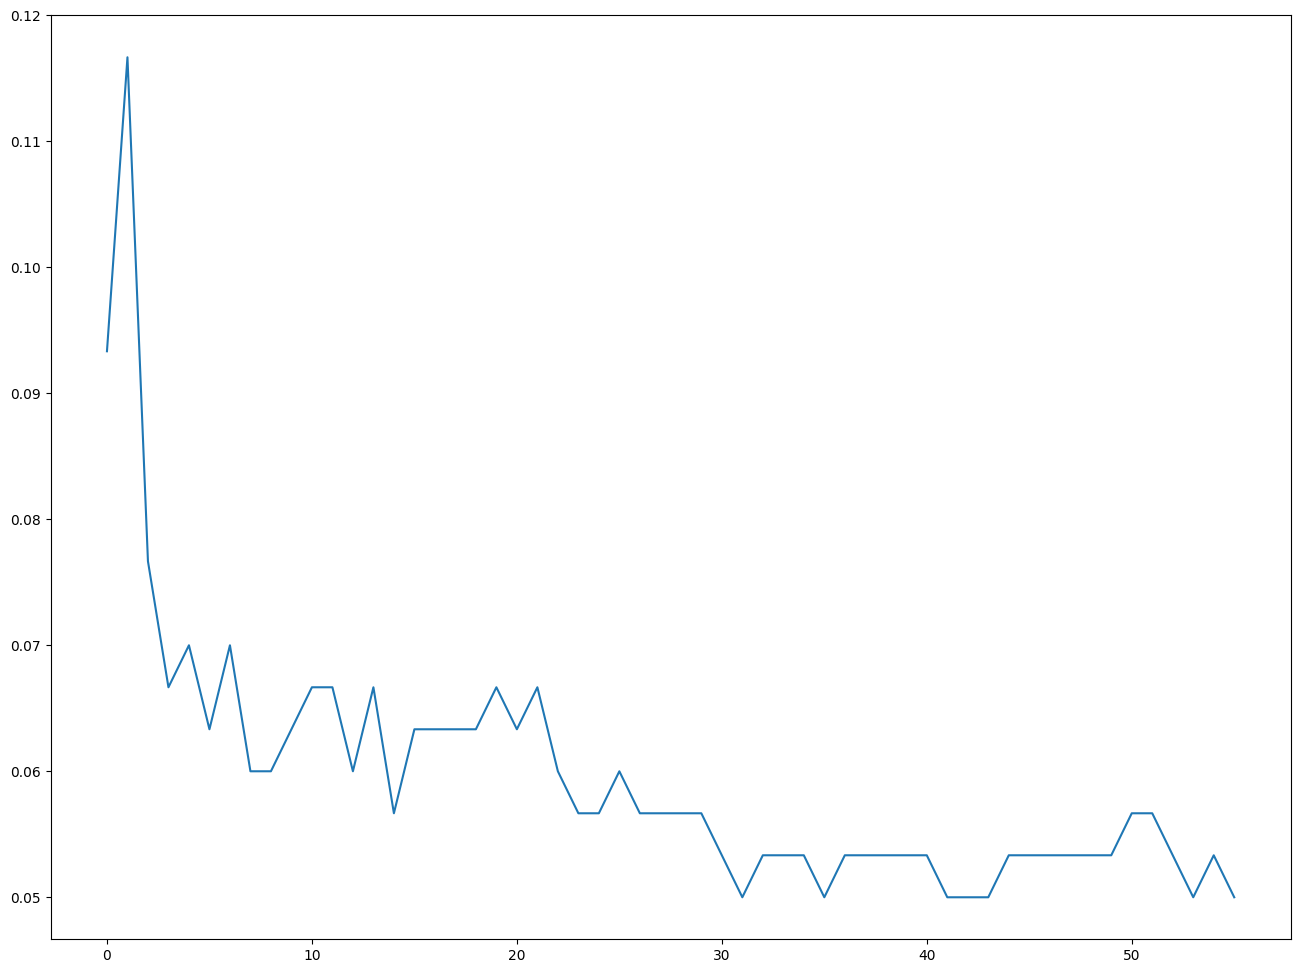

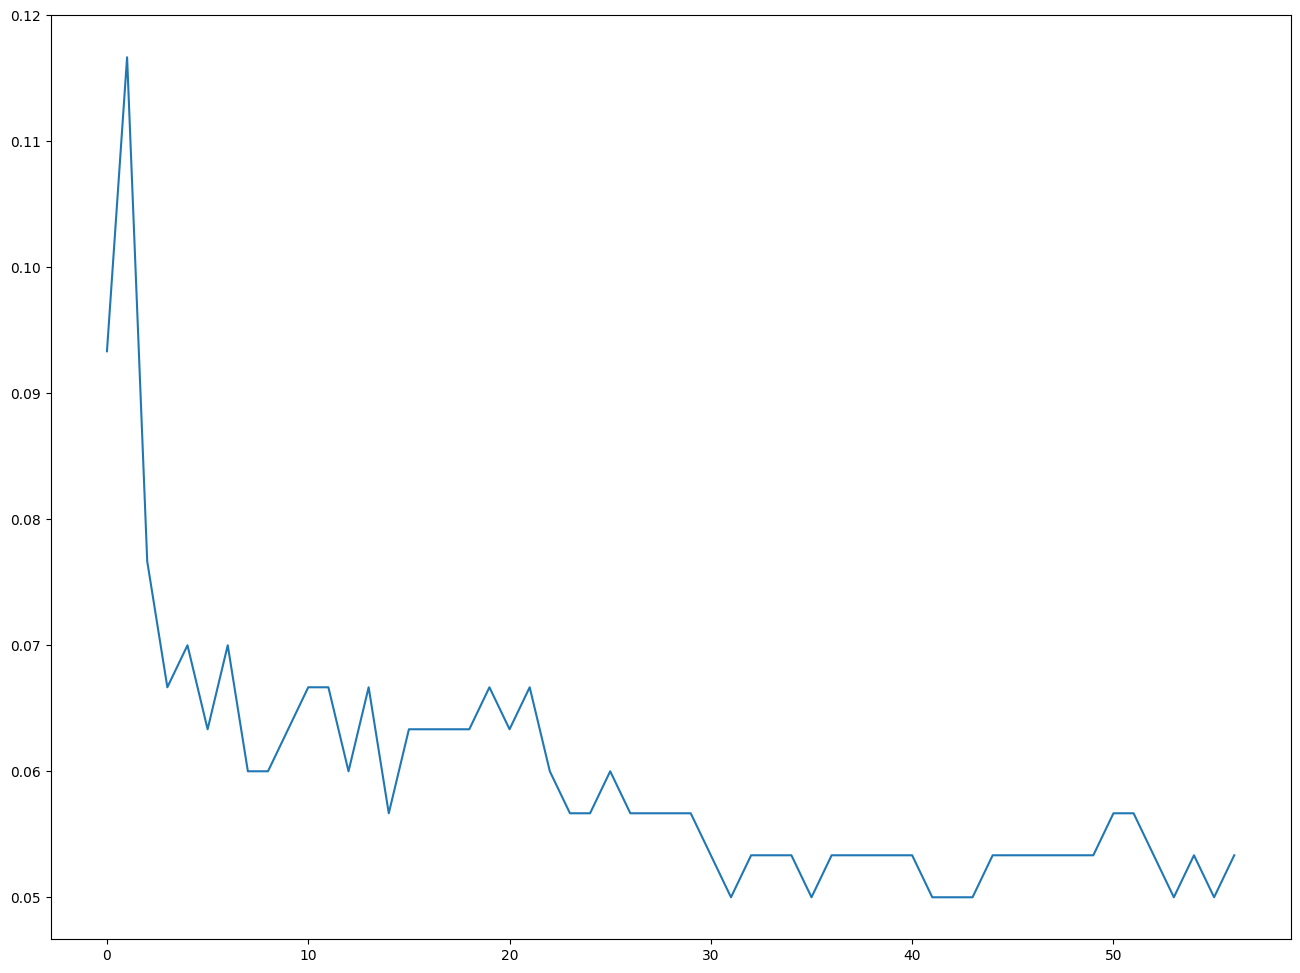

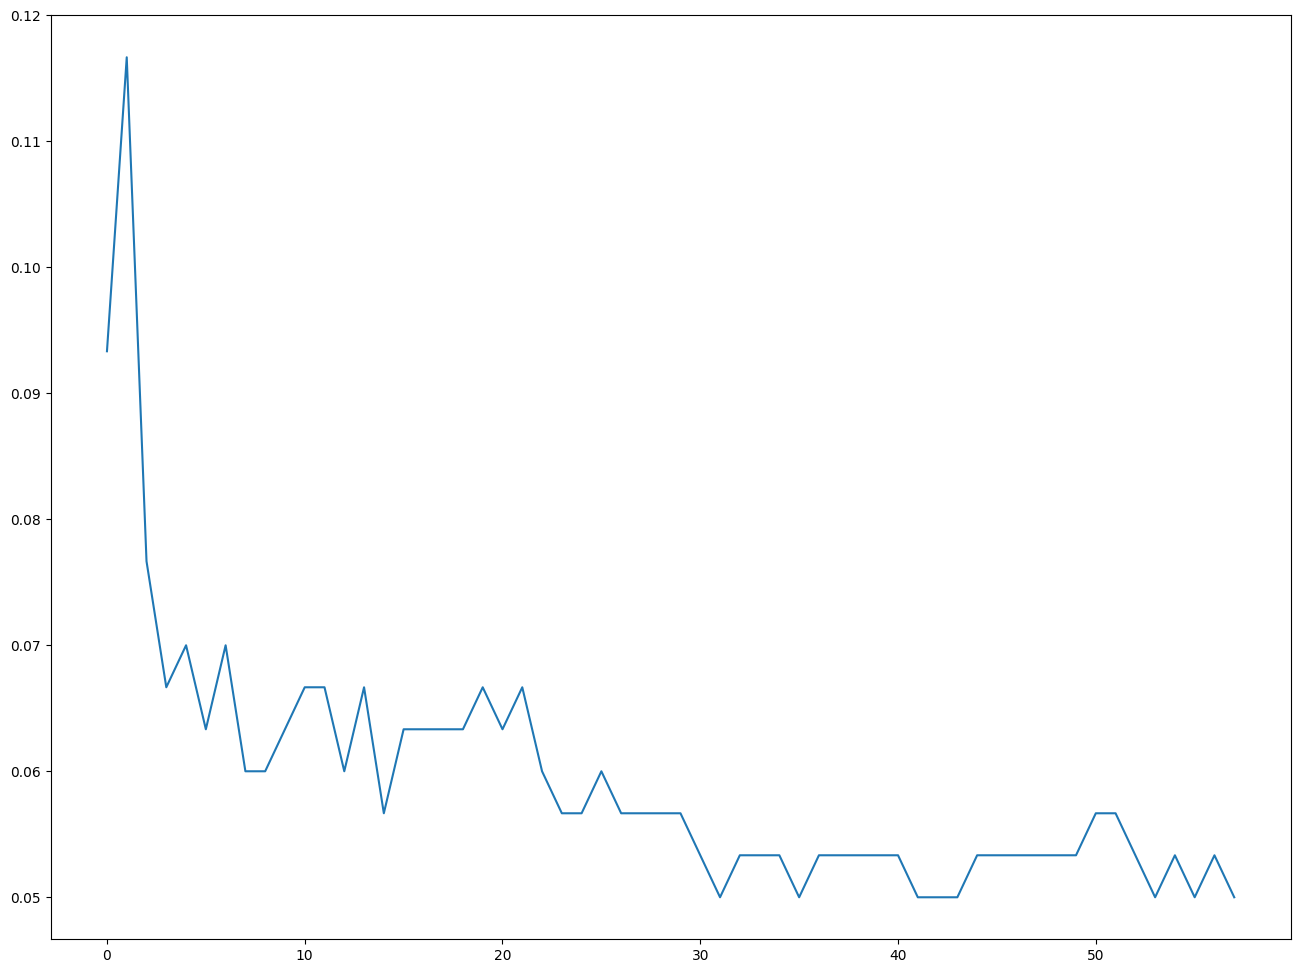

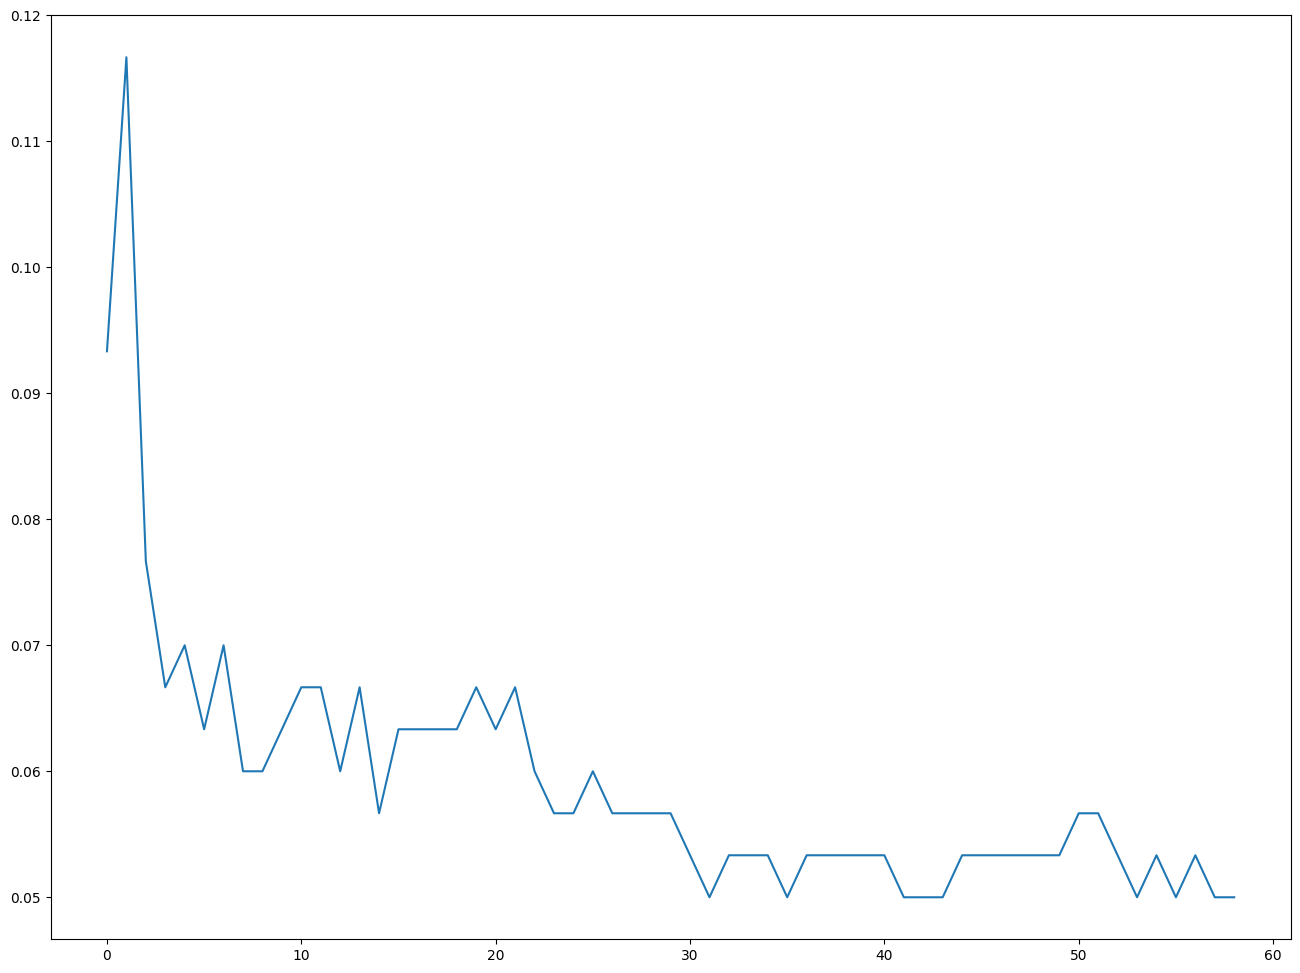

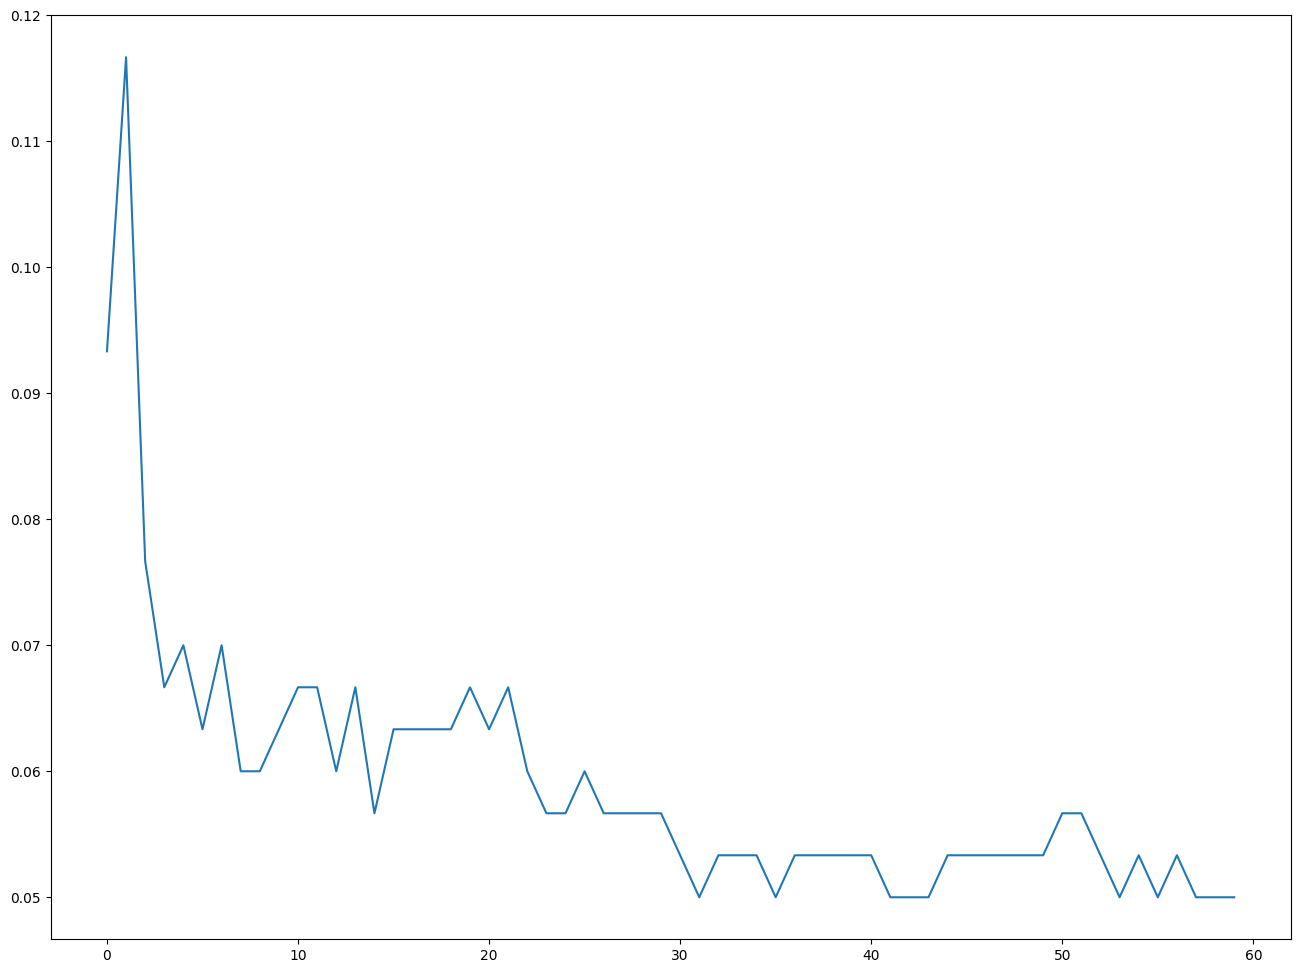

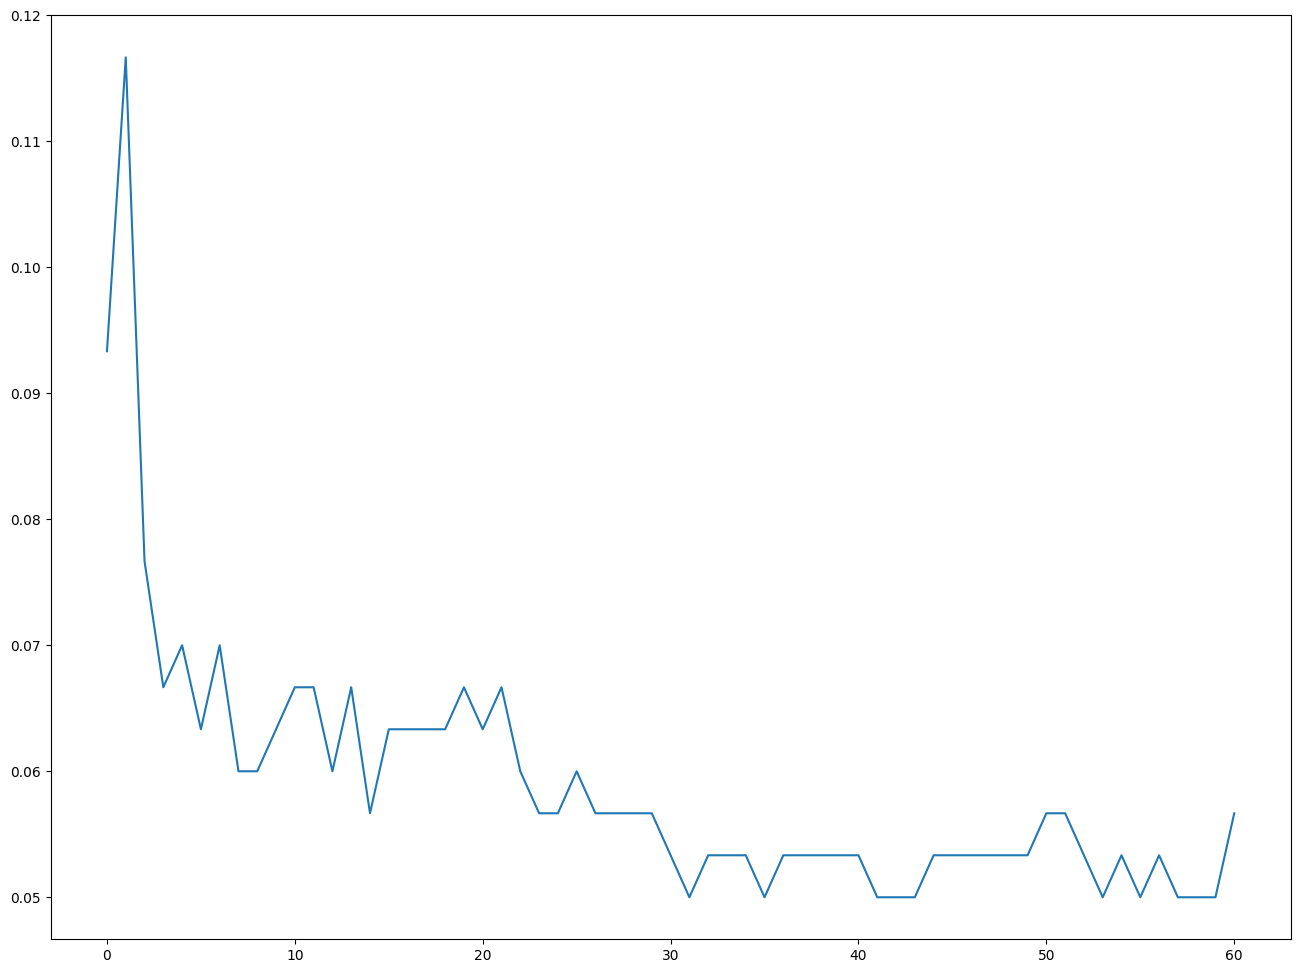

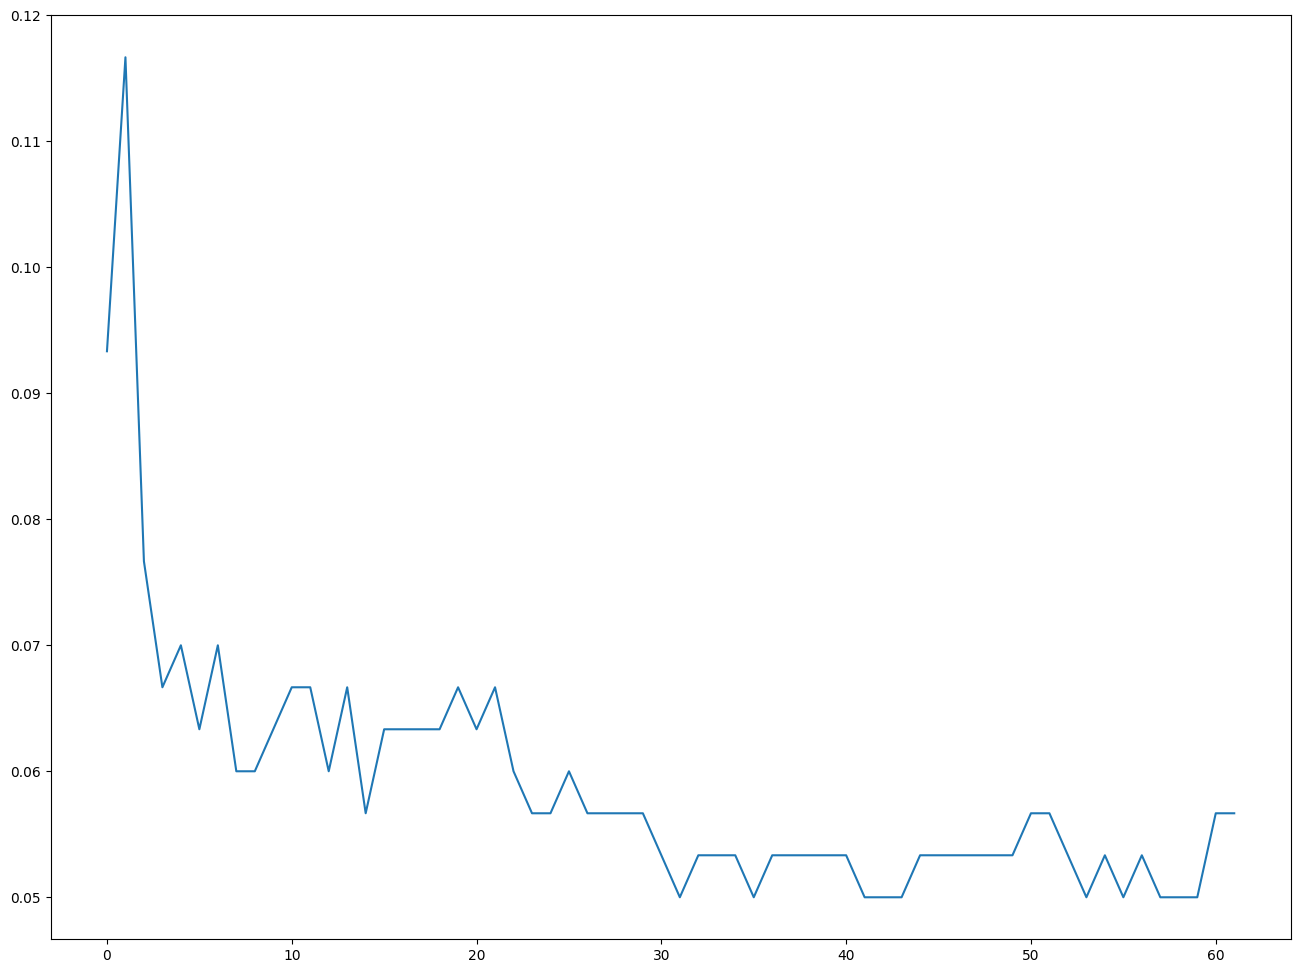

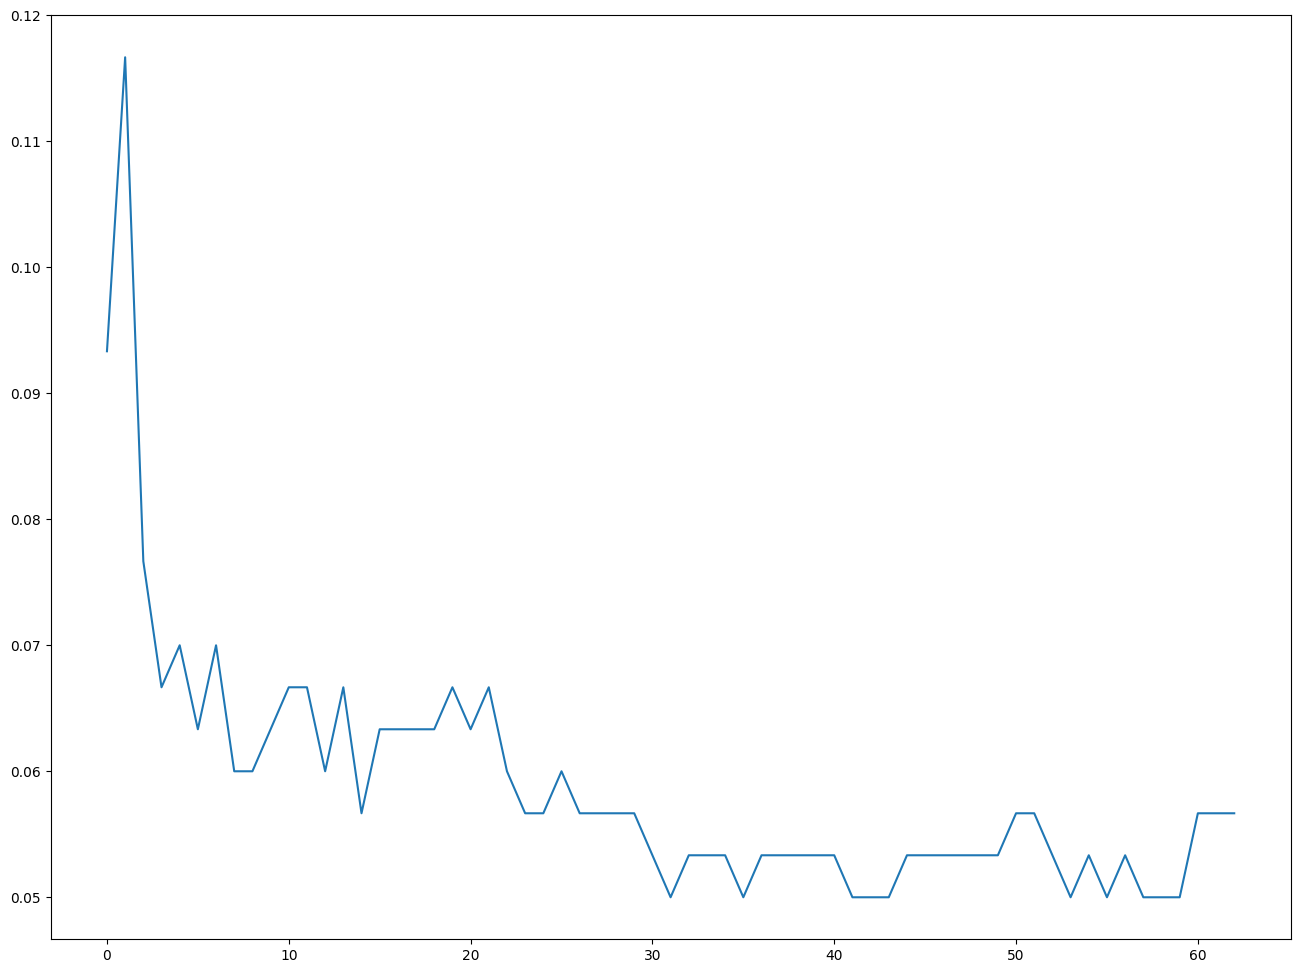

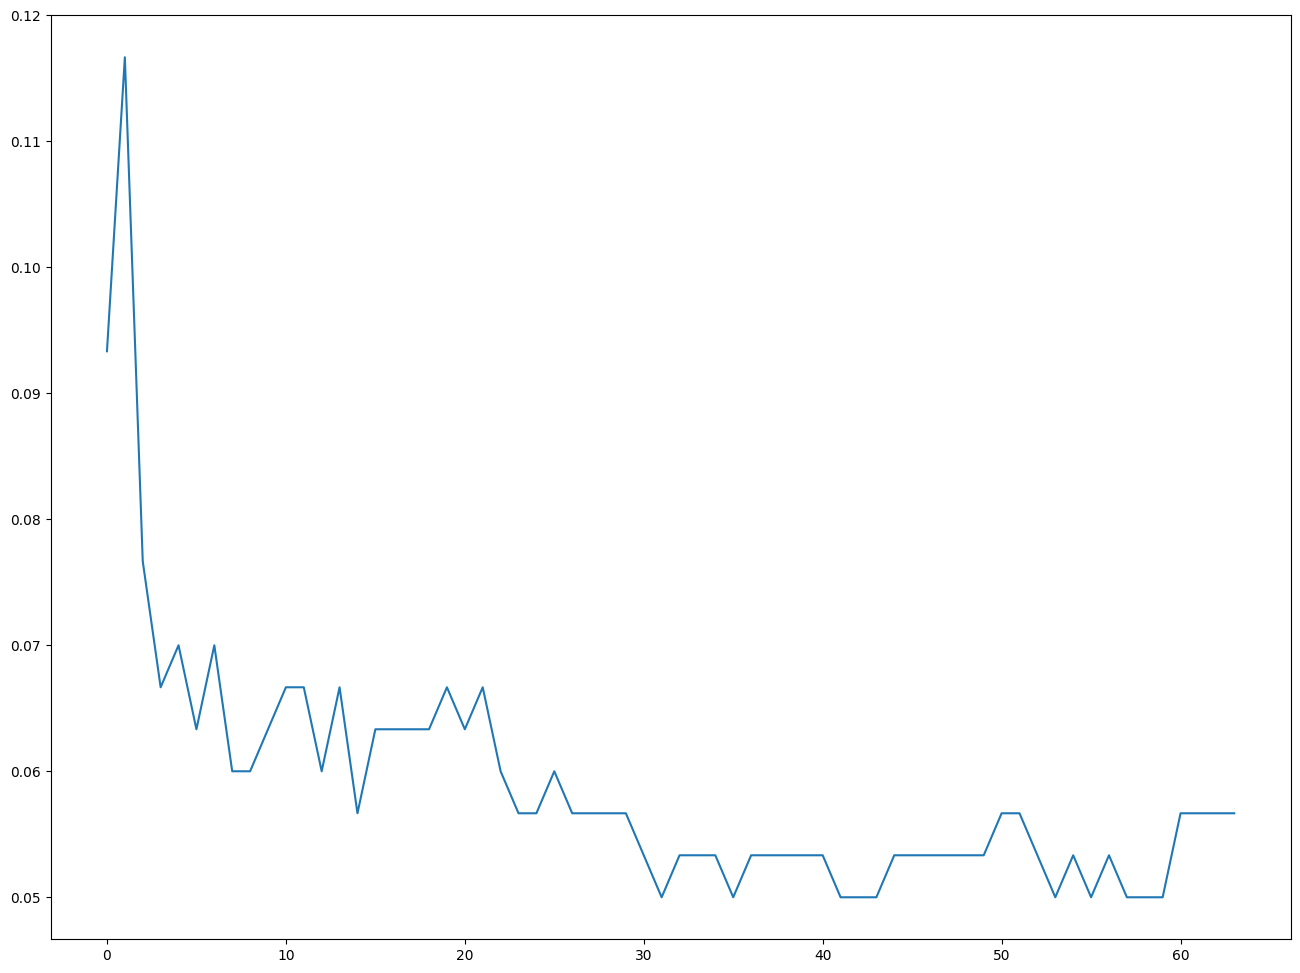

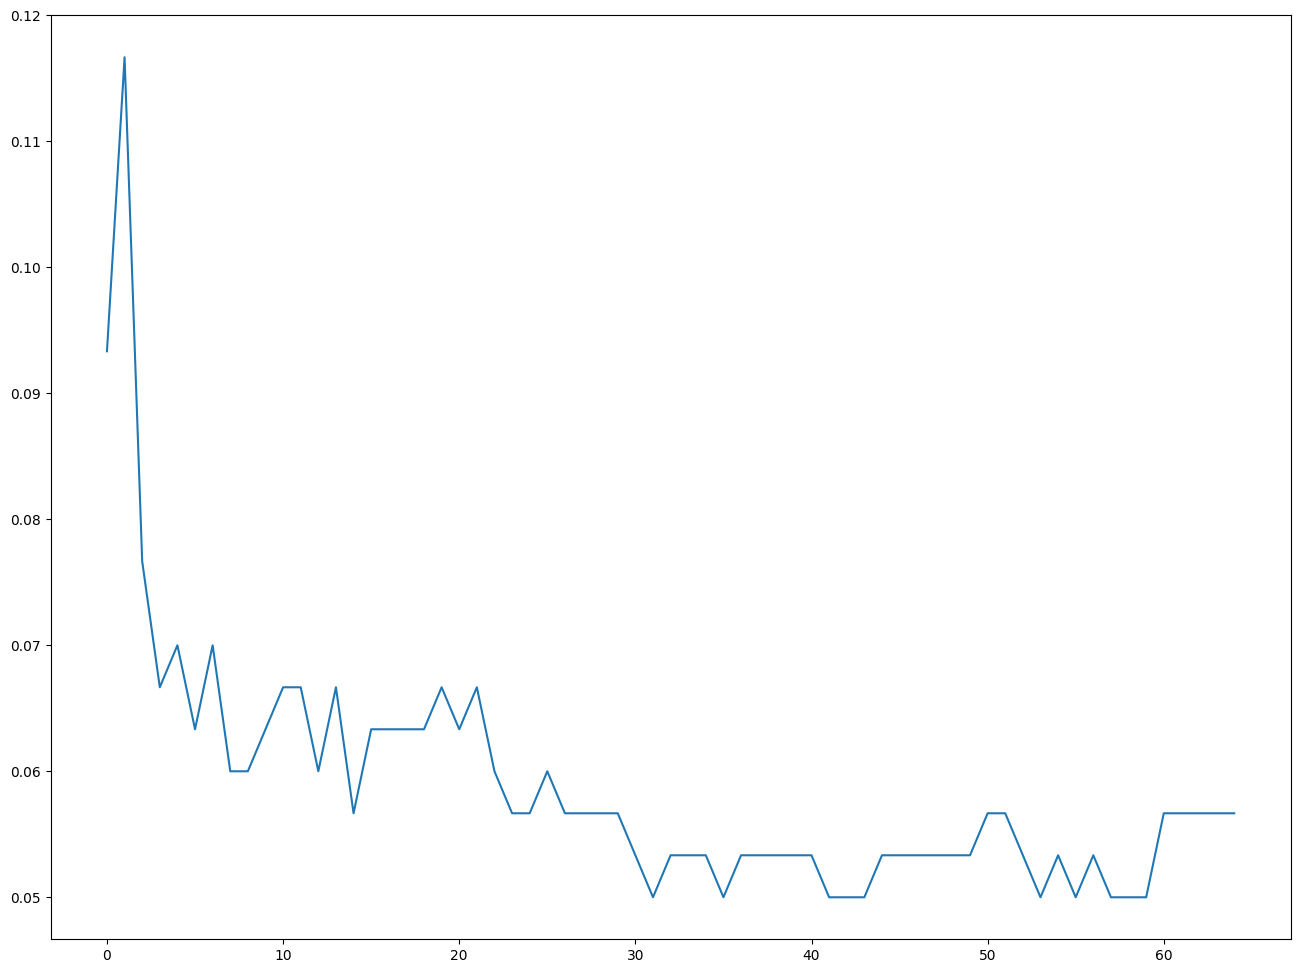

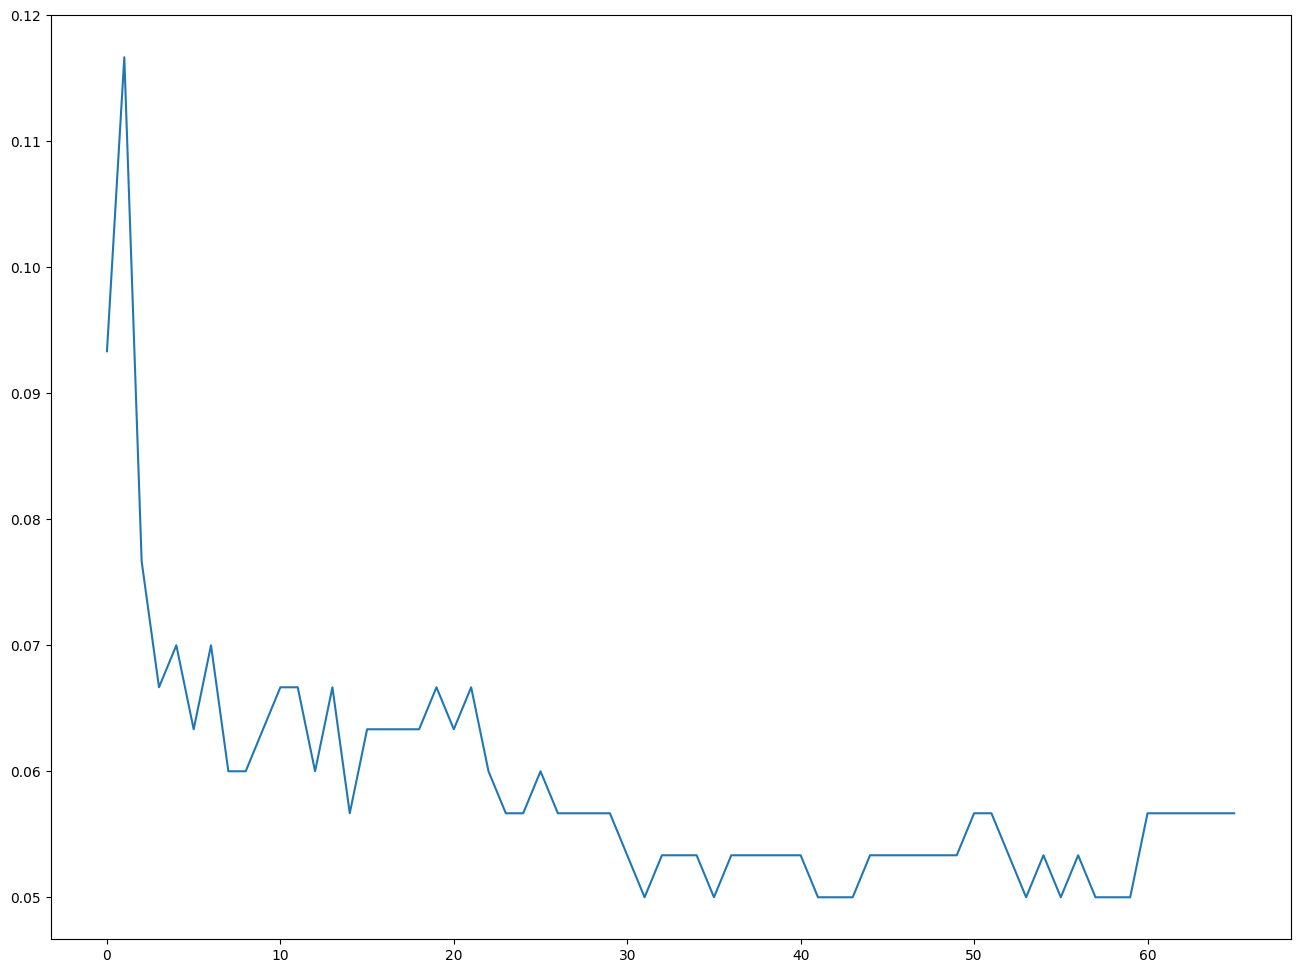

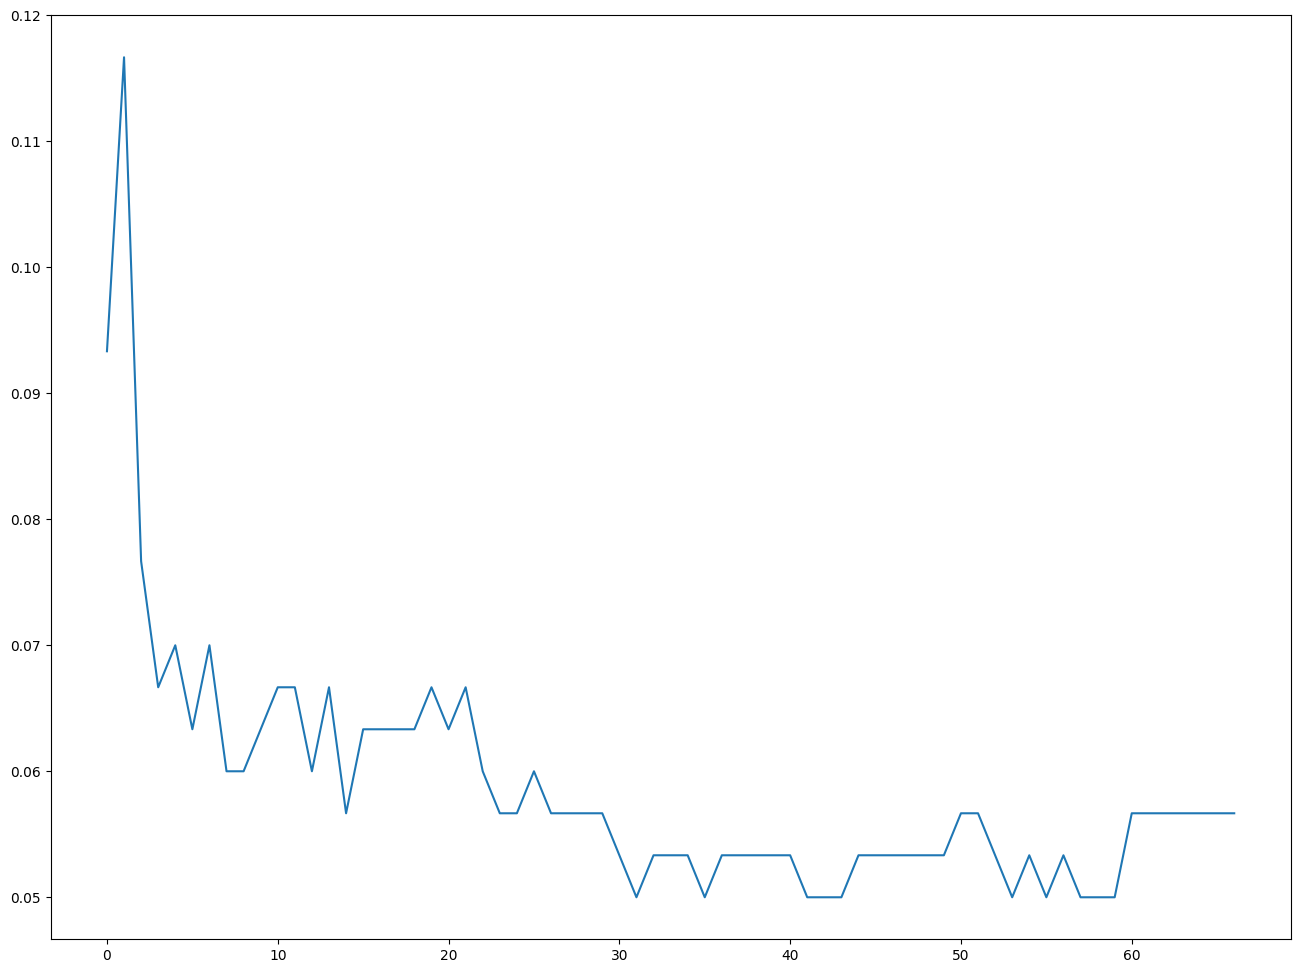

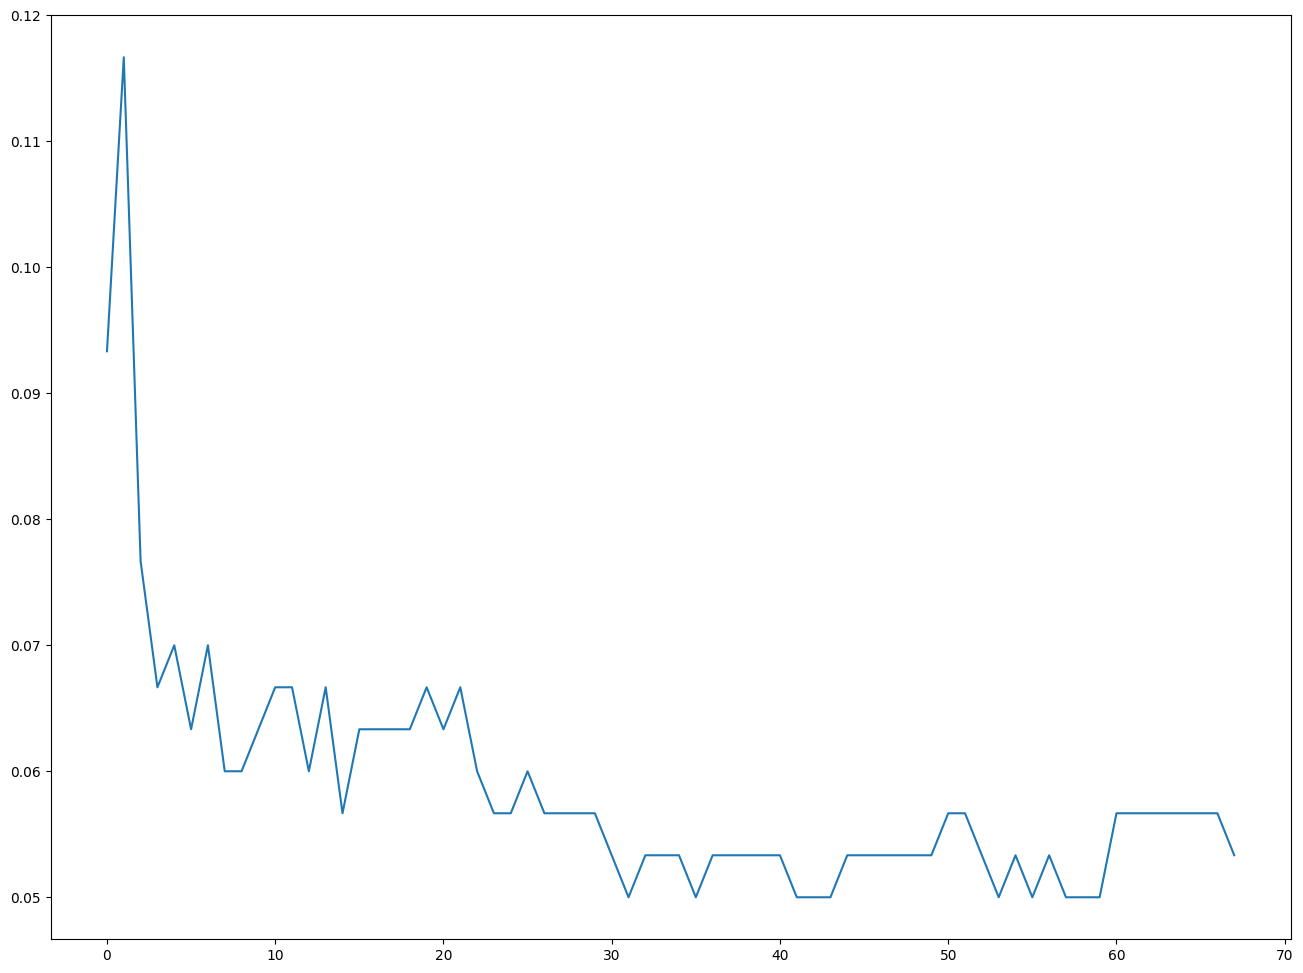

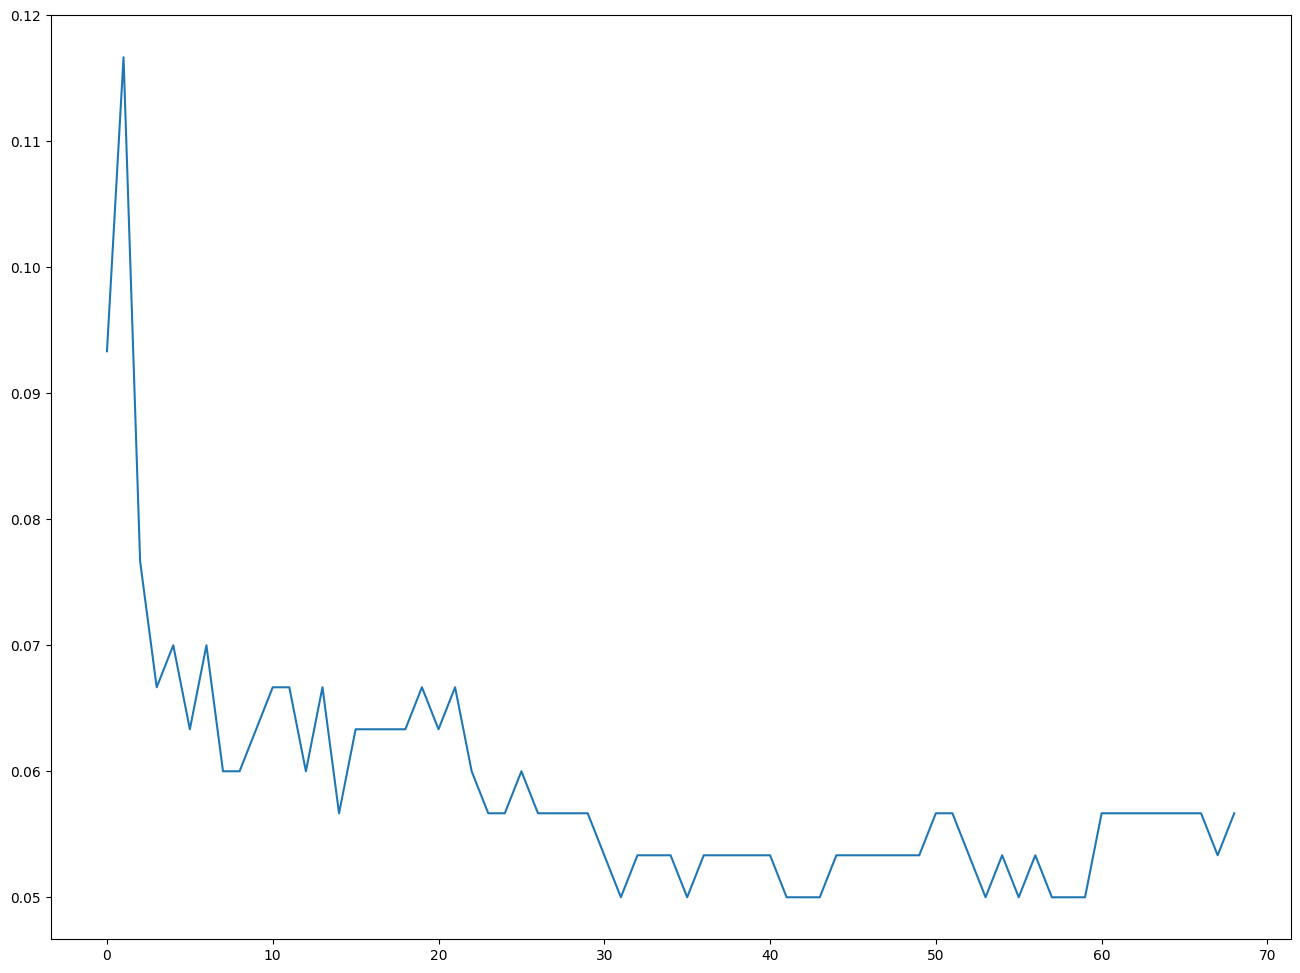

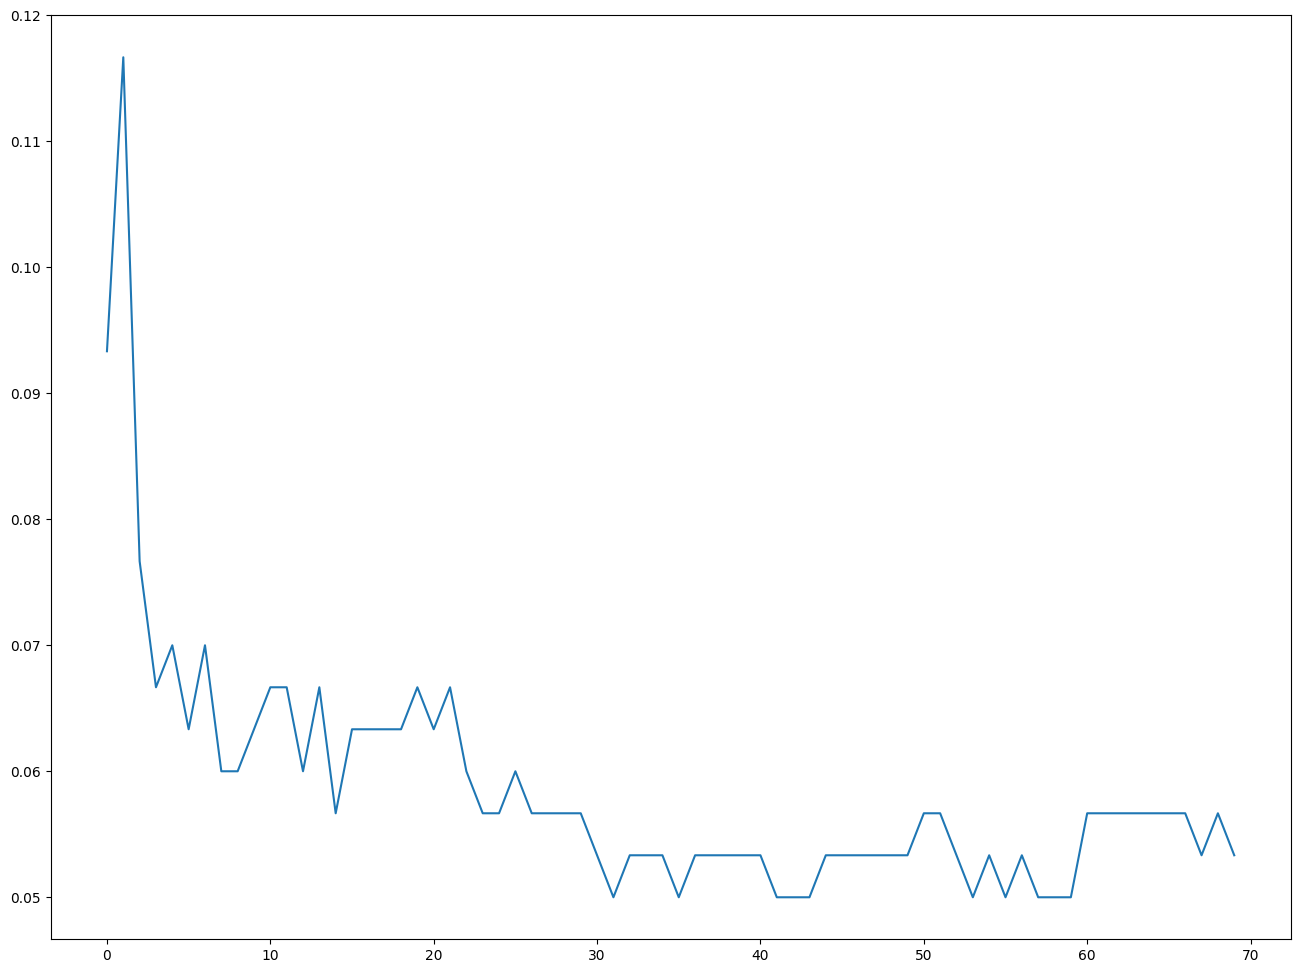

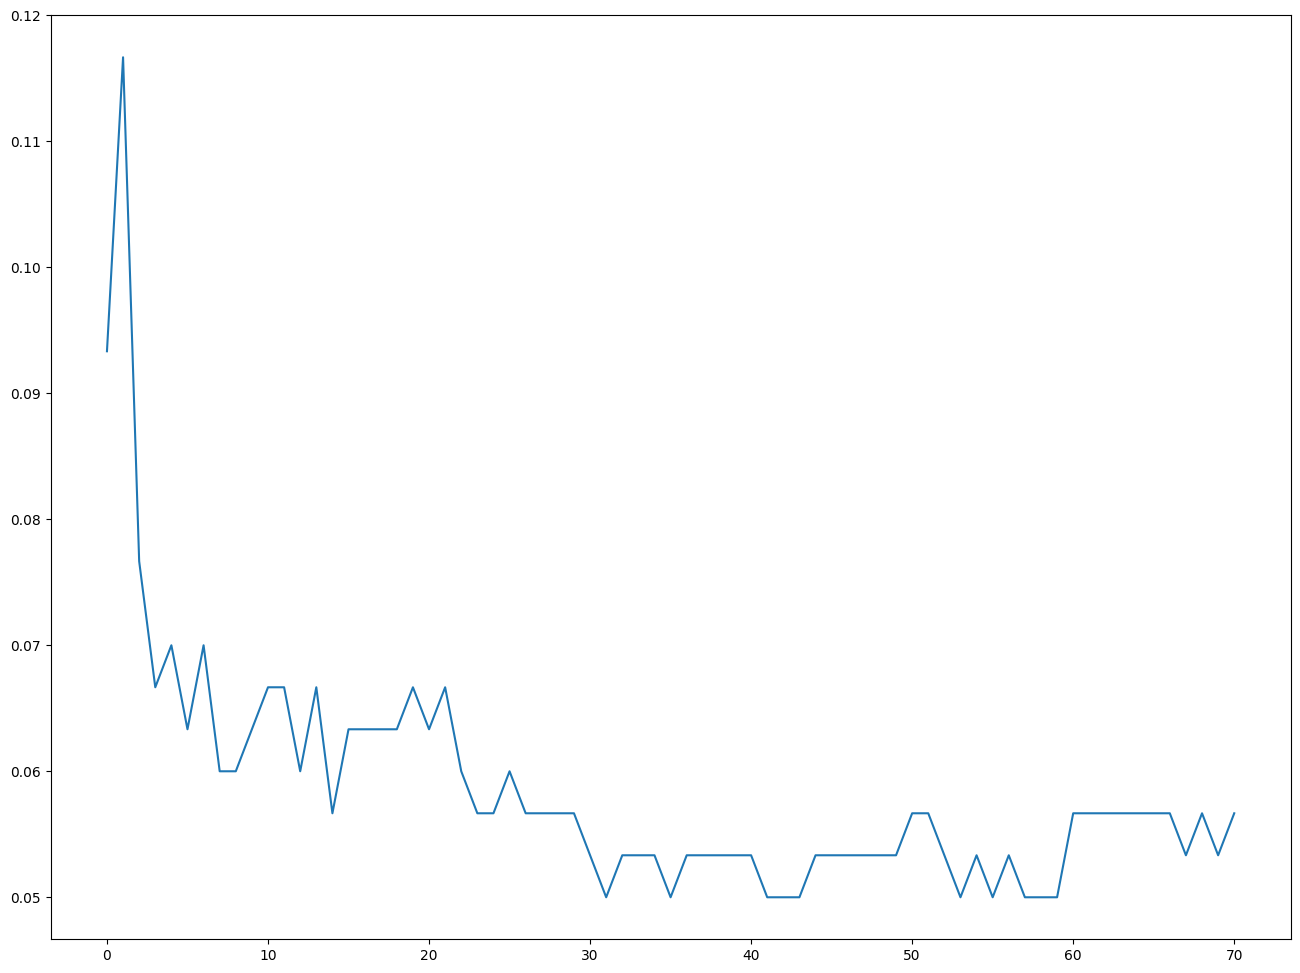

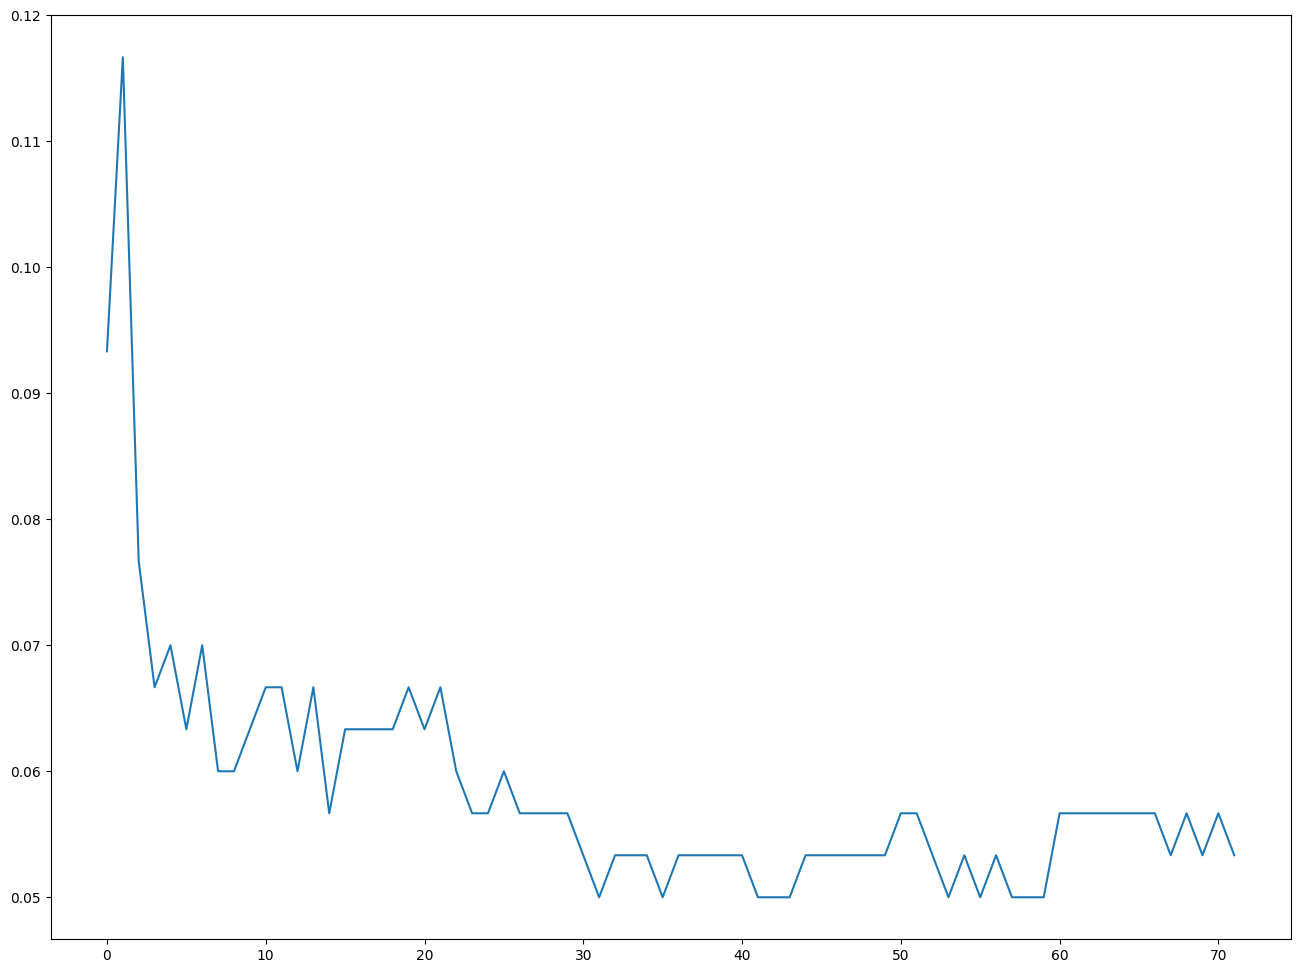

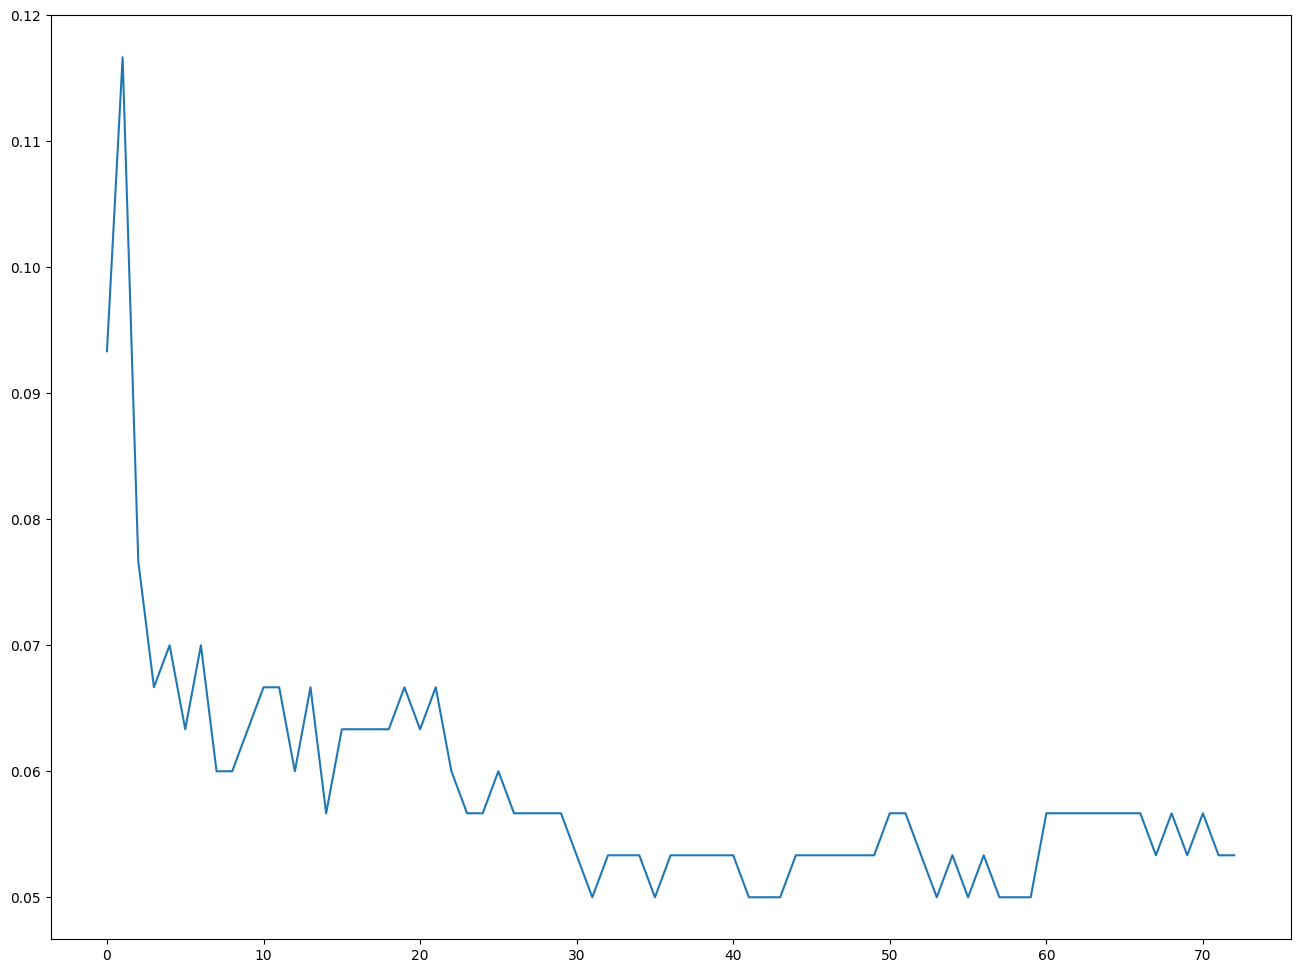

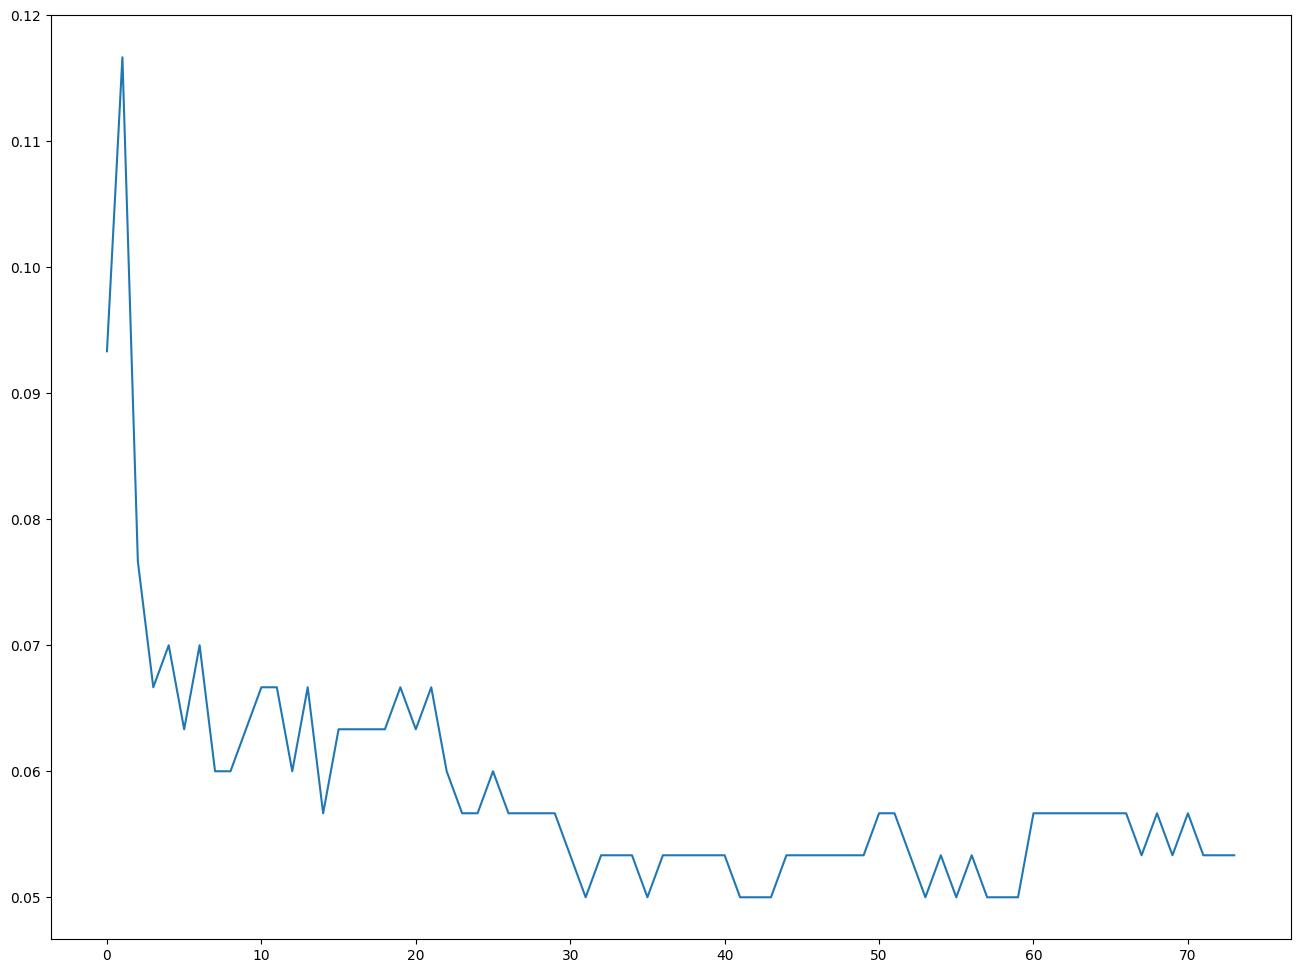

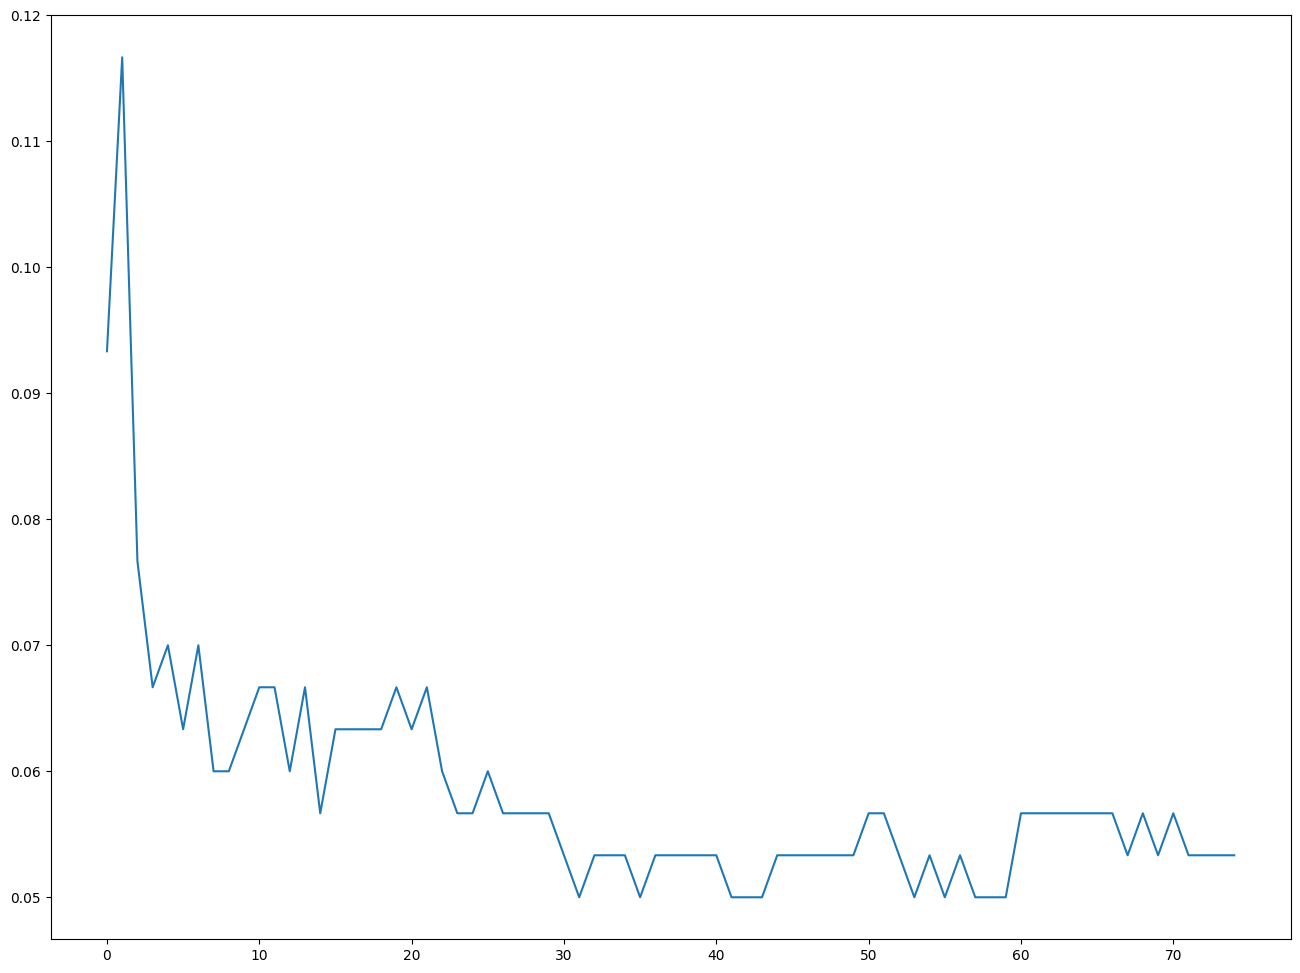

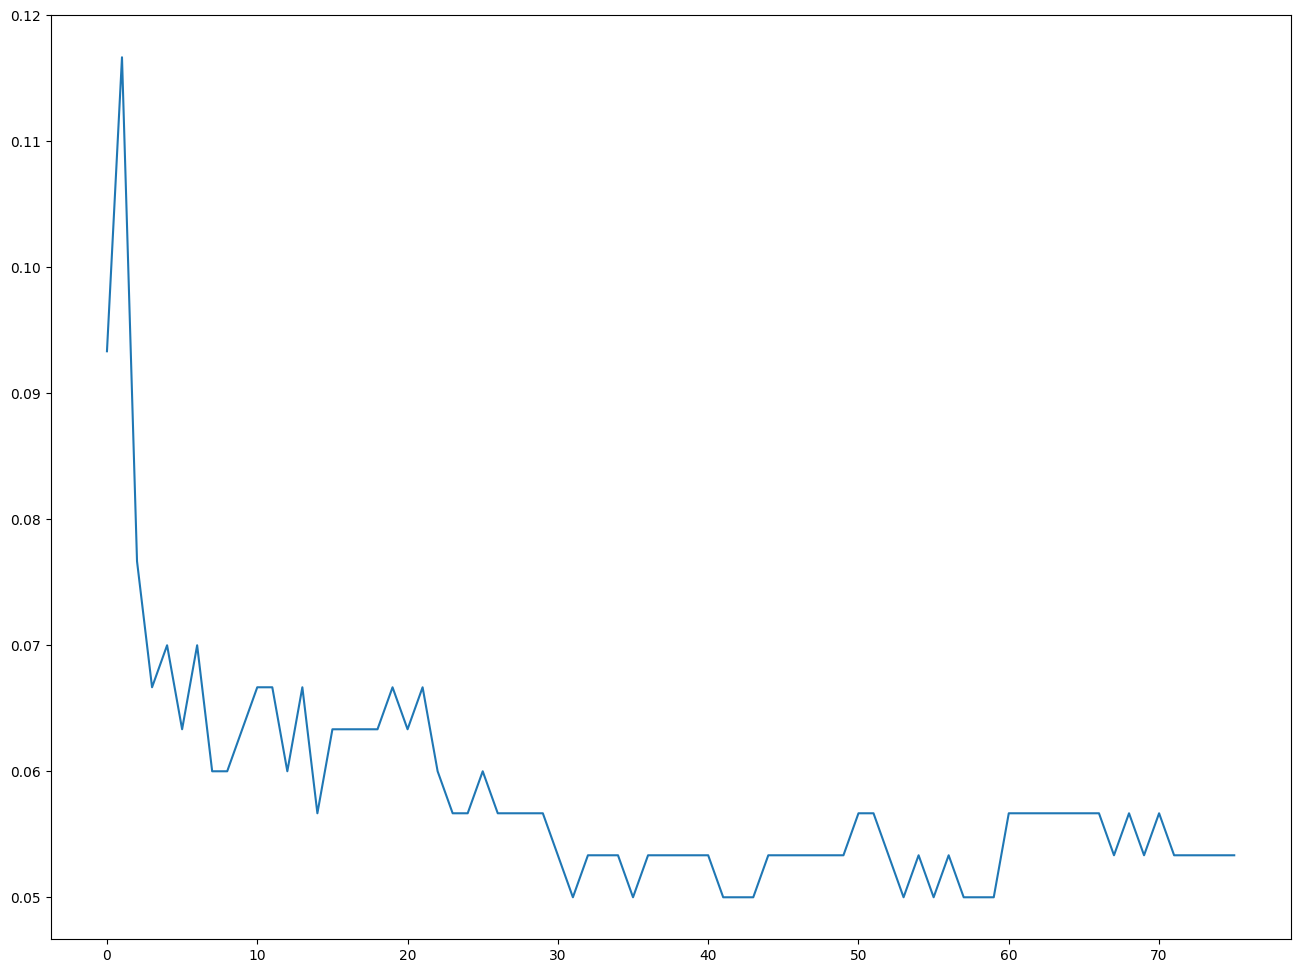

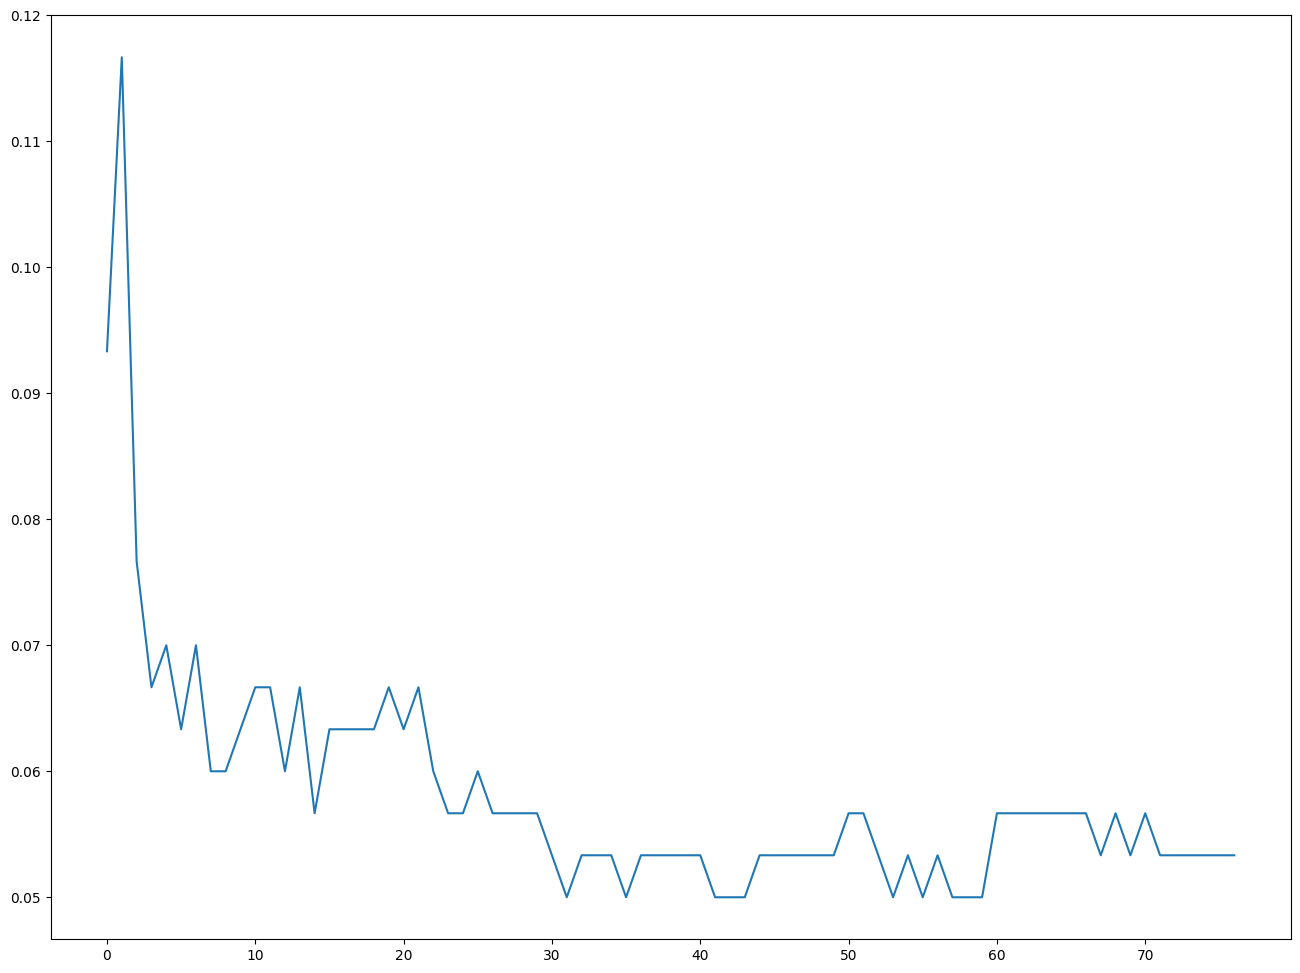

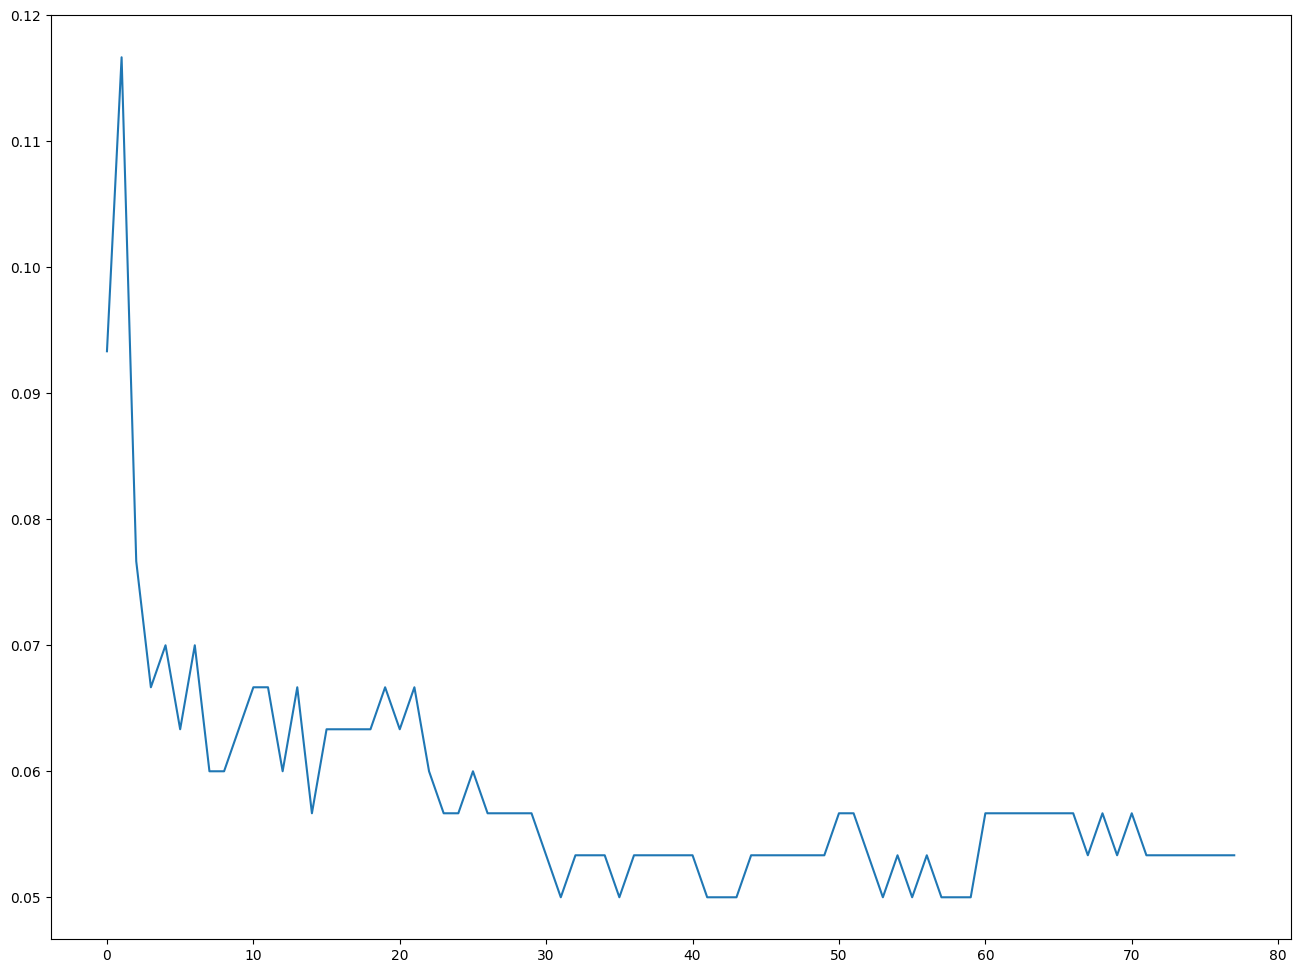

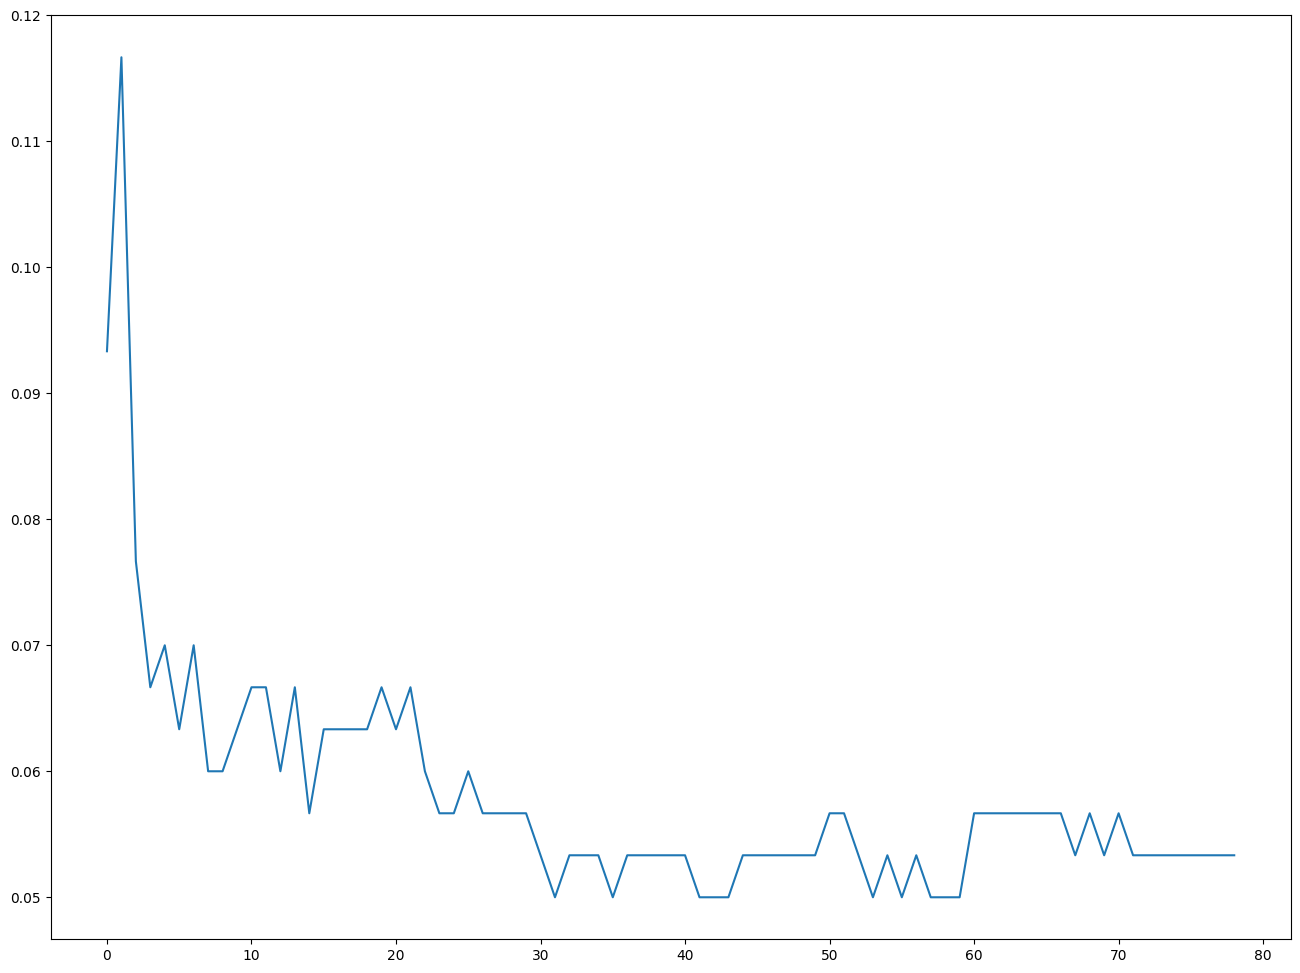

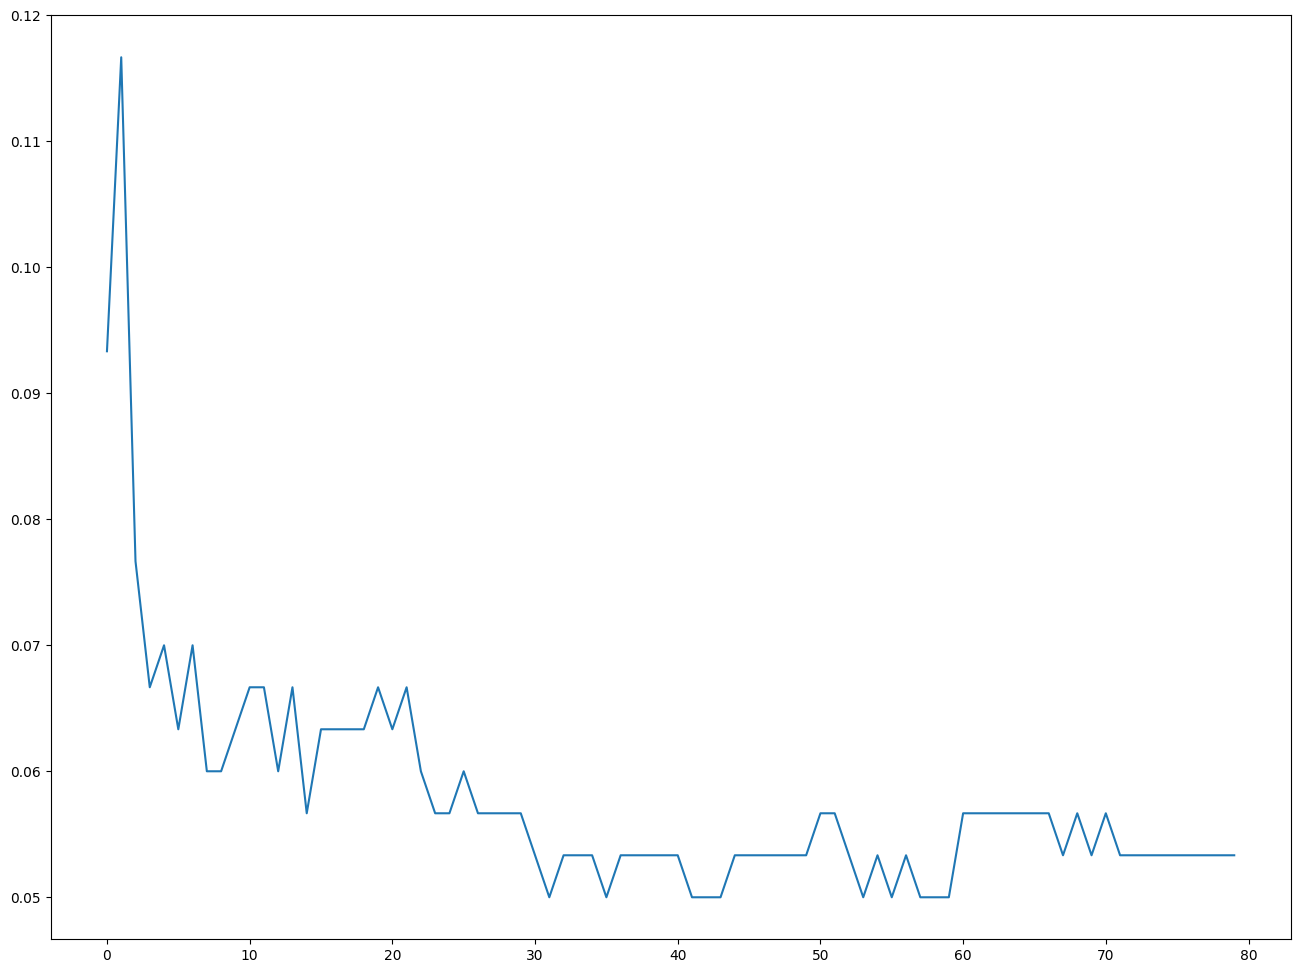

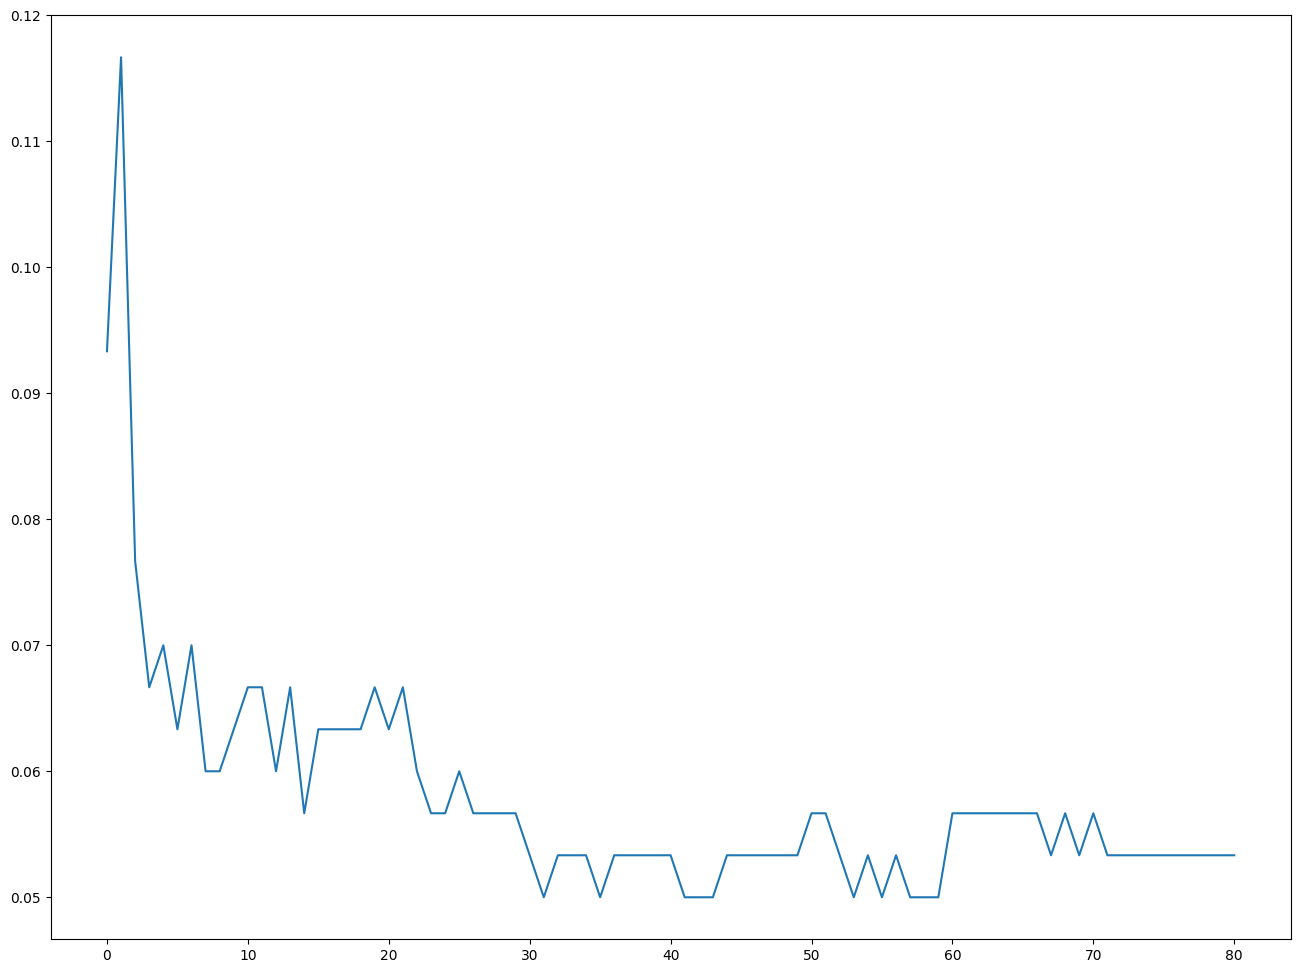

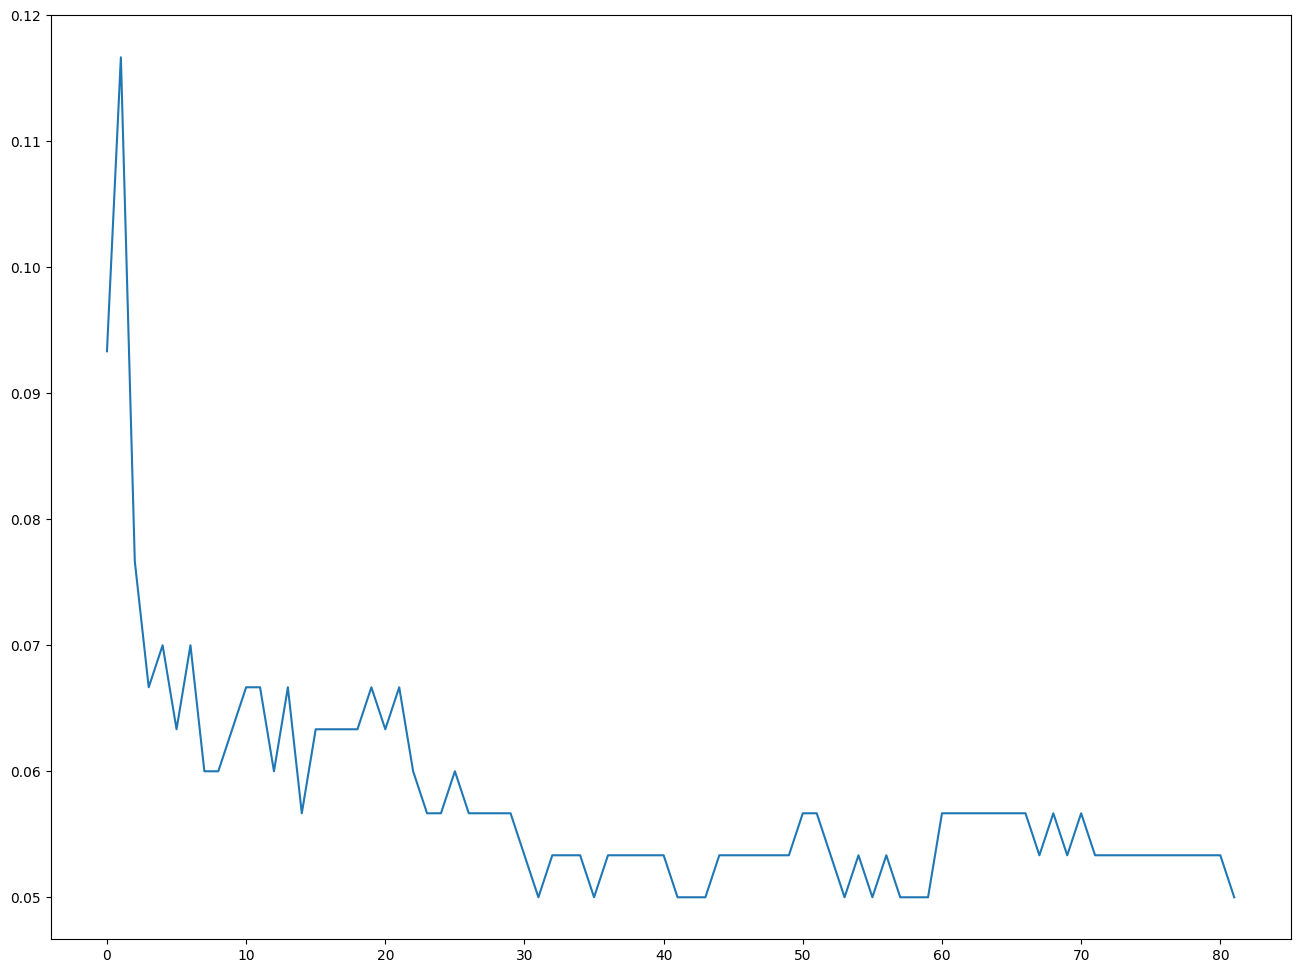

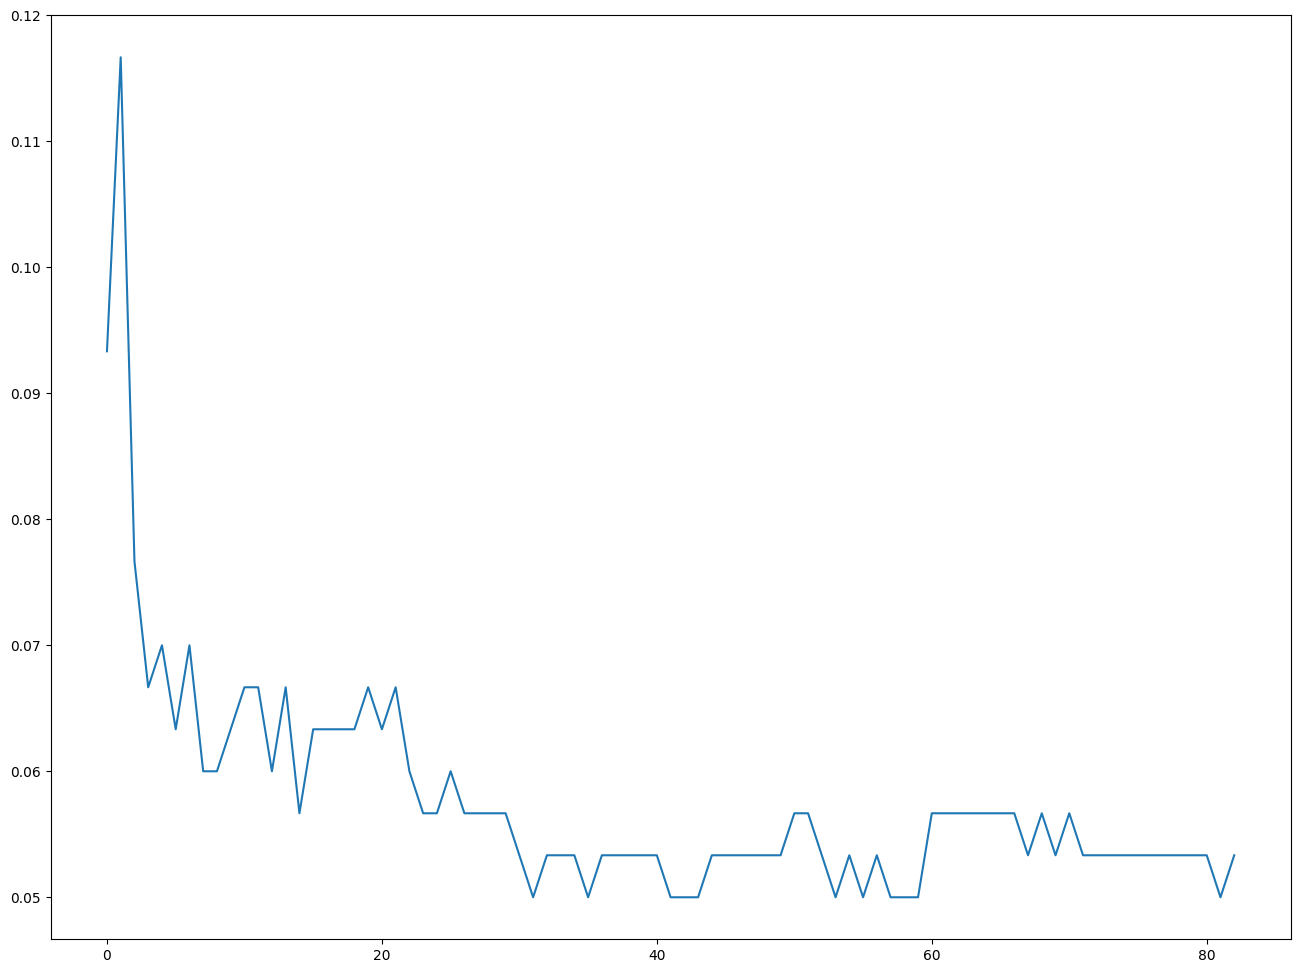

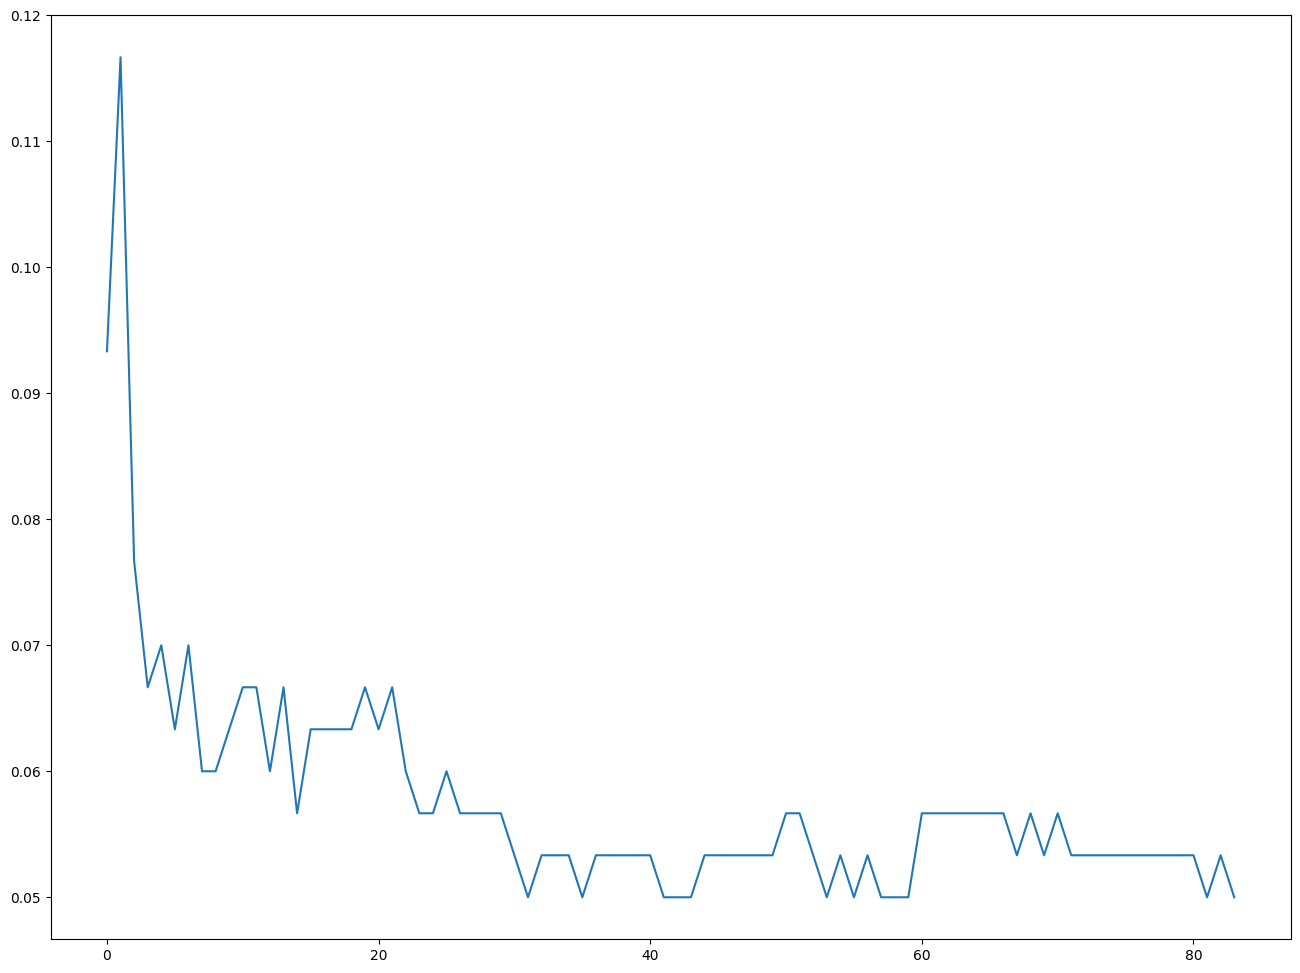

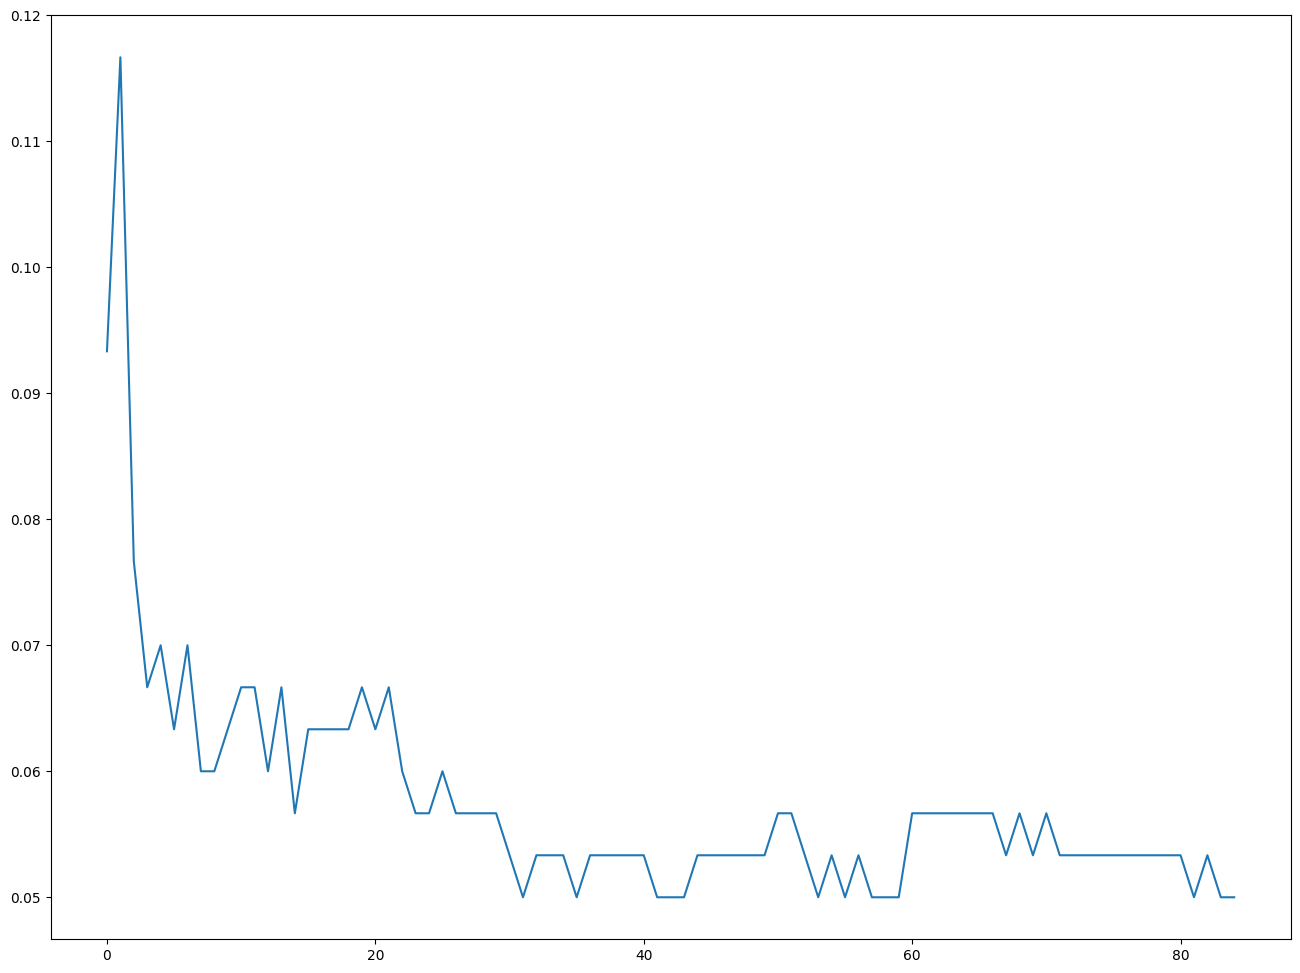

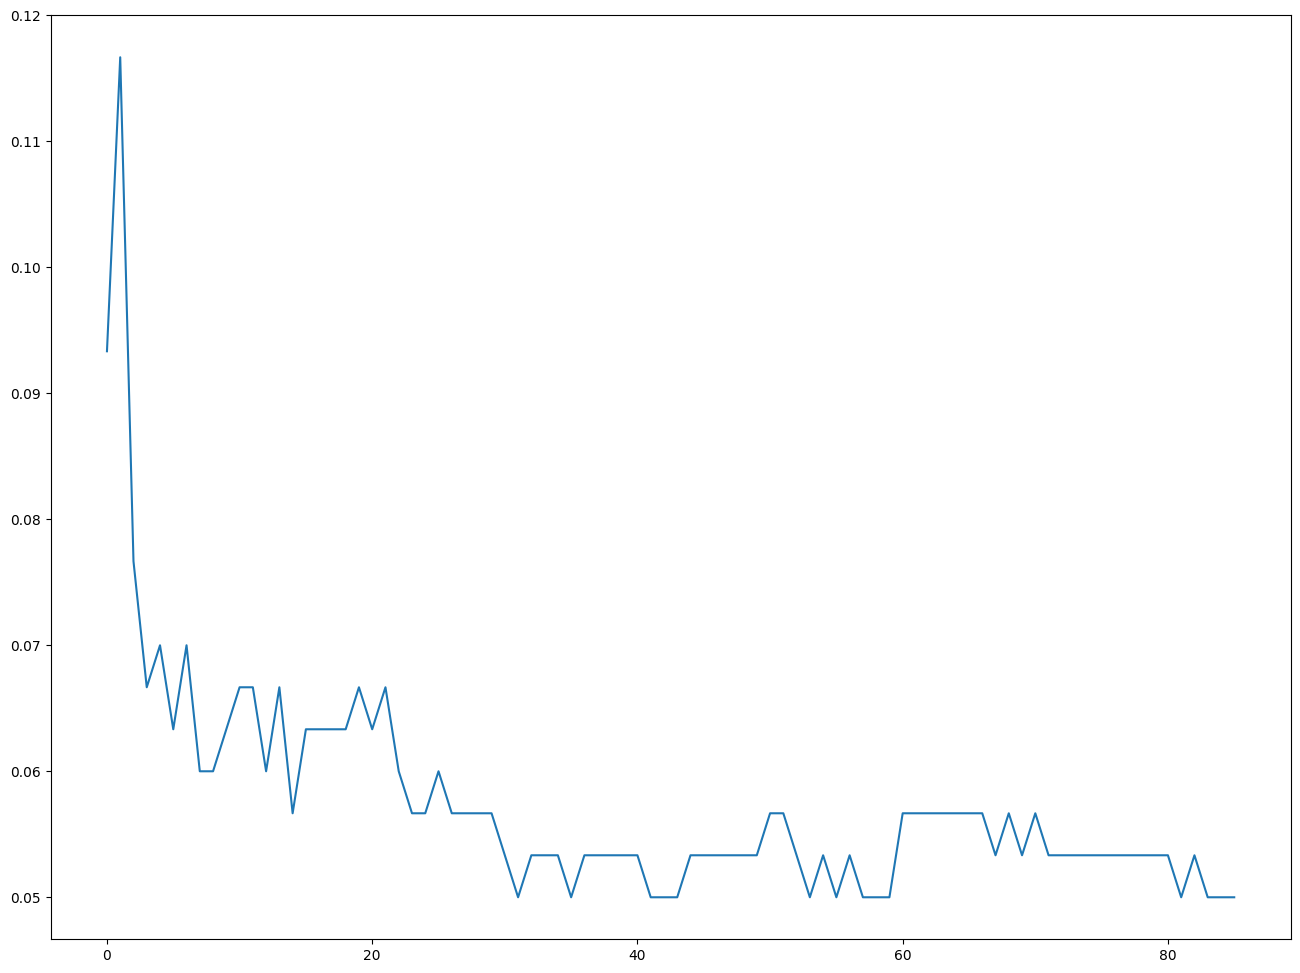

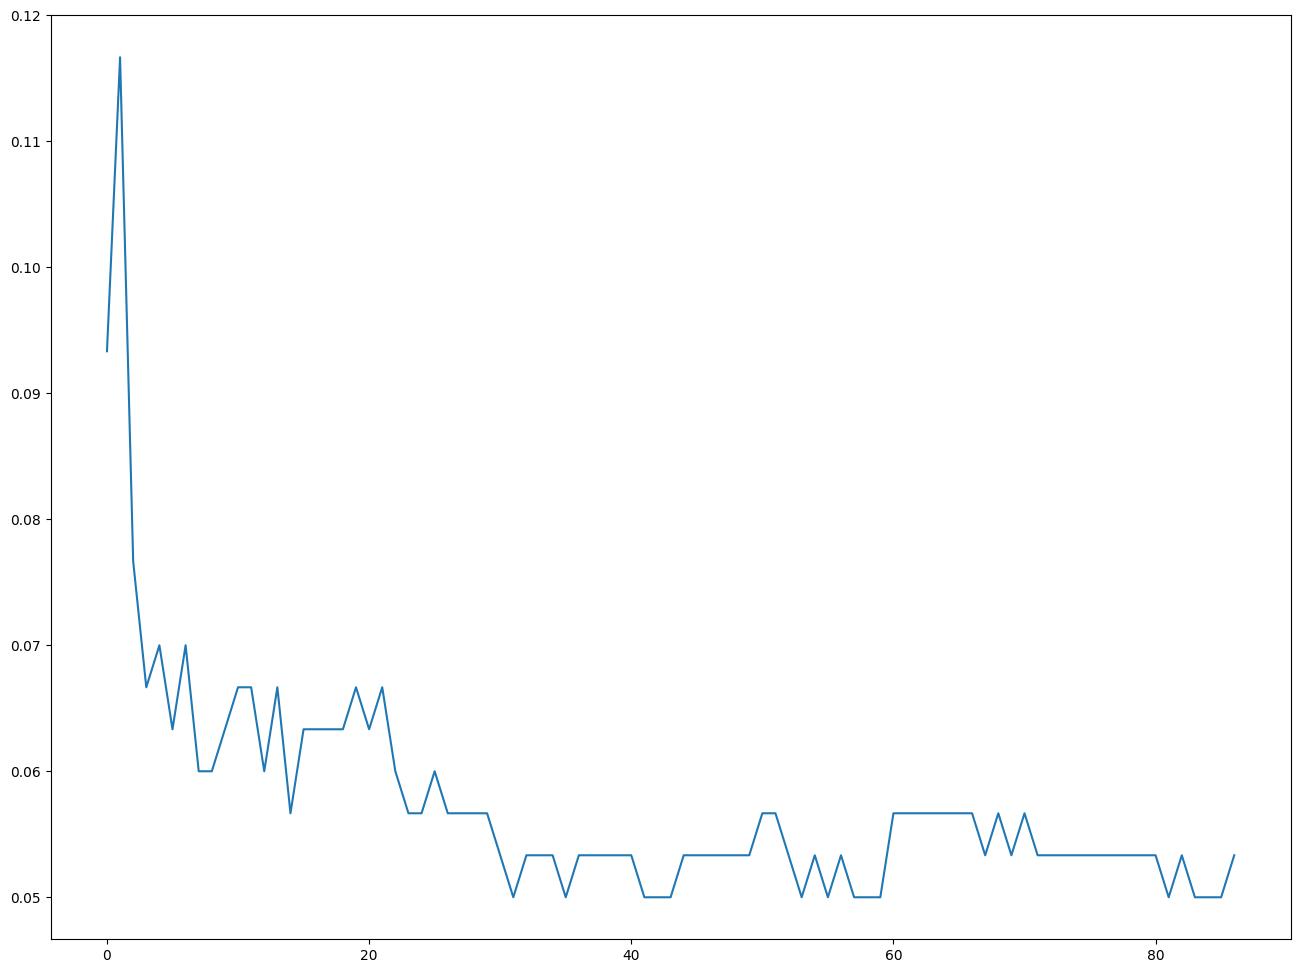

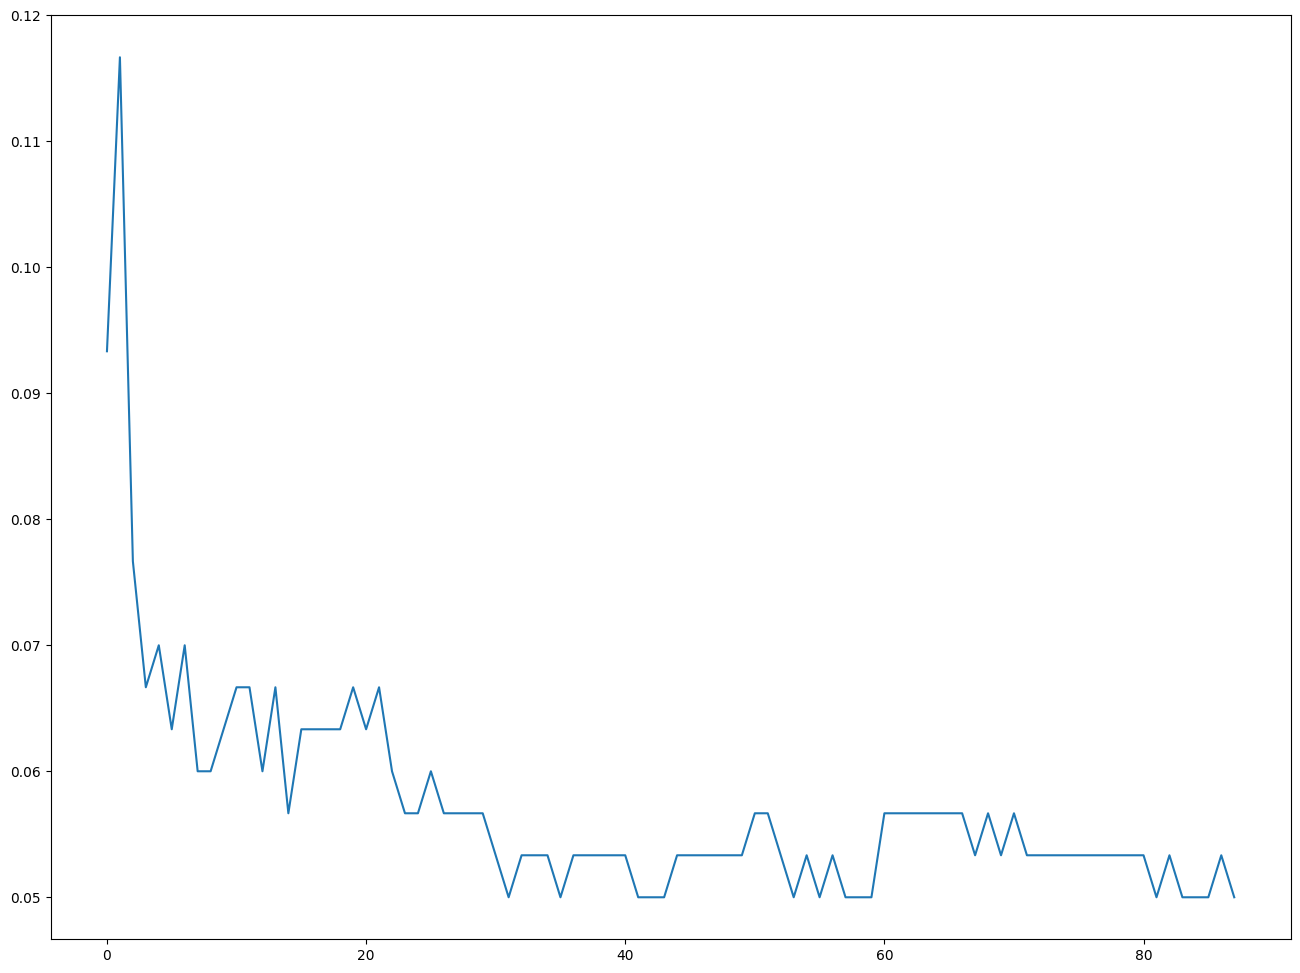

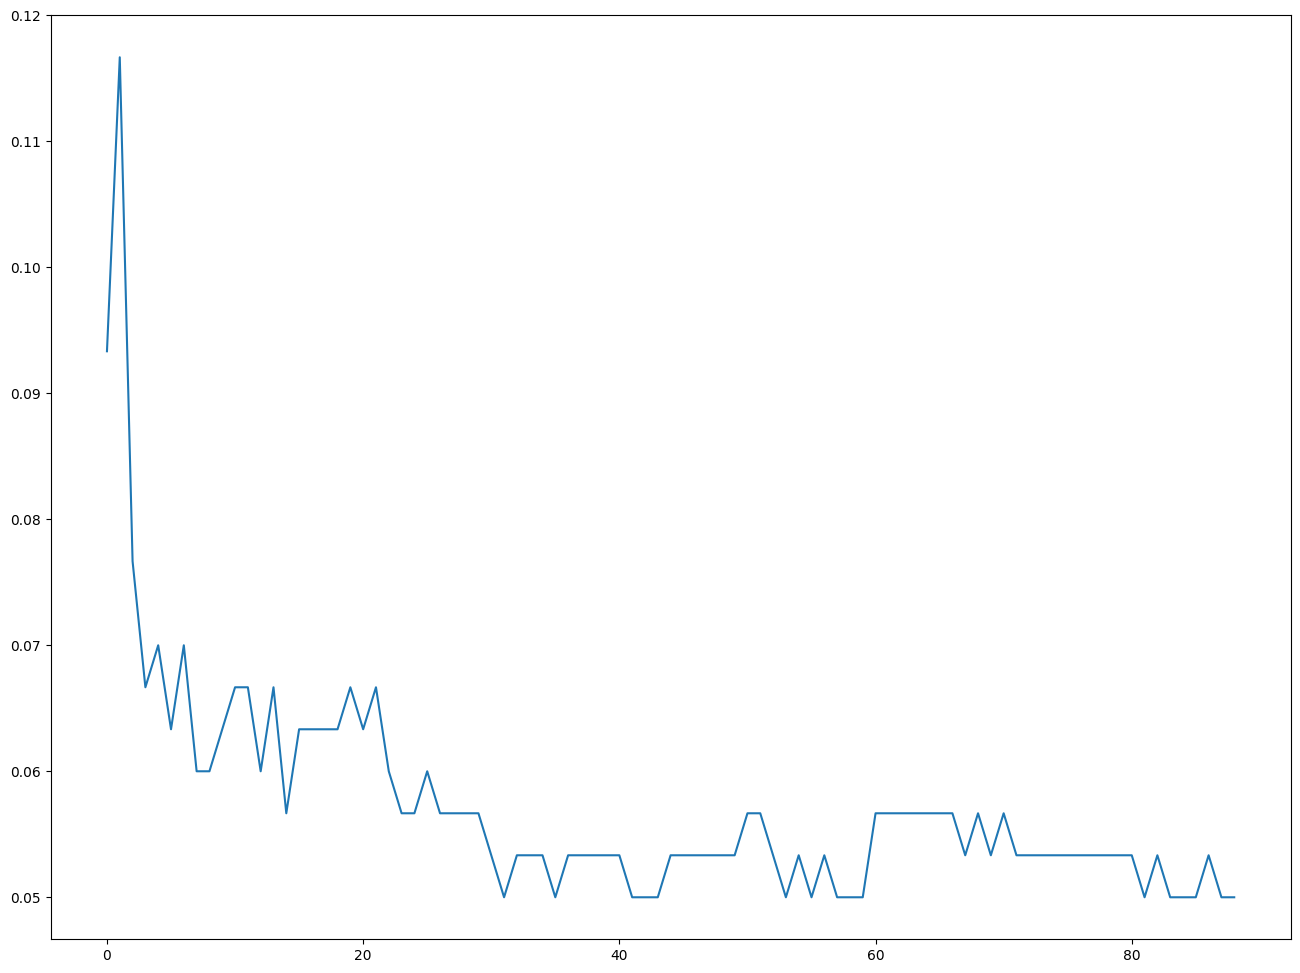

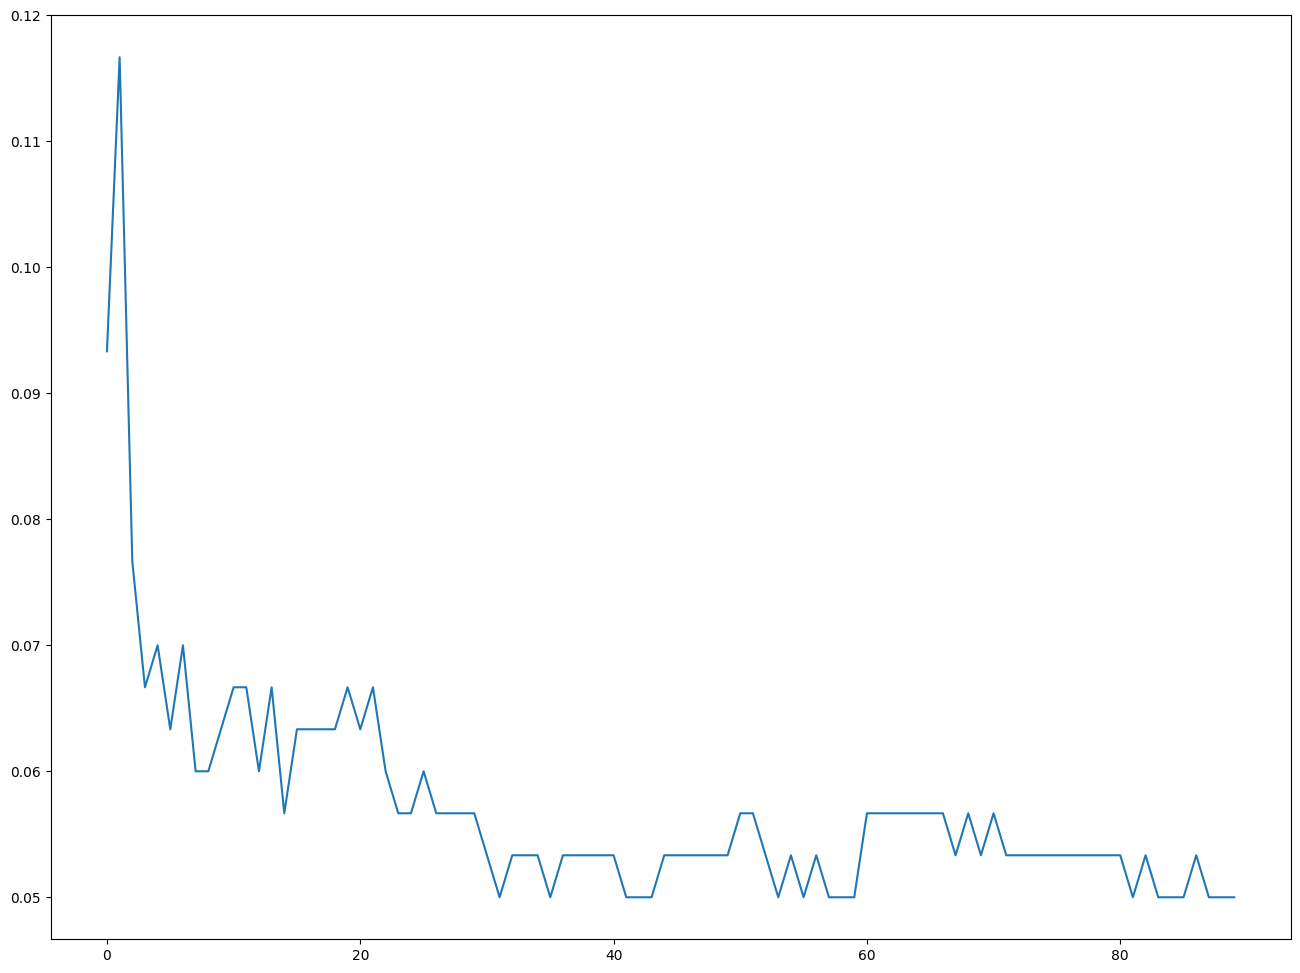

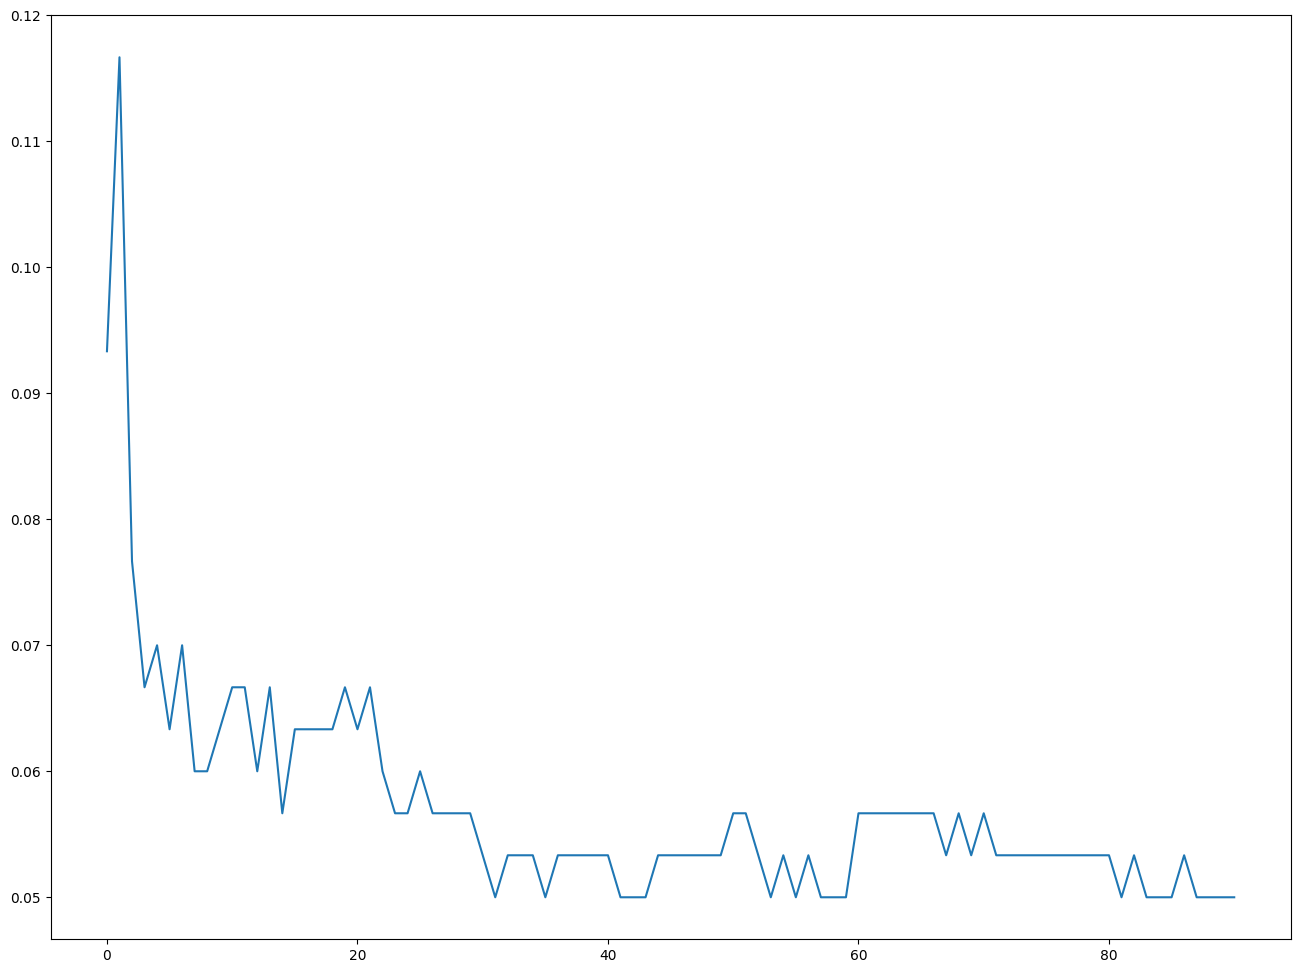

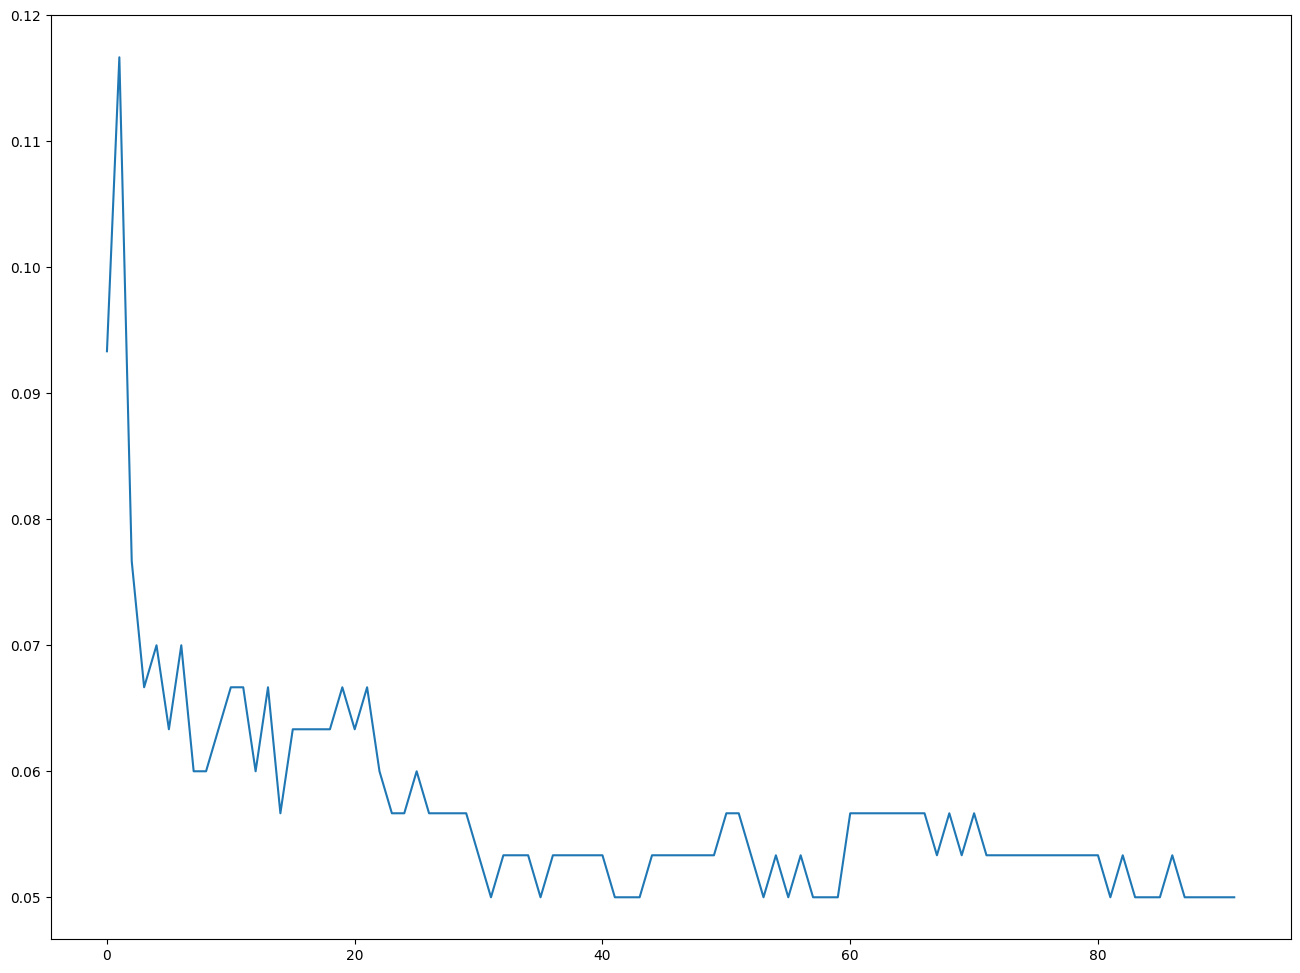

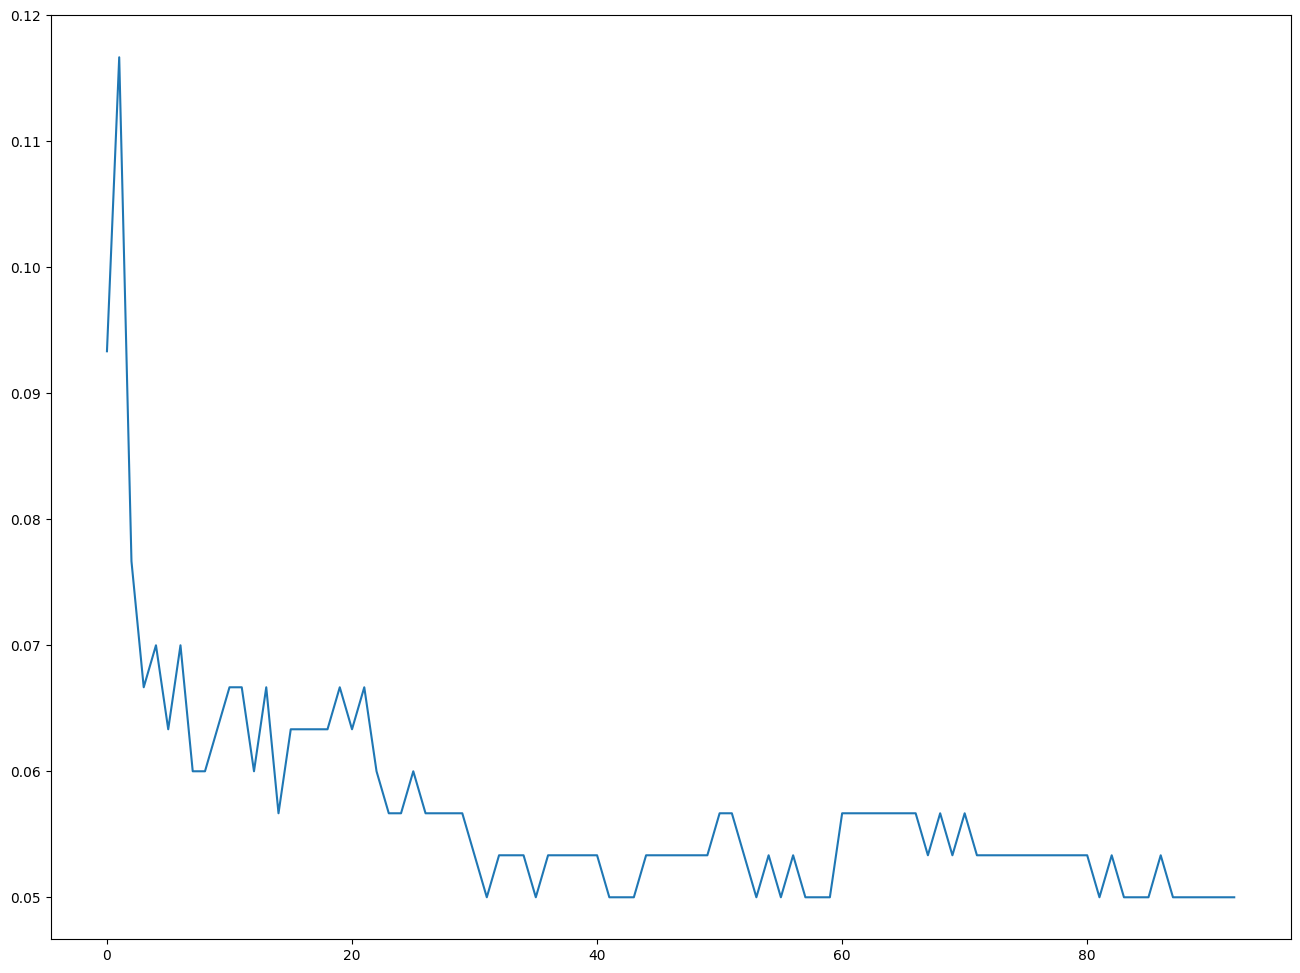

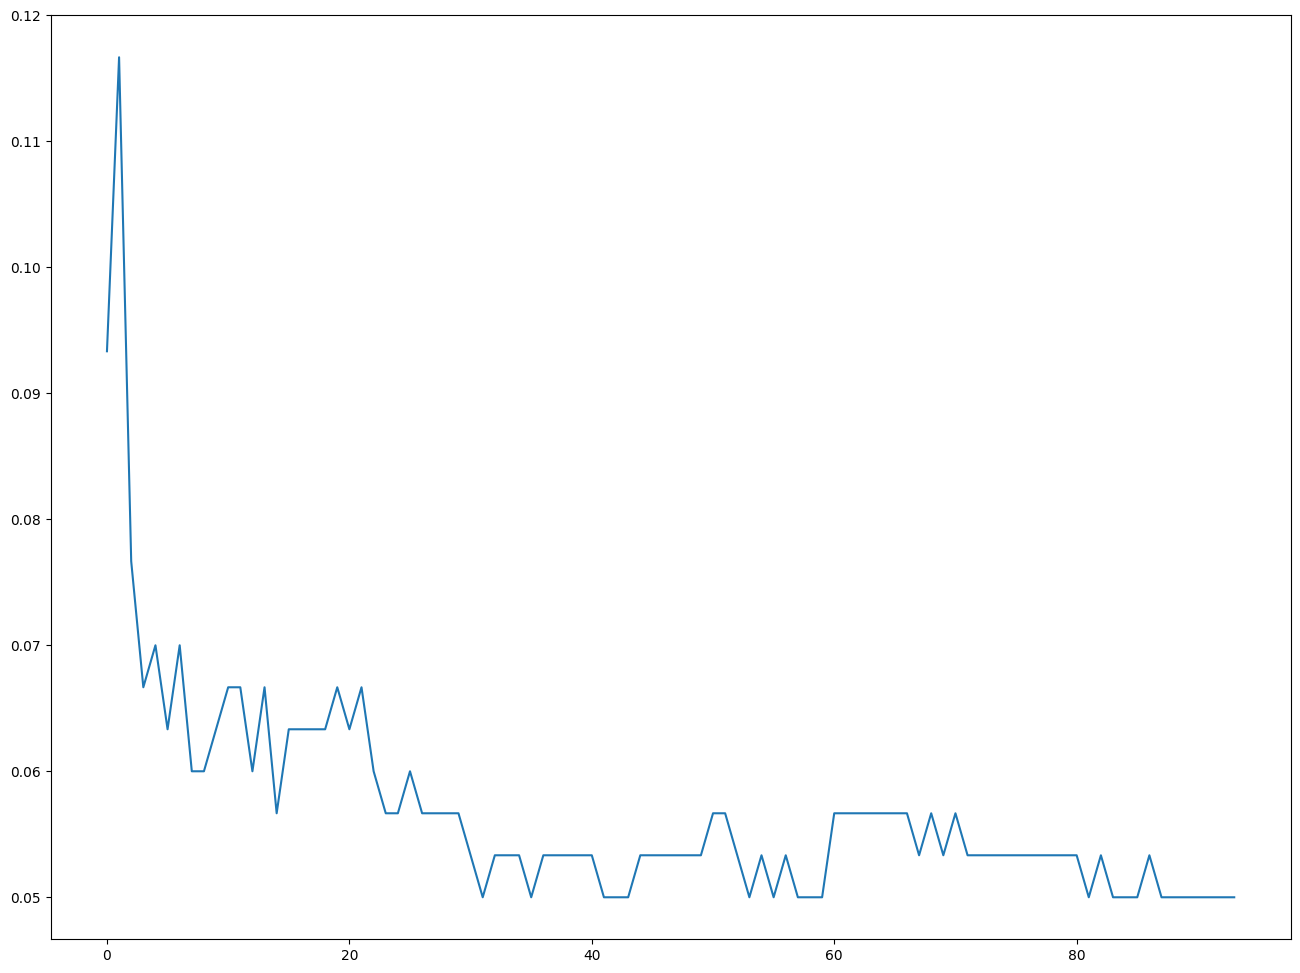

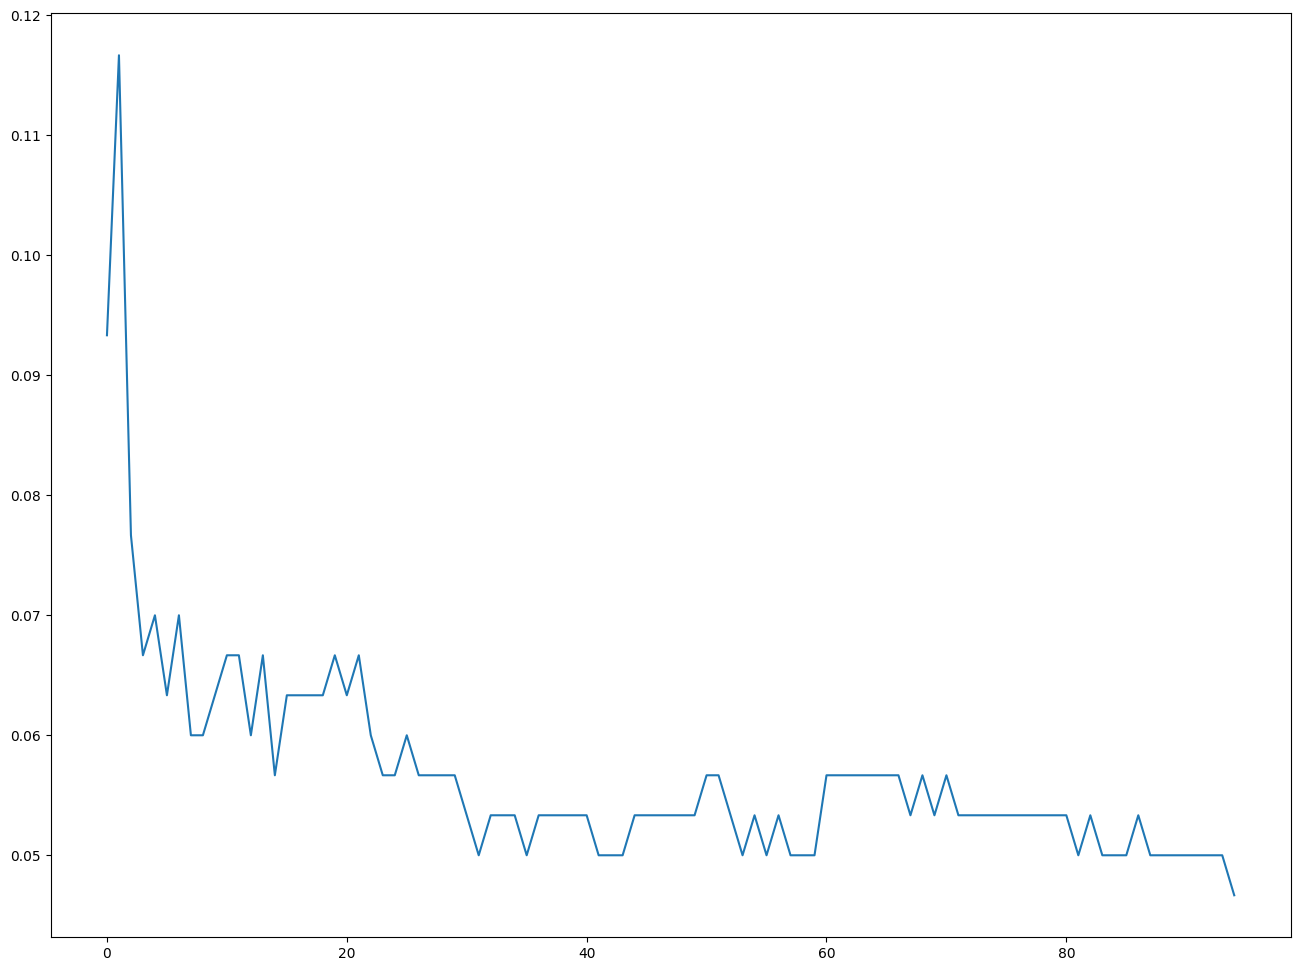

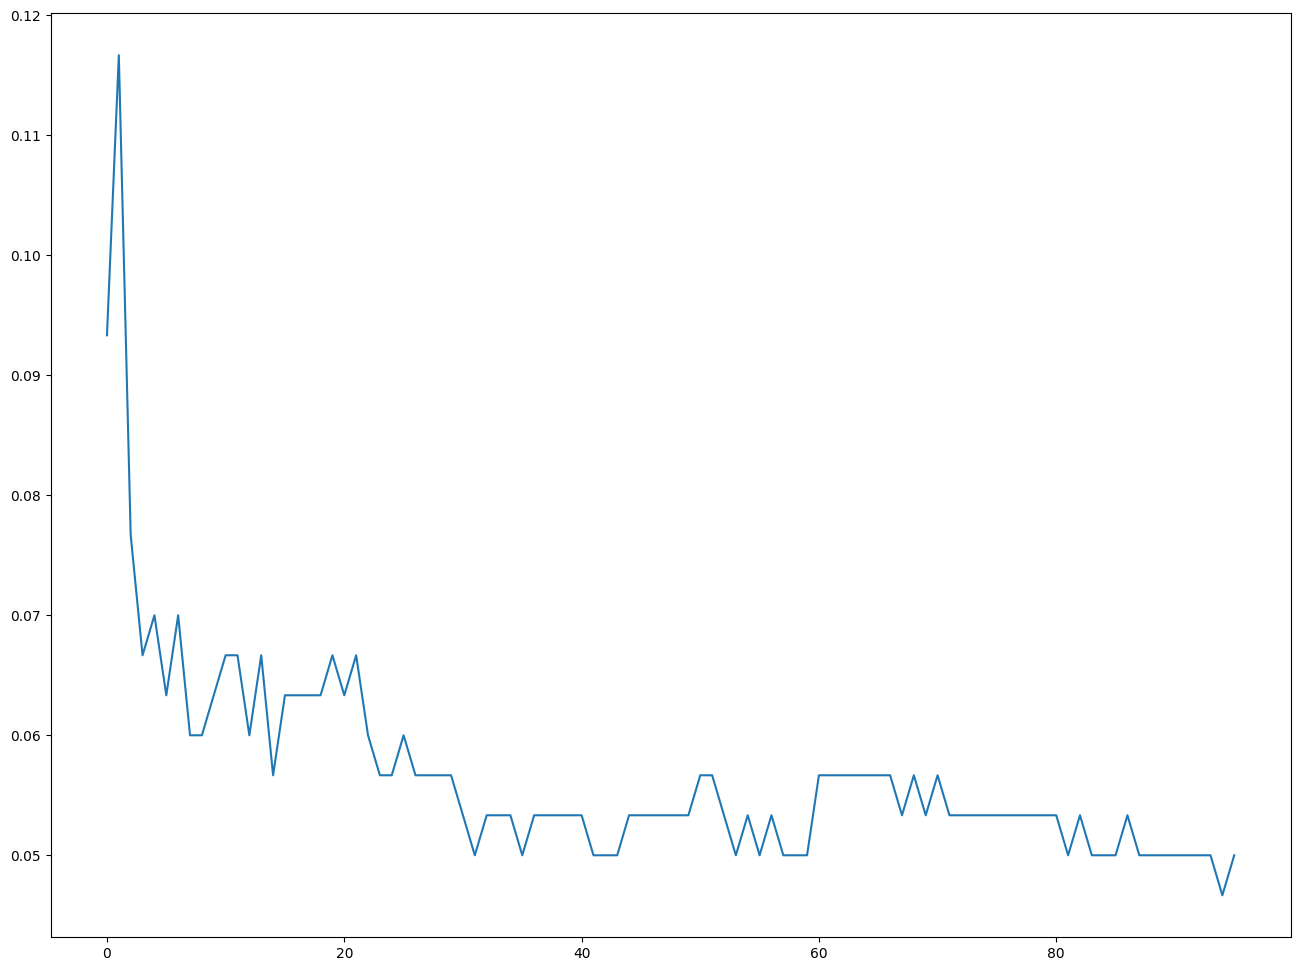

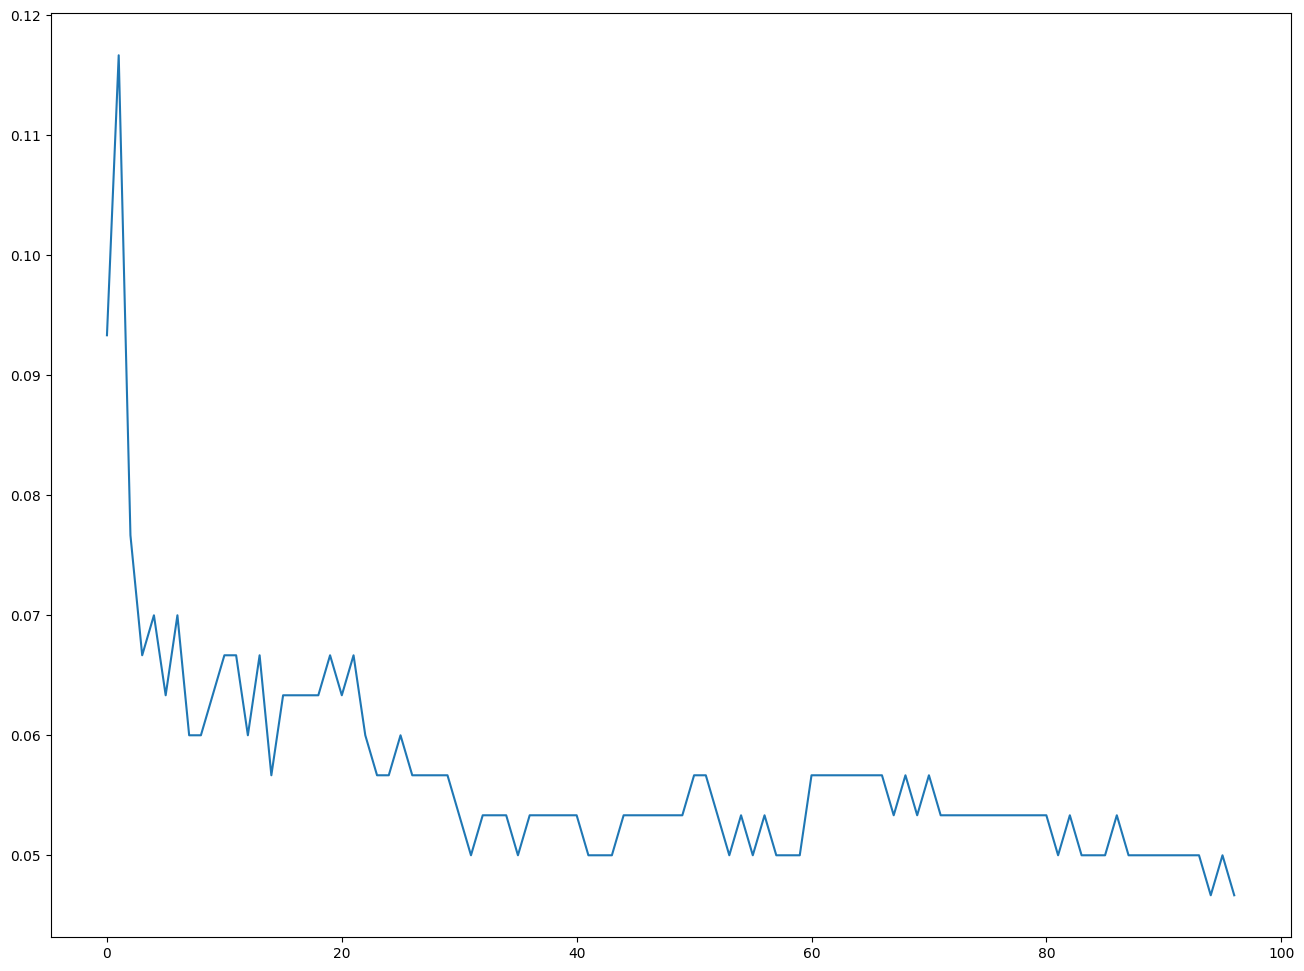

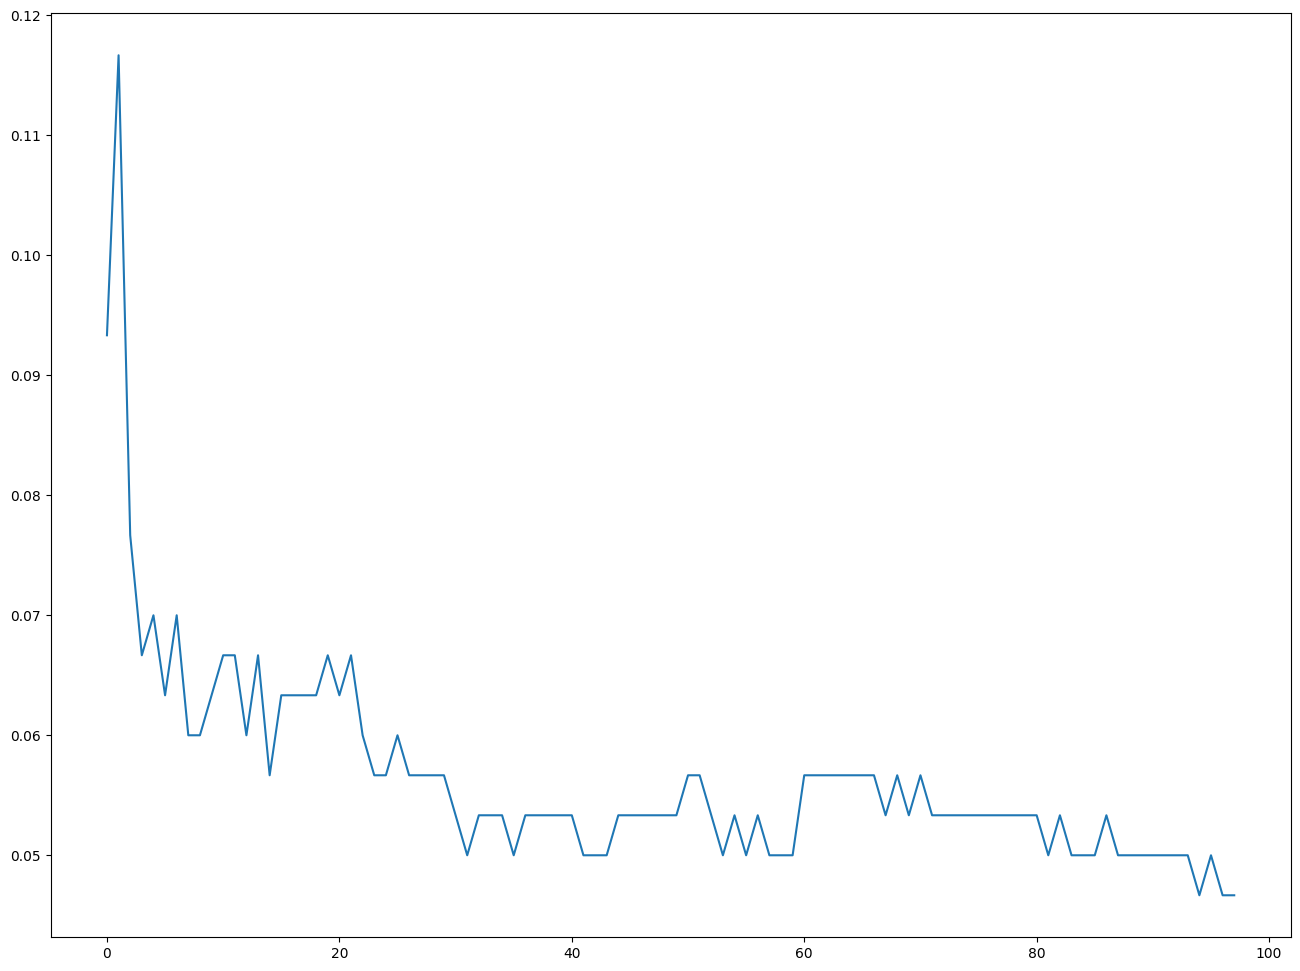

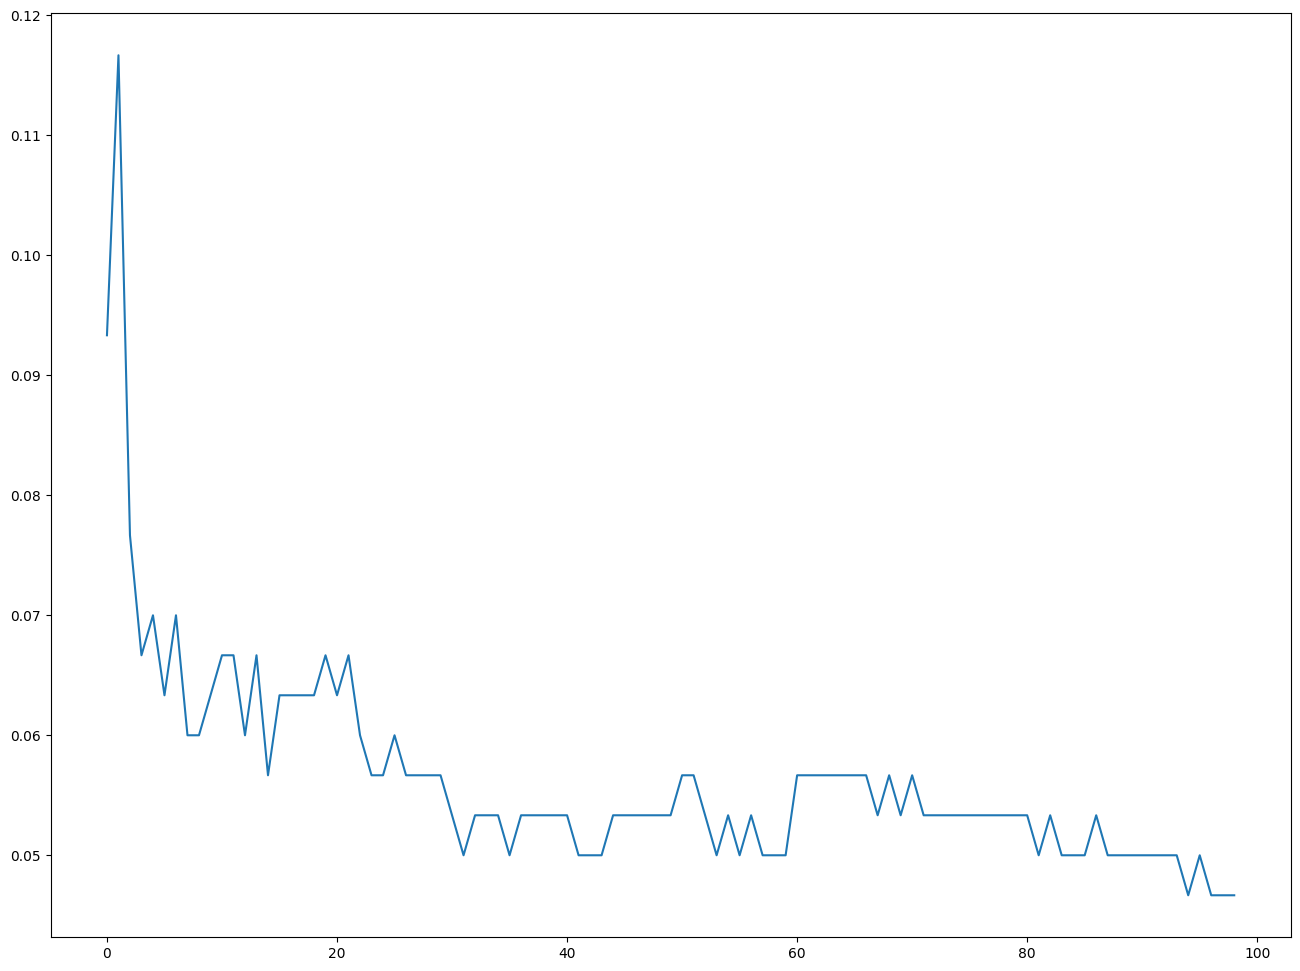

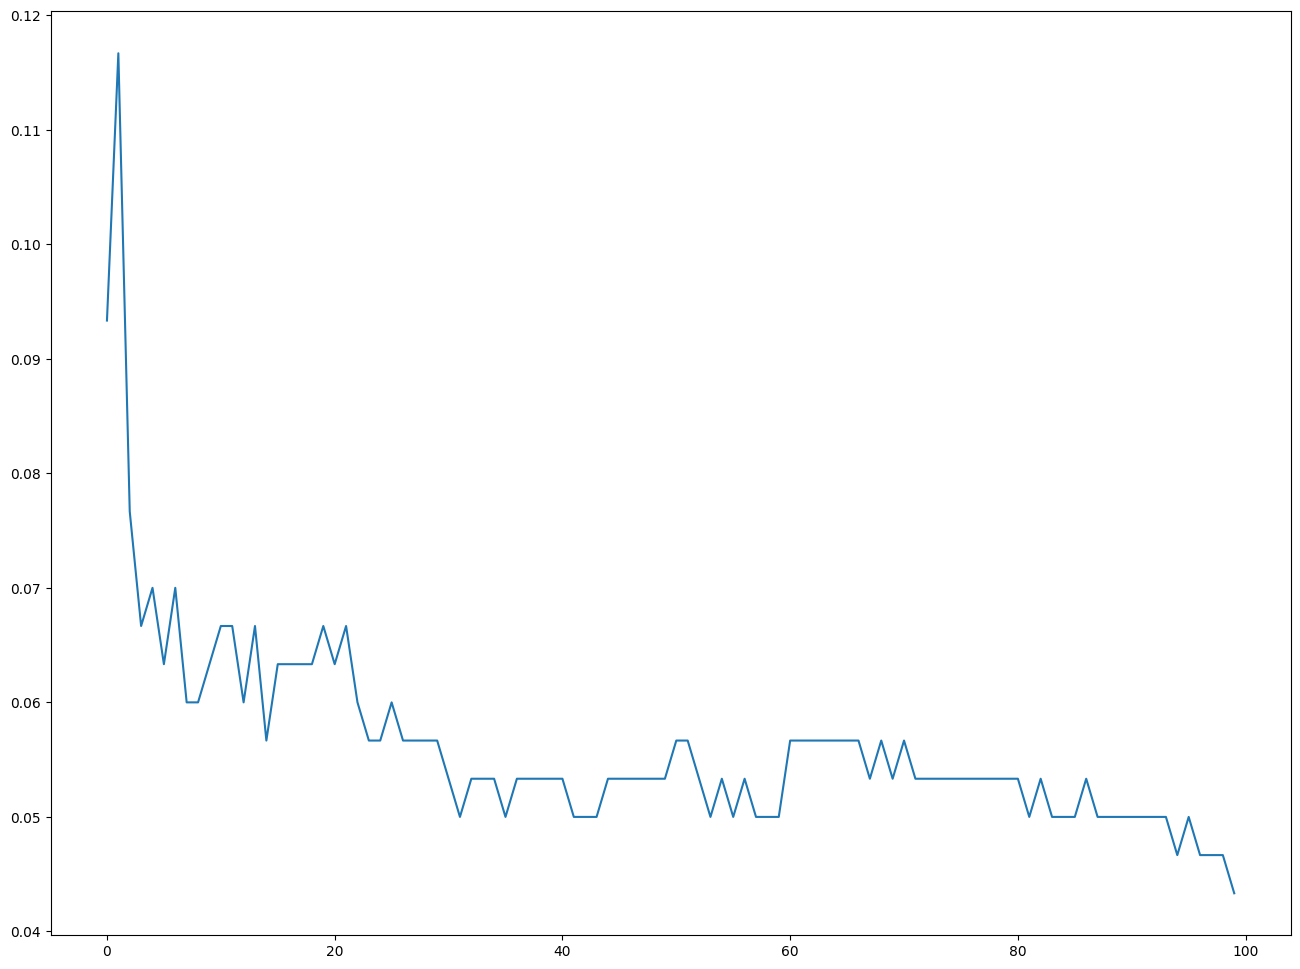

In [34]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline



raw_data = pd.read_csv('classified_data.csv', index_col = 0)



from sklearn.preprocessing import StandardScaler



scaler = StandardScaler()

scaler.fit(raw_data.drop('TARGET CLASS', axis=1))

scaled_features = scaler.transform(raw_data.drop('TARGET CLASS', axis=1))

scaled_data = pd.DataFrame(scaled_features, columns = raw_data.drop('TARGET CLASS', axis=1).columns)



from sklearn.model_selection import train_test_split

x = scaled_data

y = raw_data['TARGET CLASS']

x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x, y, test_size = 0.3)



from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors = 1)

model.fit(x_training_data, y_training_data)

predictions = model.predict(x_test_data)



from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

print(classification_report(y_test_data, predictions))

print(confusion_matrix(y_test_data, predictions))



error_rates = []

for i in np.arange(1, 101):

    new_model = KNeighborsClassifier(n_neighbors = i)

    new_model.fit(x_training_data, y_training_data)

    new_predictions = new_model.predict(x_test_data)

    error_rates.append(np.mean(new_predictions != y_test_data))

    plt.figure(figsize=(16,12))

    plt.plot(error_rates)